In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import AutoMinorLocator
from scipy.stats import t as t_dist

from functions import *
from config import (MATPLOTLIB_PARAMS)

plt.rcParams.update(MATPLOTLIB_PARAMS)

# BENCHMARKS - Isolated 

In [33]:
df_kems = kem_data_process("data/kem_bench_oqs_50_iter_20250213.csv")

df_kems

Algorithm  Iteration  KeyGen(ms)  Encaps(ms)  Decaps(ms)  \
0     frodo640aes          1       1.846       0.365       0.325   
1     frodo640aes          2       0.248       0.344       0.309   
2     frodo640aes          3       0.241       0.350       0.304   
3     frodo640aes          4       0.233       0.314       0.313   
4     frodo640aes          5       0.240       0.337       0.326   
...           ...        ...         ...         ...         ...   
2595       hqc256         46       6.179      12.323      18.694   
2596       hqc256         47       6.169      12.355      17.551   
2597       hqc256         48       5.799      11.493      17.389   
2598       hqc256         49       6.060      12.236      18.390   
2599       hqc256         50       6.154      12.131      17.528   

      TotalTime(ms)  
0             2.536  
1             0.901  
2             0.895  
3             0.860  
4             0.903  
...             ...  
2595         37.196  
2596         36.075  
2597         34.681  
2598         36.686  
2599         35.813  

[900 rows x 6 columns]

In [34]:
df_qkdkems = kem_data_process("data/kem_bench_qkdkemprovider_50_iter_20250213.csv")

df_qkdkems

Algorithm  Iteration  KeyGen(ms)  Encaps(ms)  Decaps(ms)  \
0    qkd_frodo640aes          1      75.816      98.235       0.525   
1    qkd_frodo640aes          2     101.675      98.112       0.333   
2    qkd_frodo640aes          3     101.075      98.260       0.330   
3    qkd_frodo640aes          4     101.236      98.485       0.343   
4    qkd_frodo640aes          5     100.892      98.370       0.318   
..               ...        ...         ...         ...         ...   
895       qkd_hqc256         46     118.374     112.011      17.788   
896       qkd_hqc256         47      69.864     111.892      17.227   
897       qkd_hqc256         48     120.861     111.492      16.510   
898       qkd_hqc256         49      71.912     111.241      17.417   
899       qkd_hqc256         50     121.475     110.269      16.437   

     TotalTime(ms)  
0          174.576  
1          200.120  
2          199.665  
3          200.064  
4          199.580  
..             ...  
895        248.173  
896        198.983  
897        248.863  
898        200.570  
899        248.181  

[900 rows x 6 columns]

In [35]:
# Count unique algorithms with
std_algorithms = df_kems['Algorithm'].unique()

print(f"Number of distinct algorithms: {len(std_algorithms)}")
print("\nPQC Algorithms found:")
for algo in sorted(std_algorithms):
    print(f"- {algo}")

Number of distinct algorithms: 18

PQC Algorithms found:
- bikel1
- bikel3
- bikel5
- frodo1344aes
- frodo1344shake
- frodo640aes
- frodo640shake
- frodo976aes
- frodo976shake
- hqc128
- hqc192
- hqc256
- kyber1024
- kyber512
- kyber768
- mlkem1024
- mlkem512
- mlkem768


In [36]:
# Count unique algorithms with qkd_ prefix
qkd_algorithms = df_qkdkems[df_qkdkems['Algorithm'].str.startswith('qkd_')]['Algorithm'].unique()

print(f"Number of distinct QKD algorithms: {len(qkd_algorithms)}")
print("\nQKD-PQC algorithms found:")
for algo in sorted(qkd_algorithms):
    print(f"- {algo}")

Number of distinct QKD algorithms: 18

QKD-PQC algorithms found:
- qkd_bikel1
- qkd_bikel3
- qkd_bikel5
- qkd_frodo1344aes
- qkd_frodo1344shake
- qkd_frodo640aes
- qkd_frodo640shake
- qkd_frodo976aes
- qkd_frodo976shake
- qkd_hqc128
- qkd_hqc192
- qkd_hqc256
- qkd_kyber1024
- qkd_kyber512
- qkd_kyber768
- qkd_mlkem1024
- qkd_mlkem512
- qkd_mlkem768


In [37]:
df_kems_stats = kem_data_summary(df_kems, warmup=2)

df_kems_stats

NumIterations  KeyGen(ms)_mean  KeyGen(ms)_std  \
Algorithm                                                        
bikel1                     48            0.138           0.004   
bikel3                     48            0.390           0.006   
bikel5                     48            0.972           0.020   
frodo1344aes               48            0.729           0.015   
frodo1344shake             48            2.551           0.051   
frodo640aes                48            0.240           0.004   
frodo640shake              48            0.679           0.015   
frodo976aes                48            0.425           0.015   
frodo976shake              48            1.466           0.041   
hqc128                     48            1.106           0.002   
hqc192                     48            3.364           0.115   
hqc256                     48            5.967           0.216   
kyber1024                  48            0.015           0.001   
kyber512                   48            0.007           0.000   
kyber768                   48            0.012           0.001   
mlkem1024                  48            0.014           0.000   
mlkem512                   48            0.007           0.000   
mlkem768                   48            0.011           0.001   

                KeyGen(ms)_min  KeyGen(ms)_max  Encaps(ms)_mean  \
Algorithm                                                         
bikel1                   0.128           0.150            0.031   
bikel3                   0.384           0.411            0.073   
bikel5                   0.903           1.008            0.152   
frodo1344aes             0.709           0.775            0.998   
frodo1344shake           2.412           2.661            2.692   
frodo640aes              0.233           0.259            0.337   
frodo640shake            0.651           0.721            0.741   
frodo976aes              0.399           0.459            0.602   
frodo976shake            1.423           1.546            1.562   
hqc128                   1.104           1.114            2.219   
hqc192                   3.145           3.686            6.723   
hqc256                   5.369           6.233           11.963   
kyber1024                0.015           0.019            0.018   
kyber512                 0.007           0.010            0.008   
kyber768                 0.011           0.015            0.013   
mlkem1024                0.013           0.015            0.013   
mlkem512                 0.007           0.010            0.006   
mlkem768                 0.011           0.013            0.010   

                Encaps(ms)_std  Encaps(ms)_min  Encaps(ms)_max  \
Algorithm                                                        
bikel1                   0.001           0.029           0.033   
bikel3                   0.001           0.072           0.076   
bikel5                   0.005           0.141           0.158   
frodo1344aes             0.010           0.989           1.043   
frodo1344shake           0.044           2.551           2.752   
frodo640aes              0.005           0.314           0.350   
frodo640shake            0.013           0.708           0.777   
frodo976aes              0.021           0.577           0.635   
frodo976shake            0.048           1.511           1.650   
hqc128                   0.005           2.216           2.252   
hqc192                   0.232           6.287           7.510   
hqc256                   0.397          11.312          12.452   
kyber1024                0.000           0.018           0.019   
kyber512                 0.000           0.008           0.009   
kyber768                 0.000           0.013           0.014   
mlkem1024                0.000           0.013           0.014   
mlkem512                 0.000           0.006           0.007   
mlkem768                 0.001           0.010           0.013   

                Decaps(ms)_mean  

In [38]:
df_qkdkems_stats = kem_data_summary(df_qkdkems, warmup=2)

df_qkdkems_stats

NumIterations  KeyGen(ms)_mean  KeyGen(ms)_std  \
Algorithm                                                            
qkd_bikel1                     48          100.295           0.627   
qkd_bikel3                     48          103.101          28.726   
qkd_bikel5                     48          122.627         153.720   
qkd_frodo1344aes               48           99.873           1.062   
qkd_frodo1344shake             48           97.390           7.317   
qkd_frodo640aes                48          101.417           0.595   
qkd_frodo640shake              48          100.319           0.876   
qkd_frodo976aes                48          100.941           0.524   
qkd_frodo976shake              48           98.624           1.794   
qkd_hqc128                     48           95.179           1.065   
qkd_hqc192                     48          105.155         144.483   
qkd_hqc256                     48           89.884          23.733   
qkd_kyber1024                  48          102.312           7.202   
qkd_kyber512                   48          101.685           0.554   
qkd_kyber768                   48          101.549           0.500   
qkd_mlkem1024                  48          101.054           1.248   
qkd_mlkem512                   48          105.477          28.987   
qkd_mlkem768                   48          101.108           0.433   

                    KeyGen(ms)_min  KeyGen(ms)_max  Encaps(ms)_mean  \
Algorithm                                                             
qkd_bikel1                  99.050         102.891          100.148   
qkd_bikel3                  95.589         297.837           99.316   
qkd_bikel5                  90.446        1147.332           99.359   
qkd_frodo1344aes            97.788         105.421          100.159   
qkd_frodo1344shake          91.308         146.326          102.191   
qkd_frodo640aes            100.355         103.537          102.353   
qkd_frodo640shake           97.587         101.424           98.793   
qkd_frodo976aes             99.769         101.949           98.473   
qkd_frodo976shake           87.750         100.168          104.006   
qkd_hqc128                  90.753          96.758          101.661   
qkd_hqc192                  78.810        1085.257          111.362   
qkd_hqc256                  69.864         122.007          111.517   
qkd_kyber1024               98.630         150.956           98.641   
qkd_kyber512               100.388         102.835           98.240   
qkd_kyber768               100.733         102.694           98.382   
qkd_mlkem1024               94.752         105.858          100.957   
qkd_mlkem512                99.892         302.087           99.660   
qkd_mlkem768                99.910         102.207           98.806   

                    Encaps(ms)_std  Encaps(ms)_min  Encaps(ms)_max  \
Algorithm                                                            
qkd_bikel1                   7.234          97.333         149.097   
qkd_bikel3                   0.683          97.197         100.467   
qkd_bikel5                   0.400          98.325         100.156   
qkd_frodo1344aes             6.413          98.019         143.512   
qkd_frodo1344shake           7.709          99.502         153.713   
qkd_frodo640aes             29.064          96.309         299.487   
qkd_frodo640shake            0.714          97.583         100.218   
qkd_frodo976aes              0.474          97.162          99.652   
qkd_frodo976shake           30.386          98.464         310.101   
qkd_hqc128                   0.934         100.297         106.154   
qkd_hqc192                  36.153         104.792         356.484   
qkd_hqc256                   1.168         108.408         113.845   
qkd_kyber1024                0.667          97.422         101.323   
qkd_kyber512                 0.521          96.993         100.111   
qkd_kyber768                 0.535          97.398          99.645   
qkd_mlke

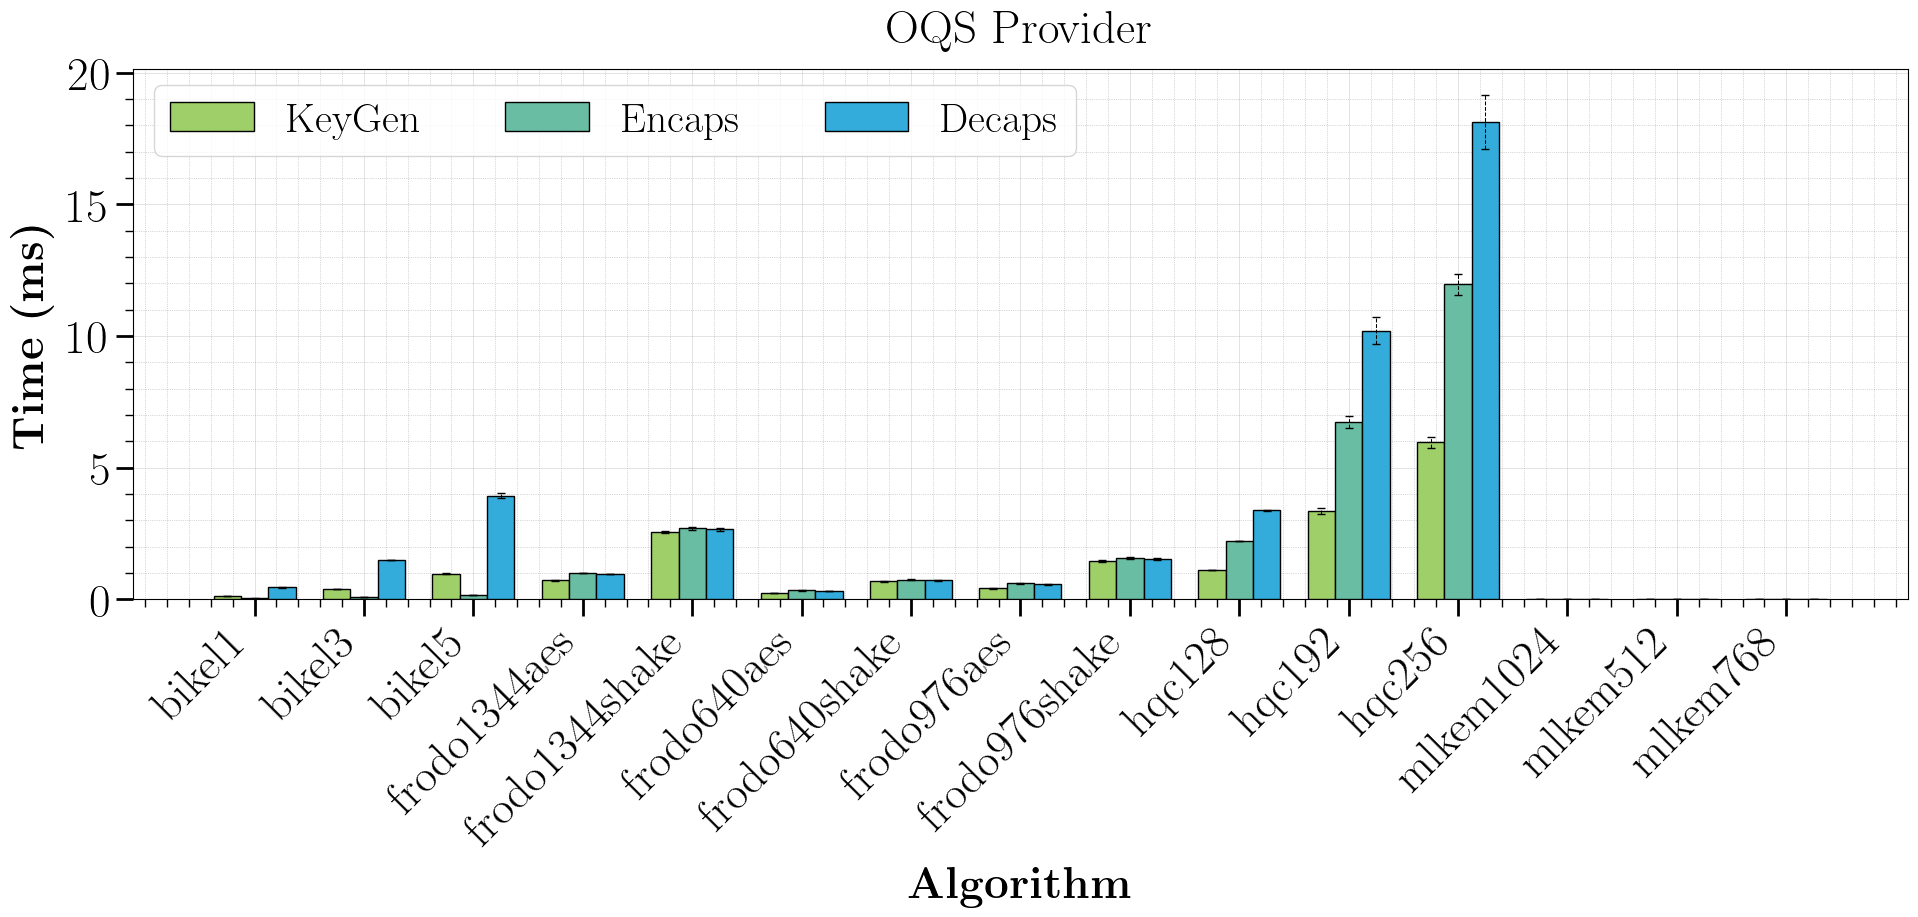

In [39]:
plot_kem_times(input_df=df_kems_stats, error_suffix="_std", plot_title="cerberis_kems_ops_times.pdf", y_start=None)

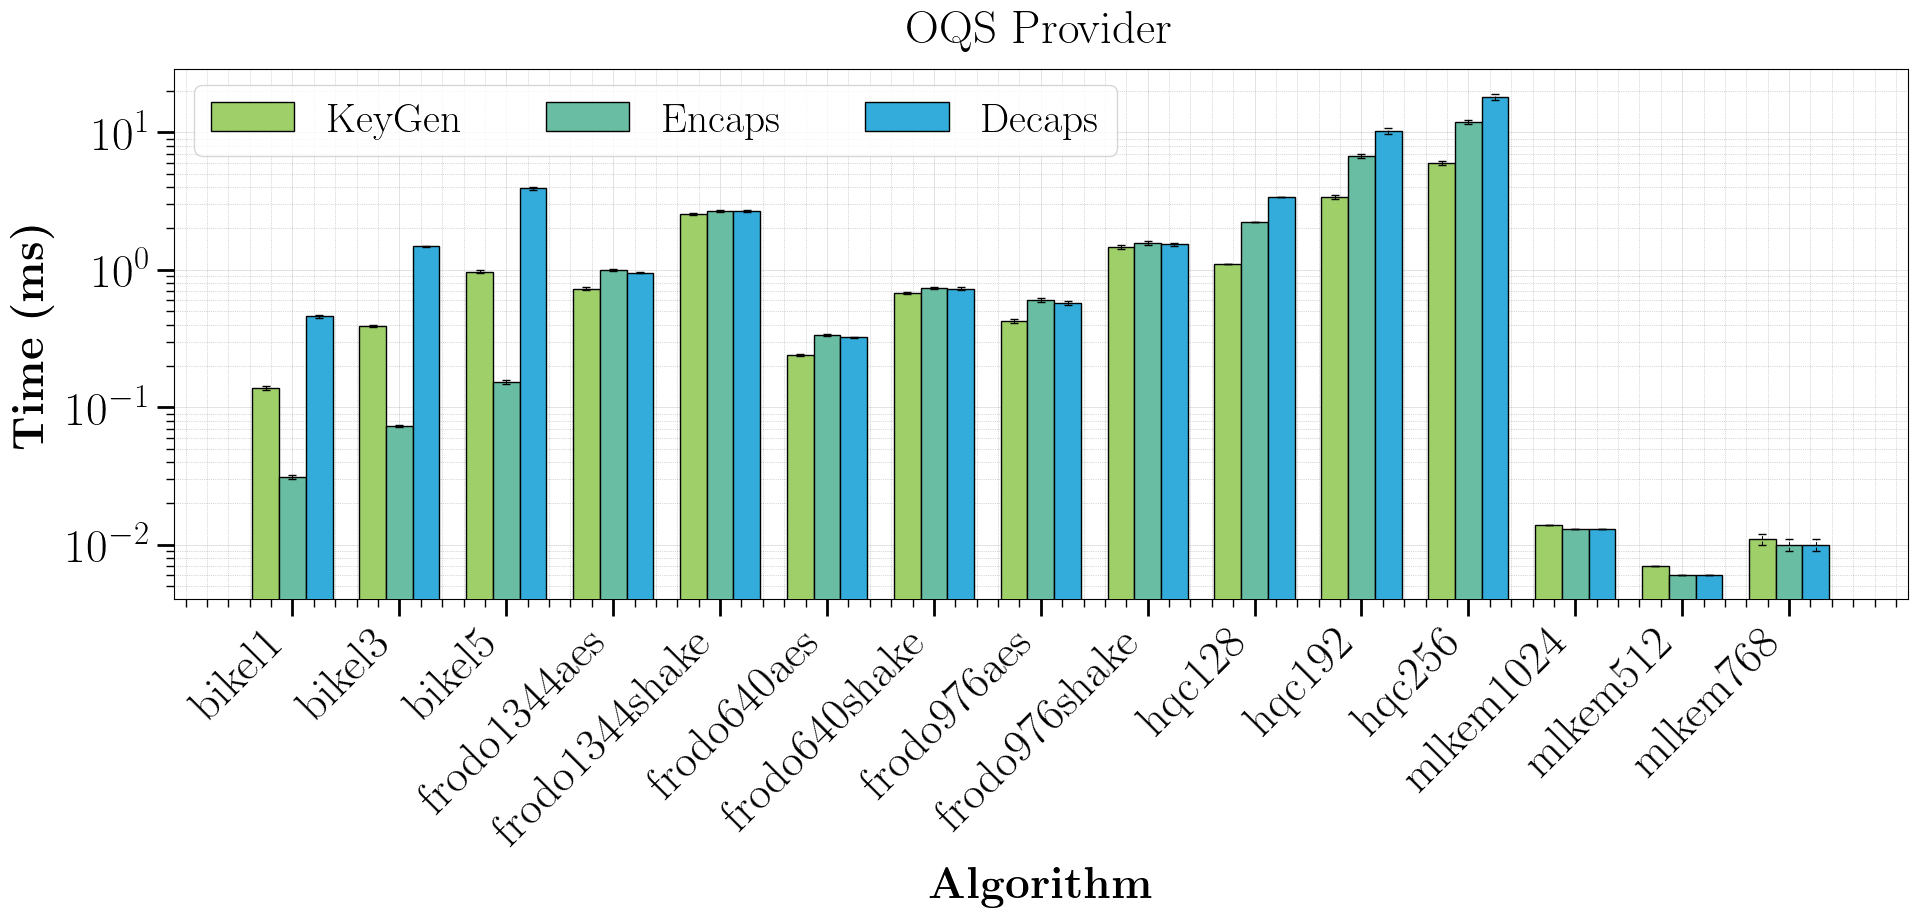

In [40]:
plot_kem_times(input_df=df_kems_stats, error_suffix="_std", plot_title="cerberis_kems_ops_times_log.pdf", log_scale=True, y_start=None)

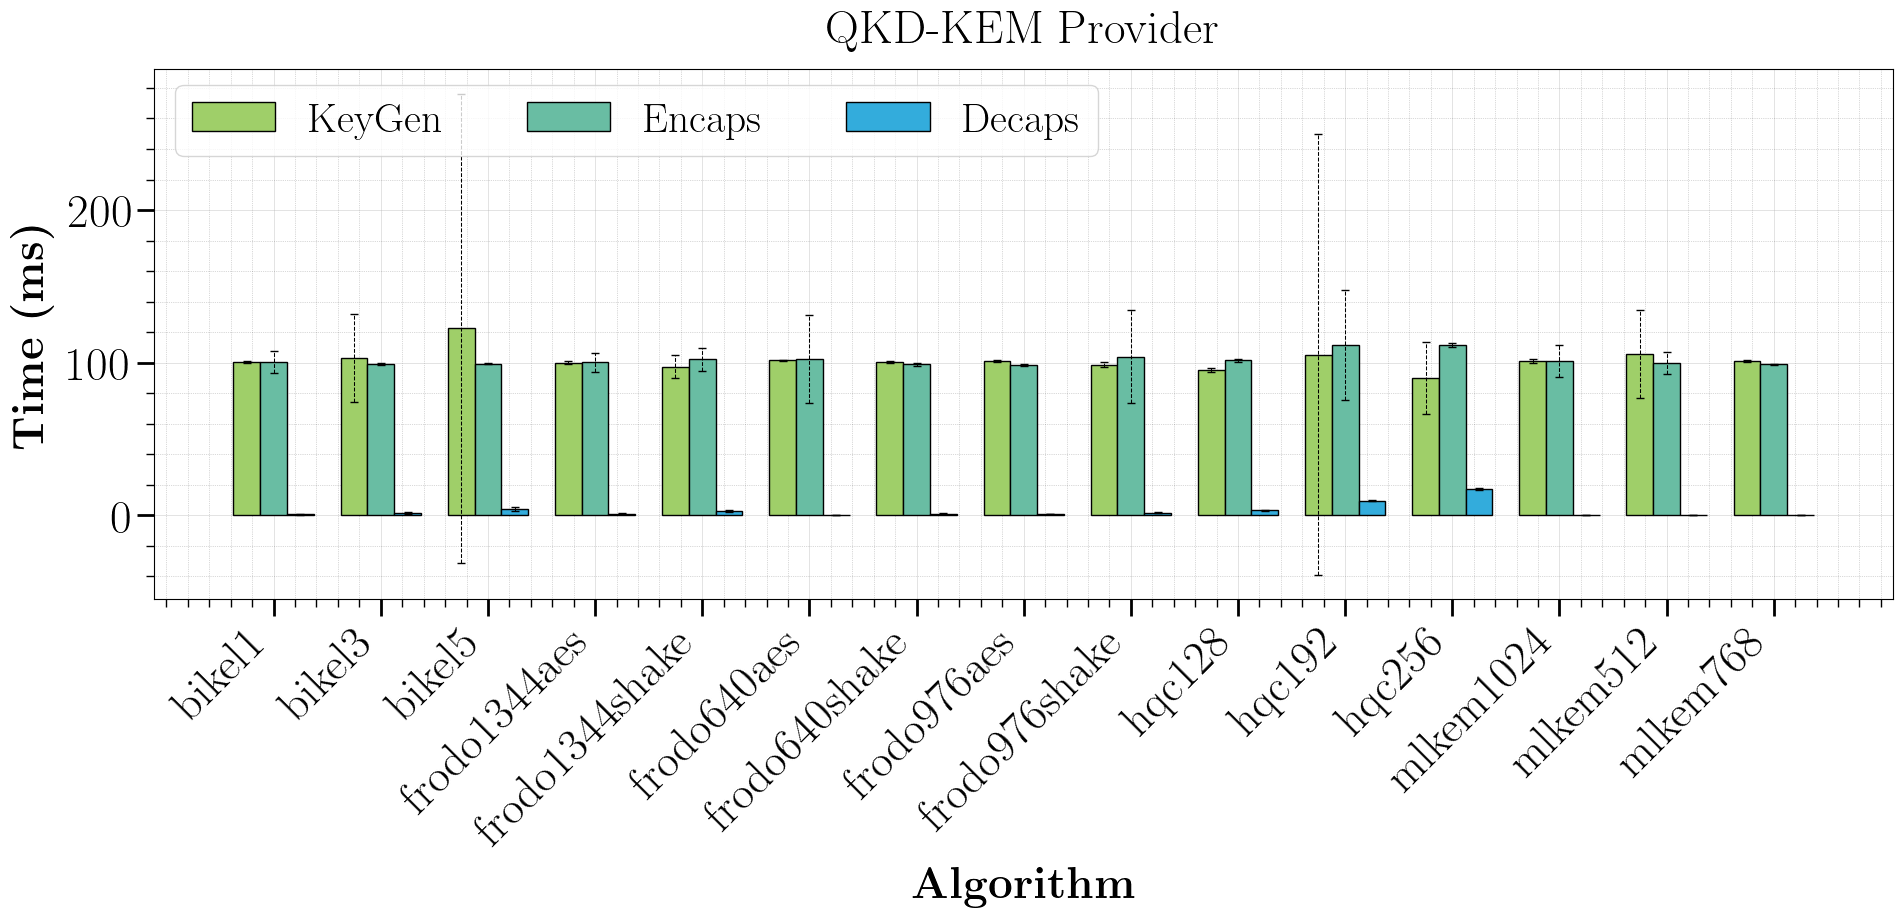

In [41]:
plot_kem_times(input_df=df_qkdkems_stats, error_suffix="_std", plot_title="cerberis_qkdkems_ops_times.pdf", y_start=None)

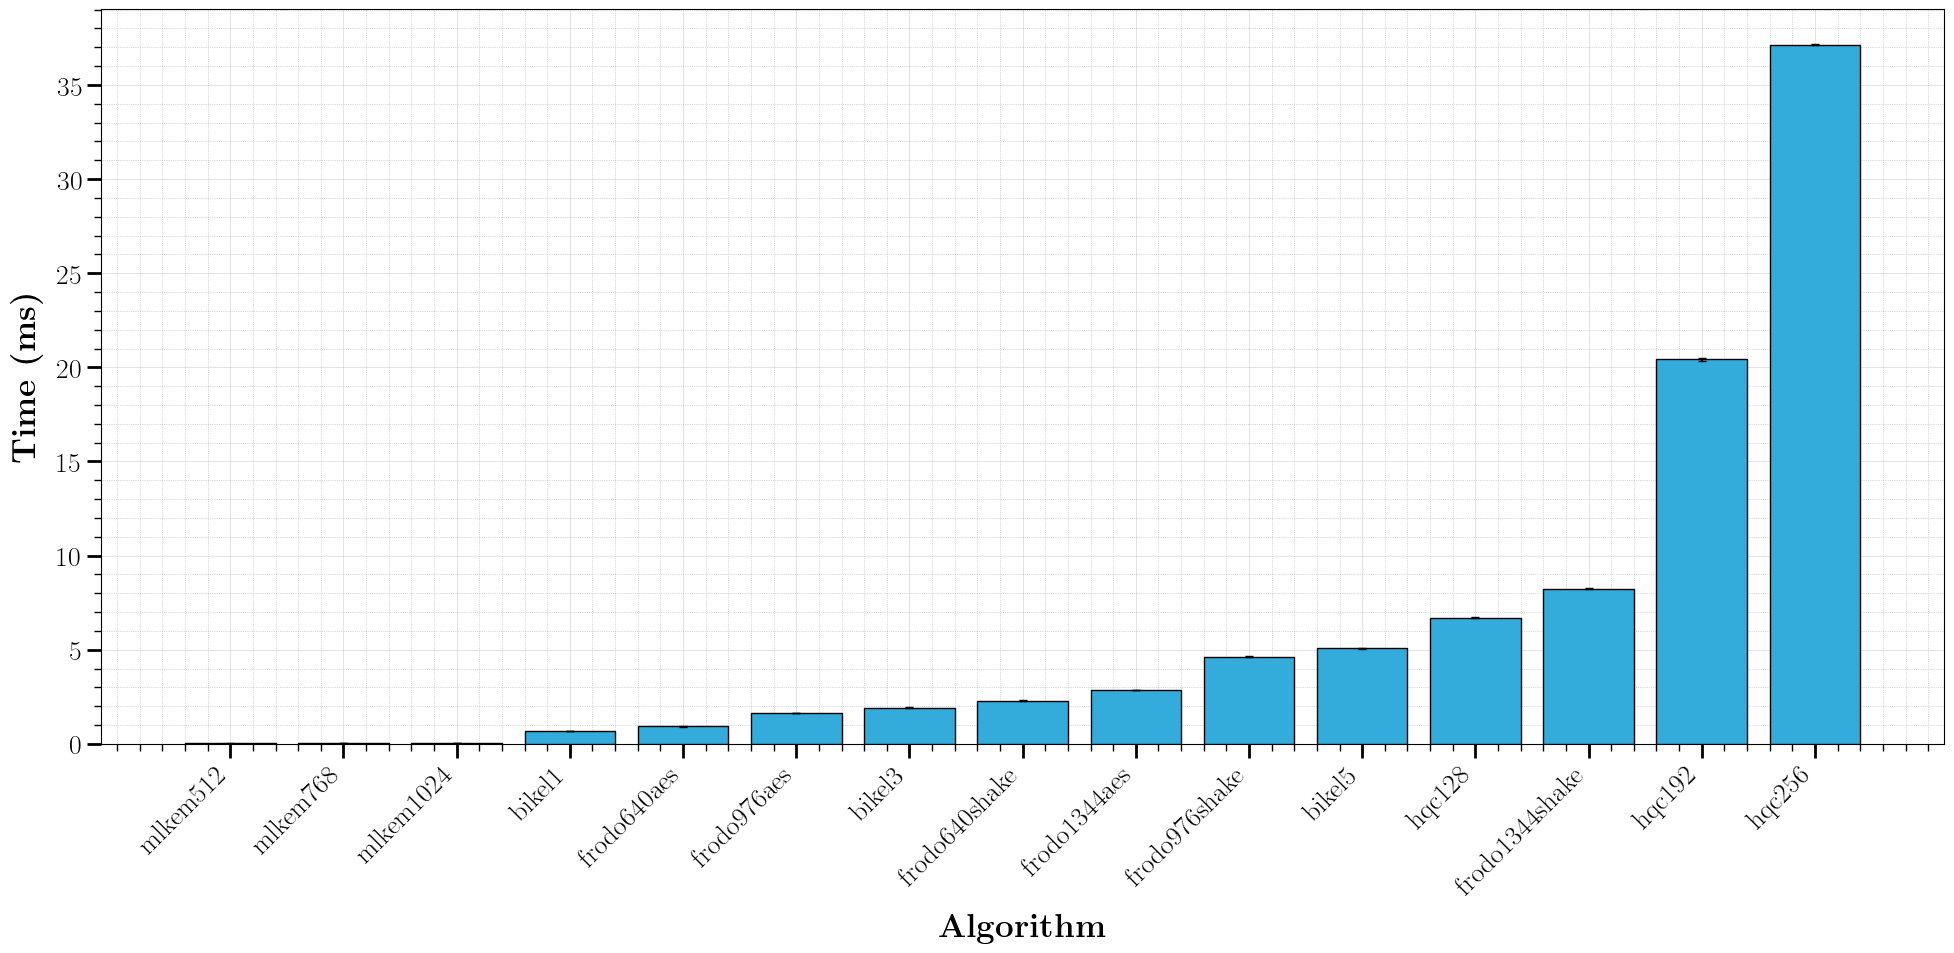

In [10]:
plot_kem_total_times(df_kems_stats, error_suffix="_std", plot_title="kems_total_times.pdf", y_start=None)

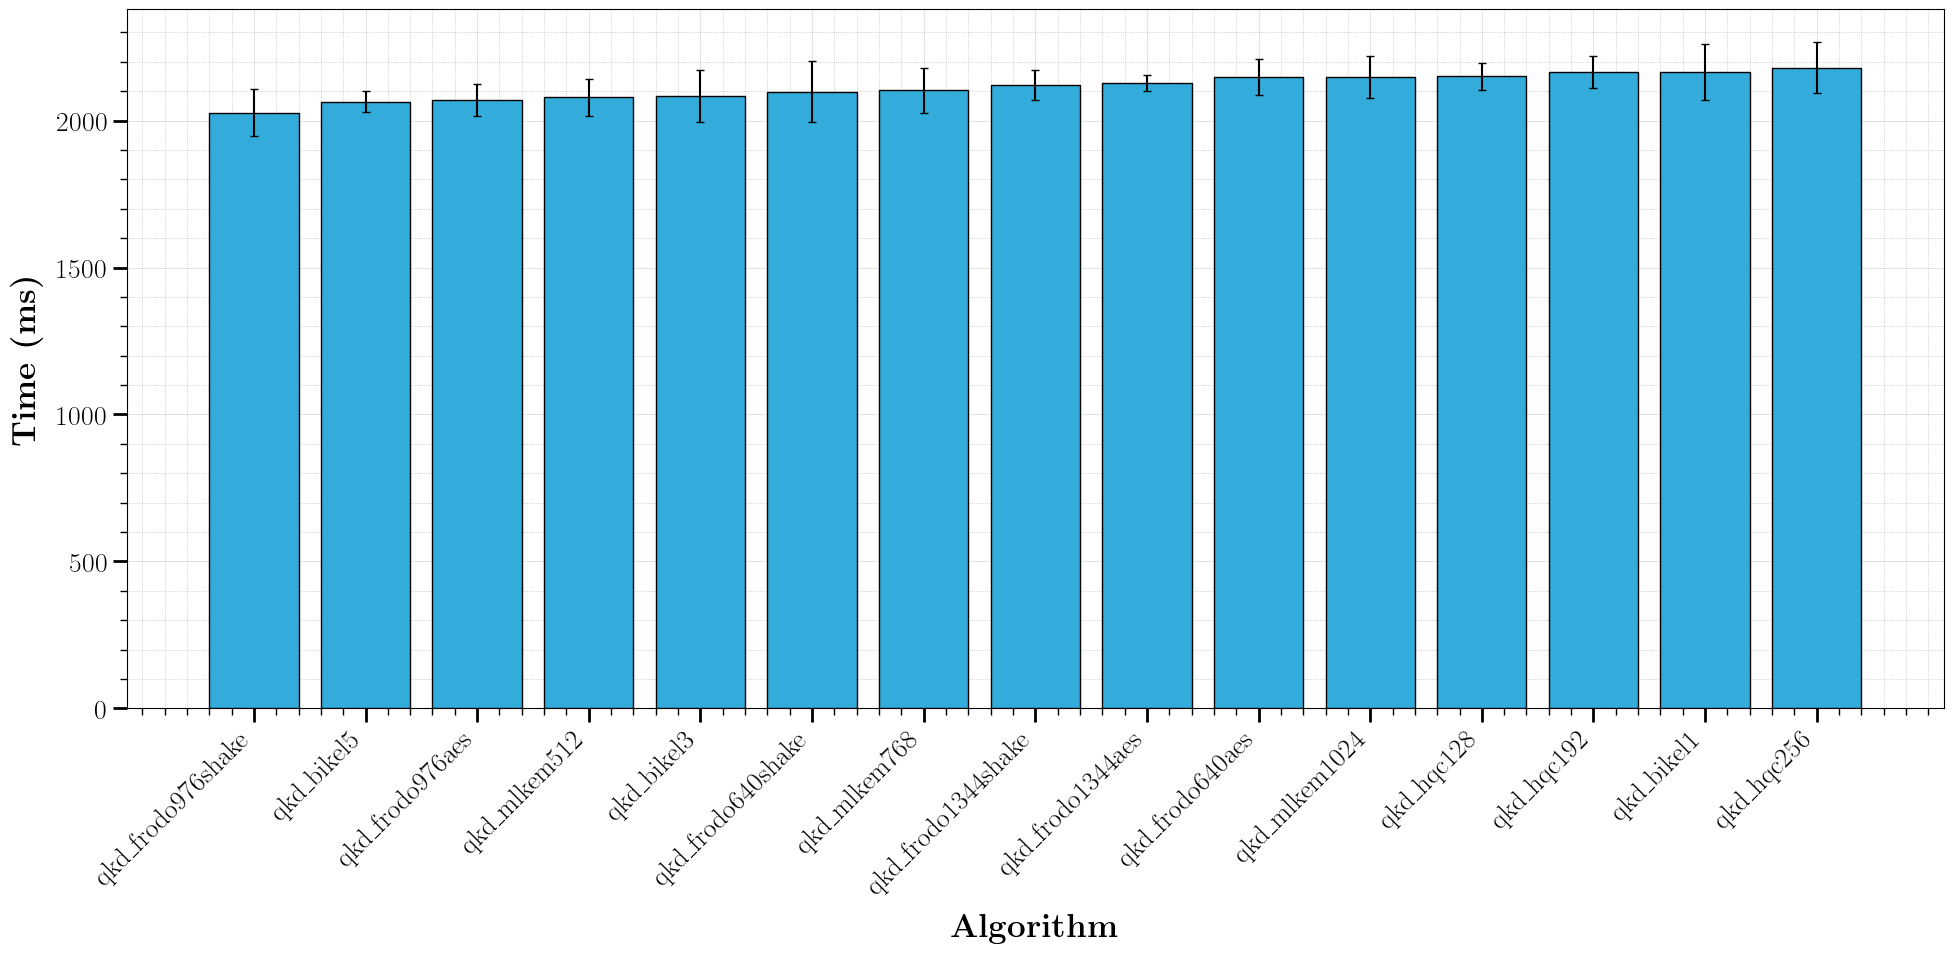

In [11]:
plot_kem_total_times(df_qkdkems_stats, error_suffix="_std", plot_title="qkdkems_total_times.pdf", y_start=None)

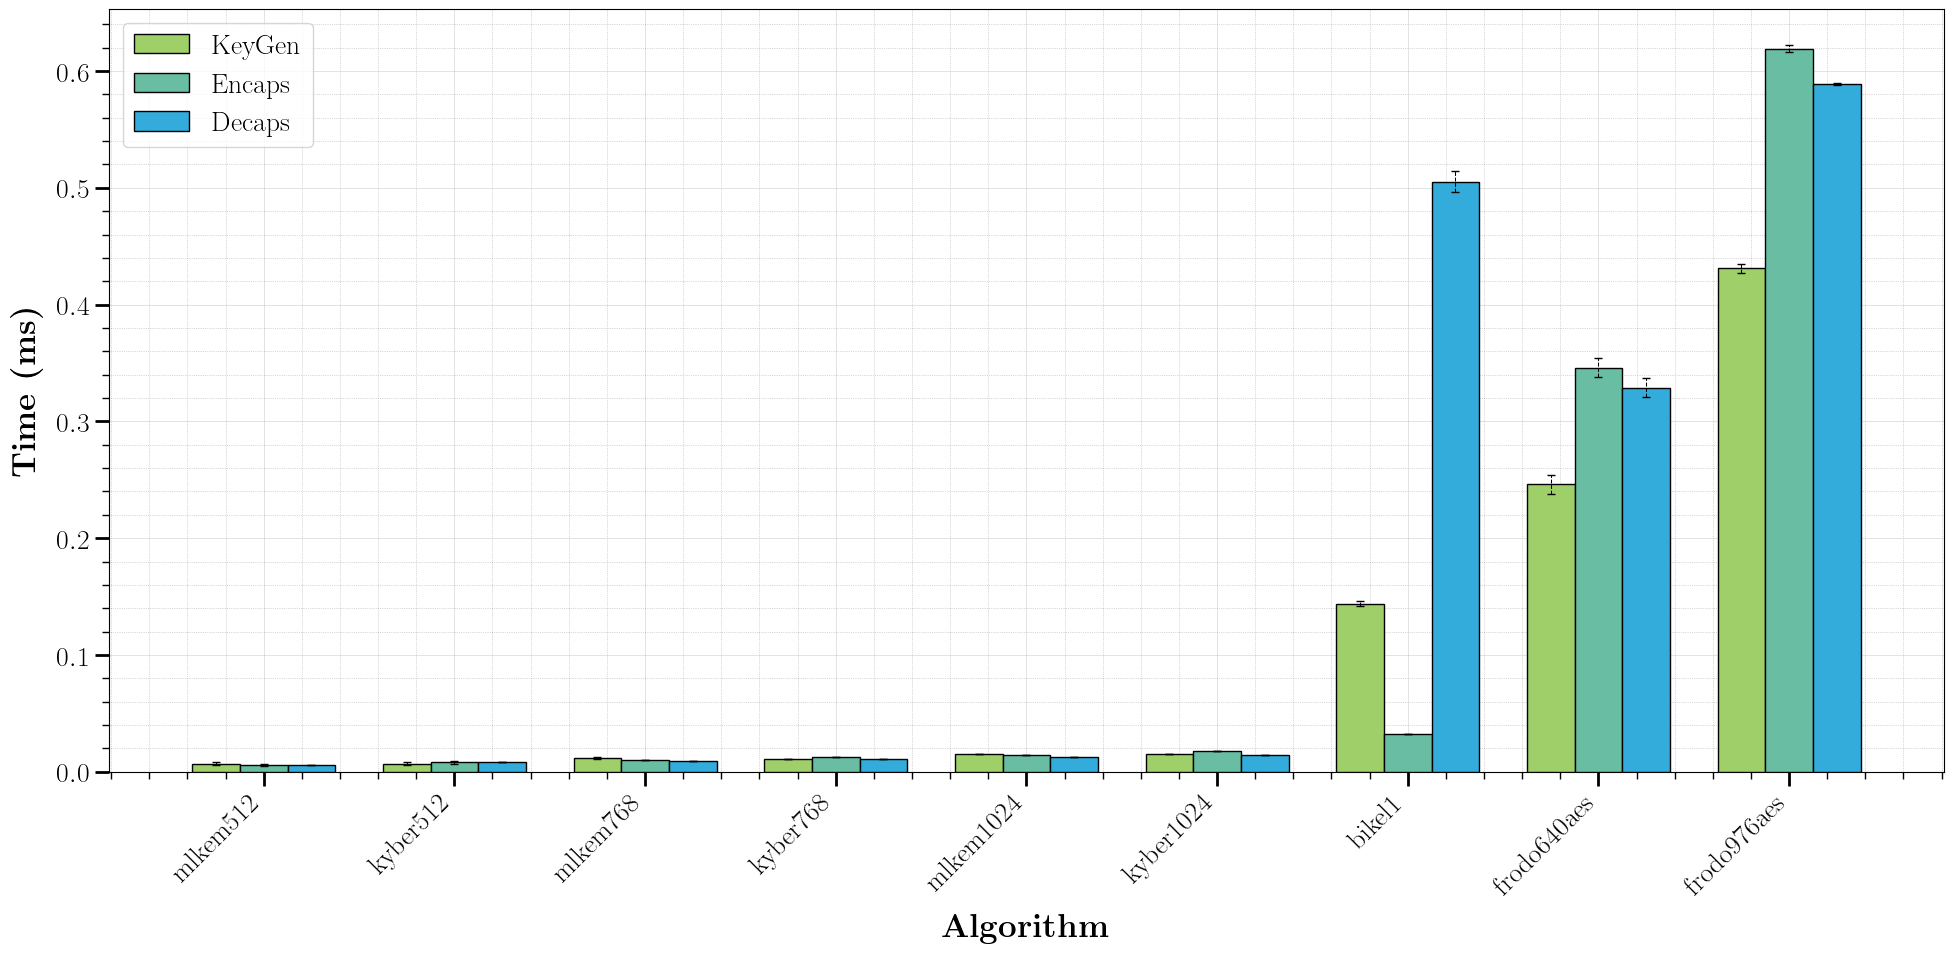

In [12]:
plot_kems_fast(input_df=df_kems_stats, error_suffix="_std", plot_title="kems_fast_times.pdf")

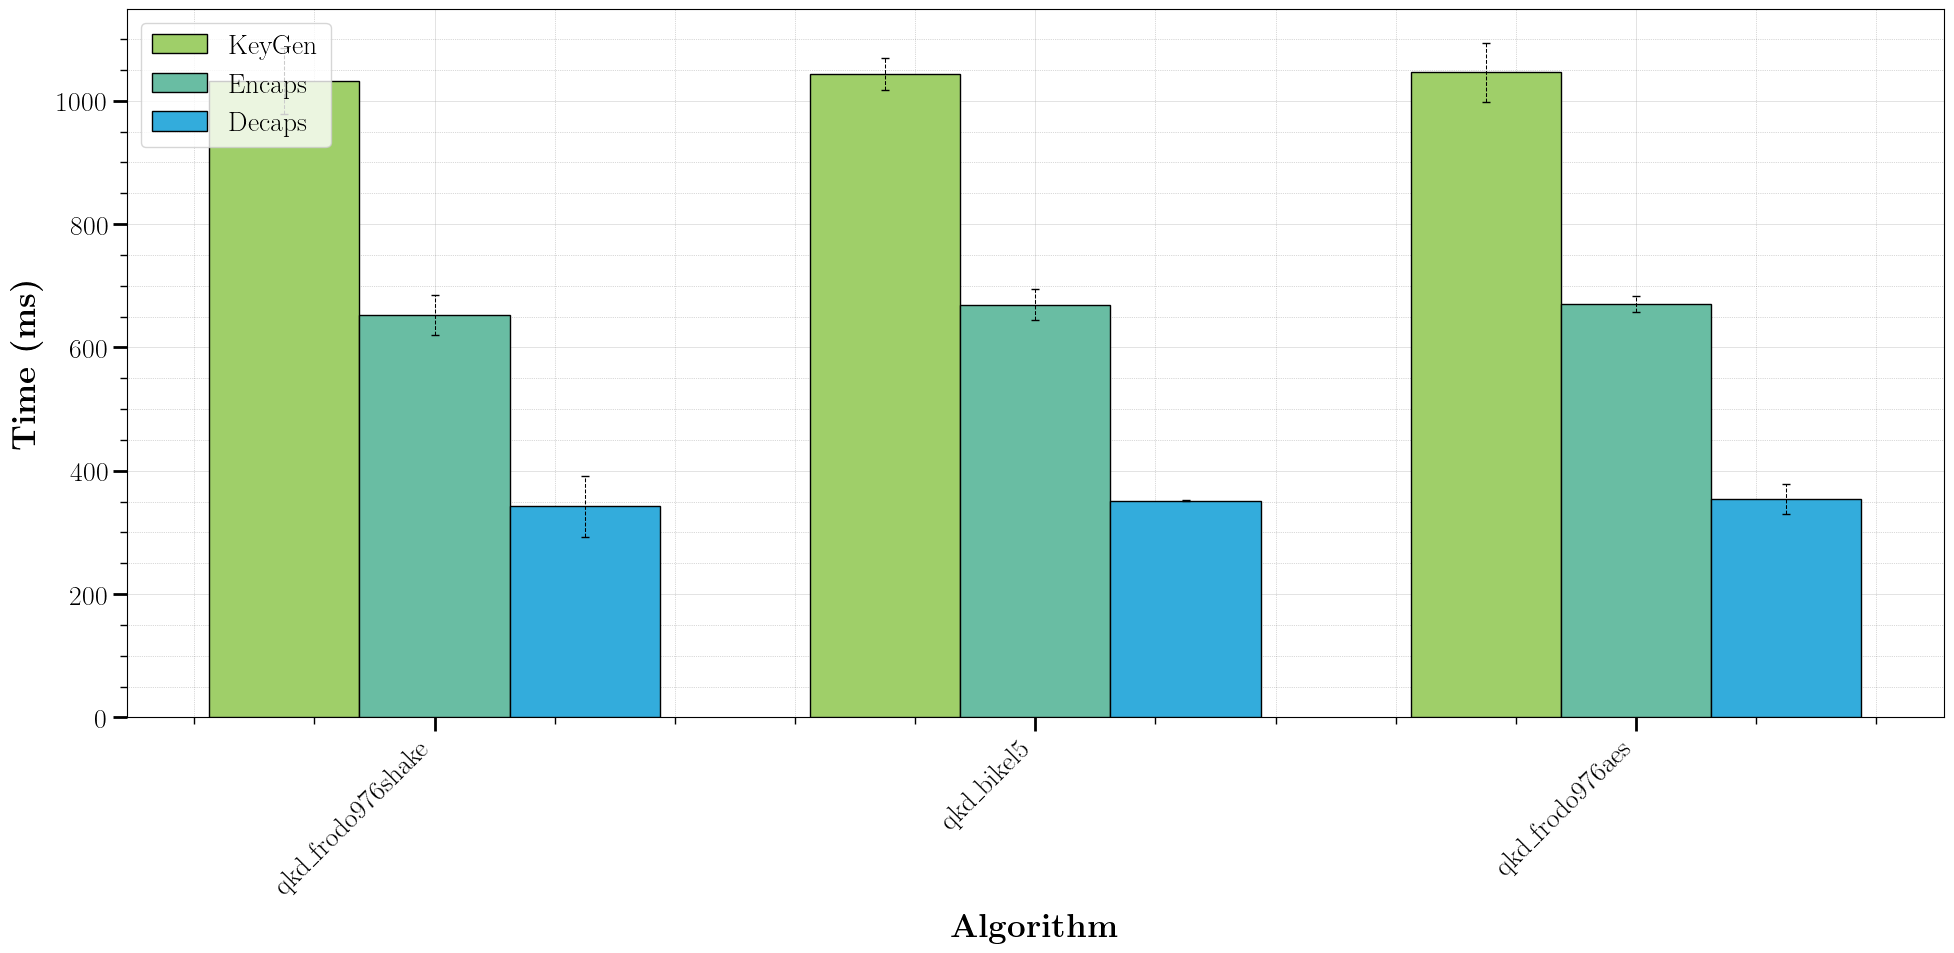

In [13]:
plot_kems_fast(input_df=df_qkdkems_stats, error_suffix="_std", plot_title="qkdkems_fast_times.pdf")

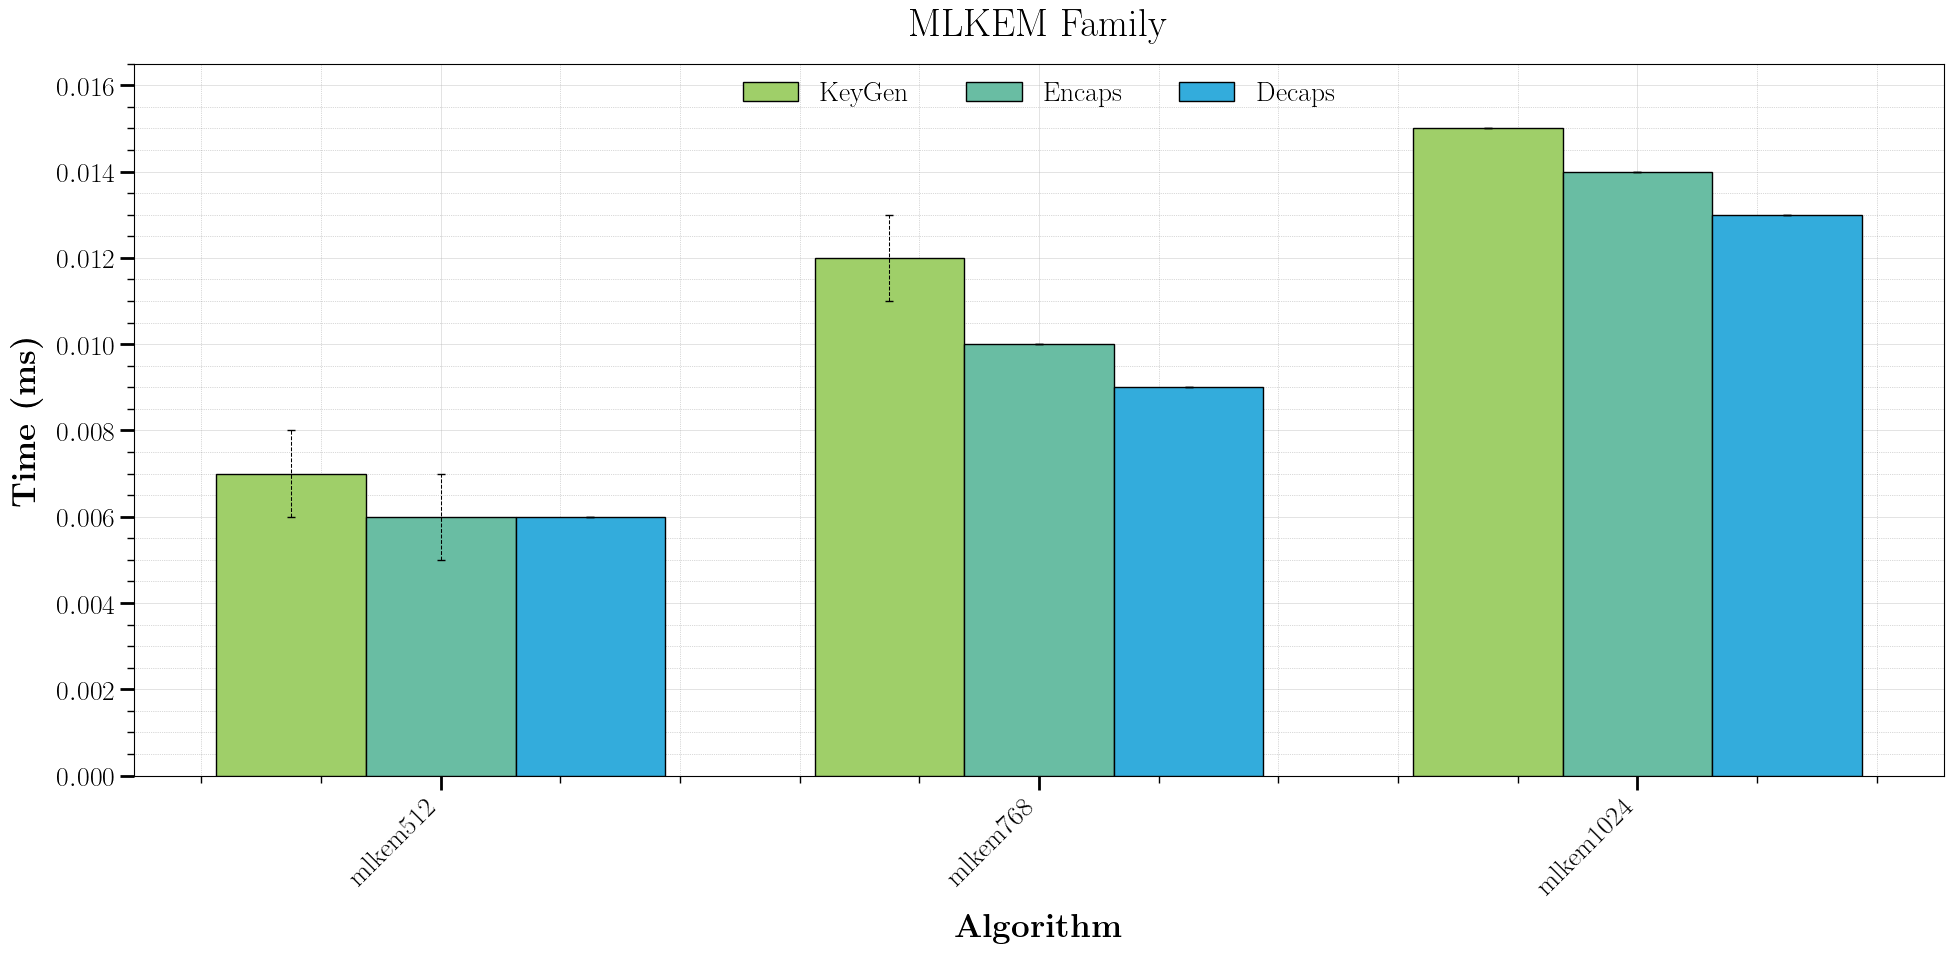

In [14]:
plot_kem_family(input_df=df_kems_stats, family='mlkem', error_suffix="_std", plot_title="mlkem_times.pdf", log_scale=False)

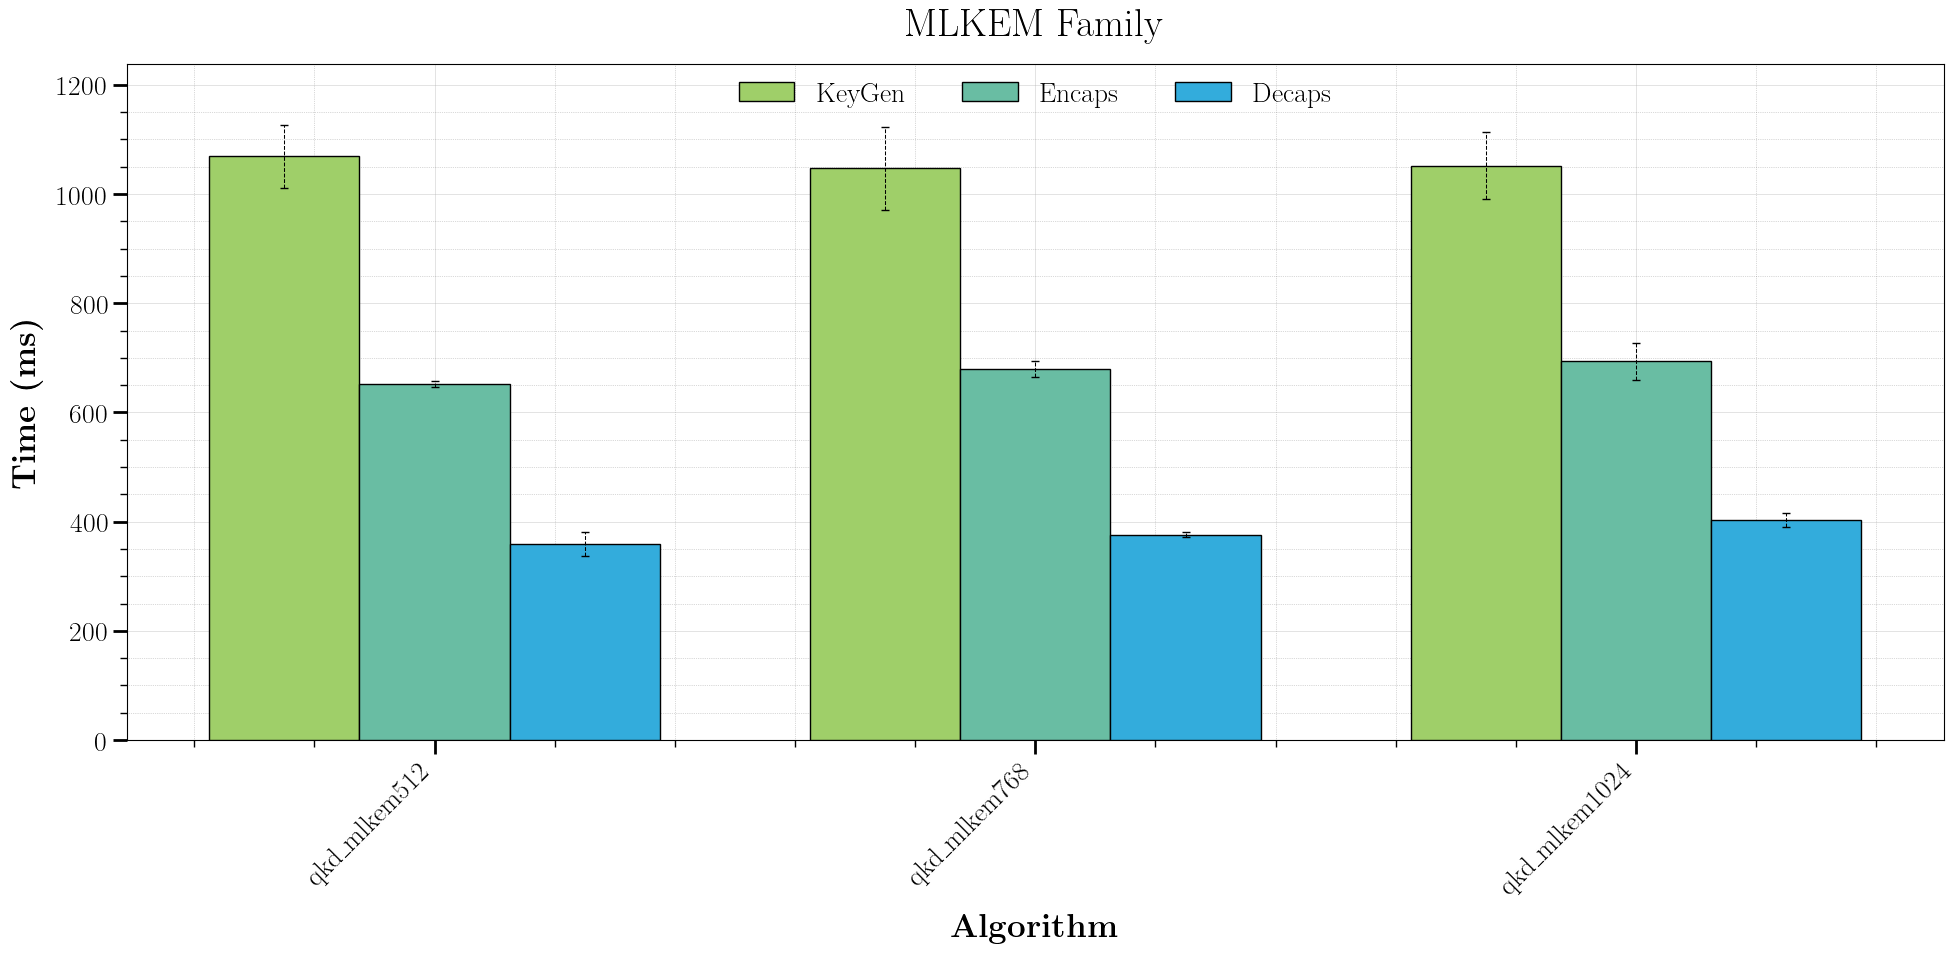

In [15]:
plot_kem_family(input_df=df_qkdkems_stats, family='mlkem', error_suffix="_std", plot_title="qkdmlkem_times.pdf", log_scale=False)

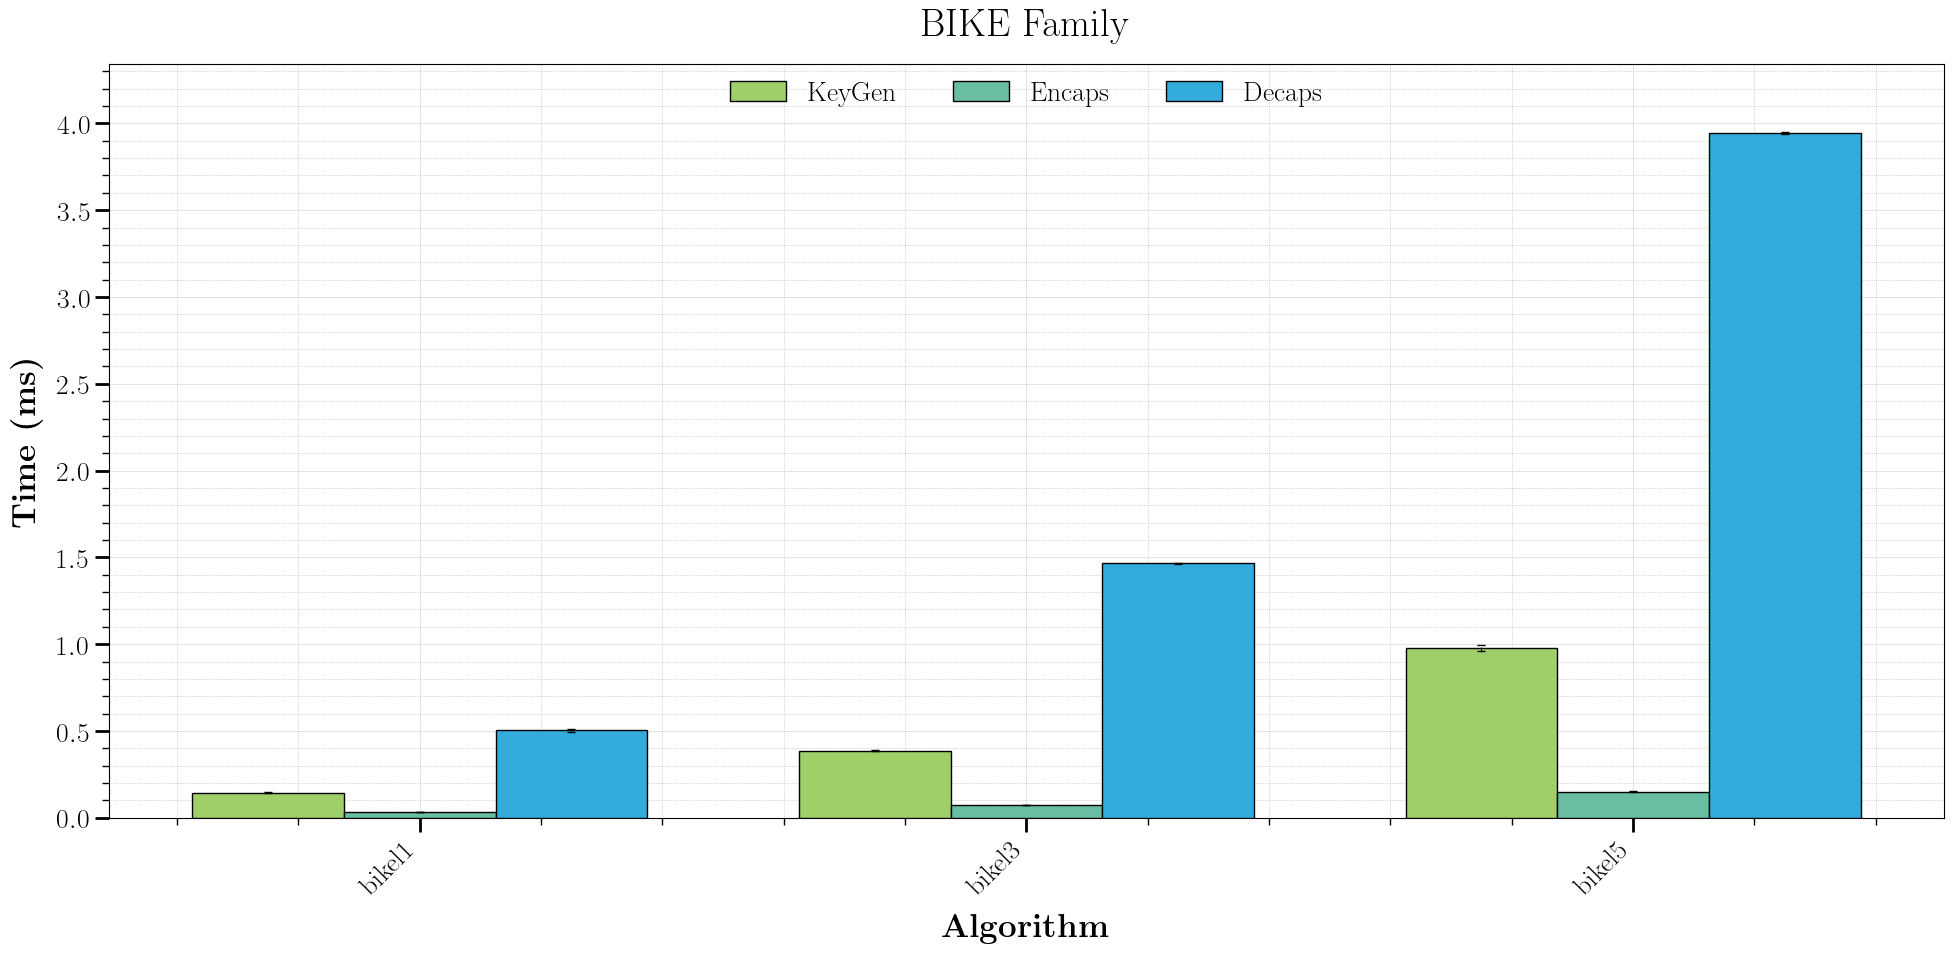

In [16]:
plot_kem_family(input_df=df_kems_stats, family='bike', error_suffix="_std", plot_title="bike_times.pdf", log_scale=False)

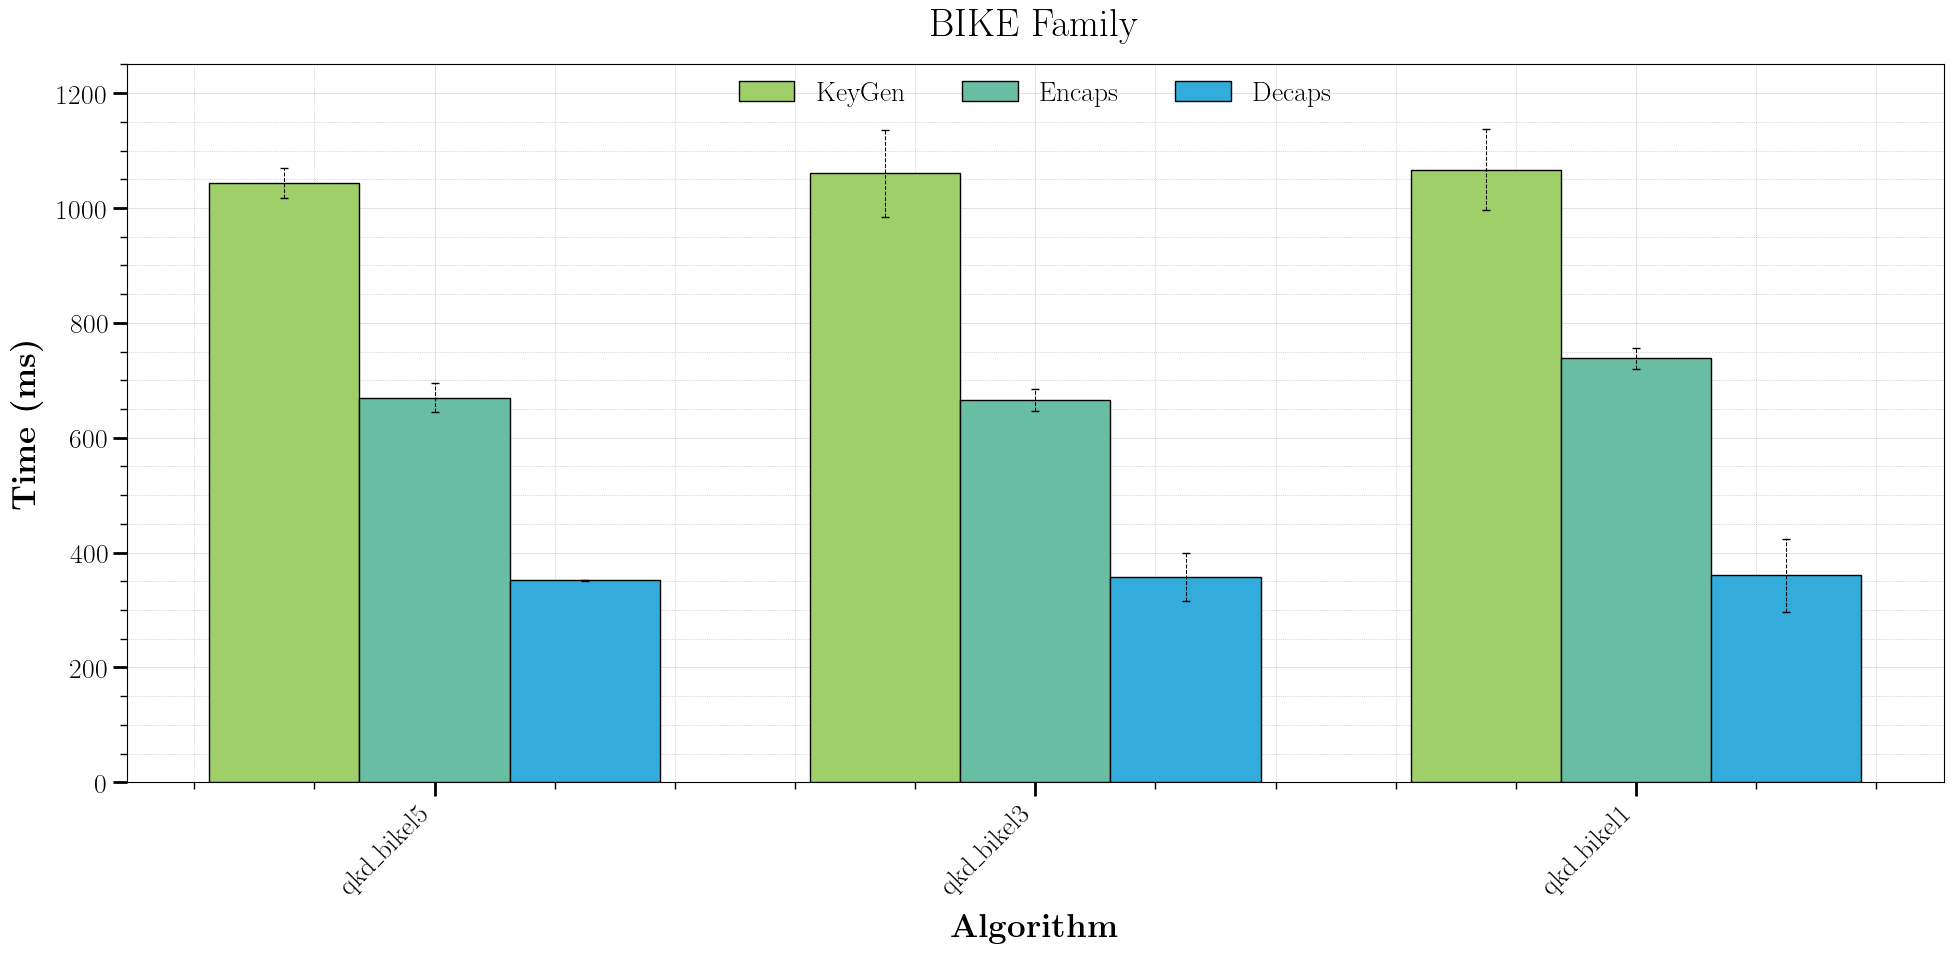

In [17]:
plot_kem_family(input_df=df_qkdkems_stats, family='bike', error_suffix="_std", plot_title="qkdbike_times.pdf", log_scale=False)

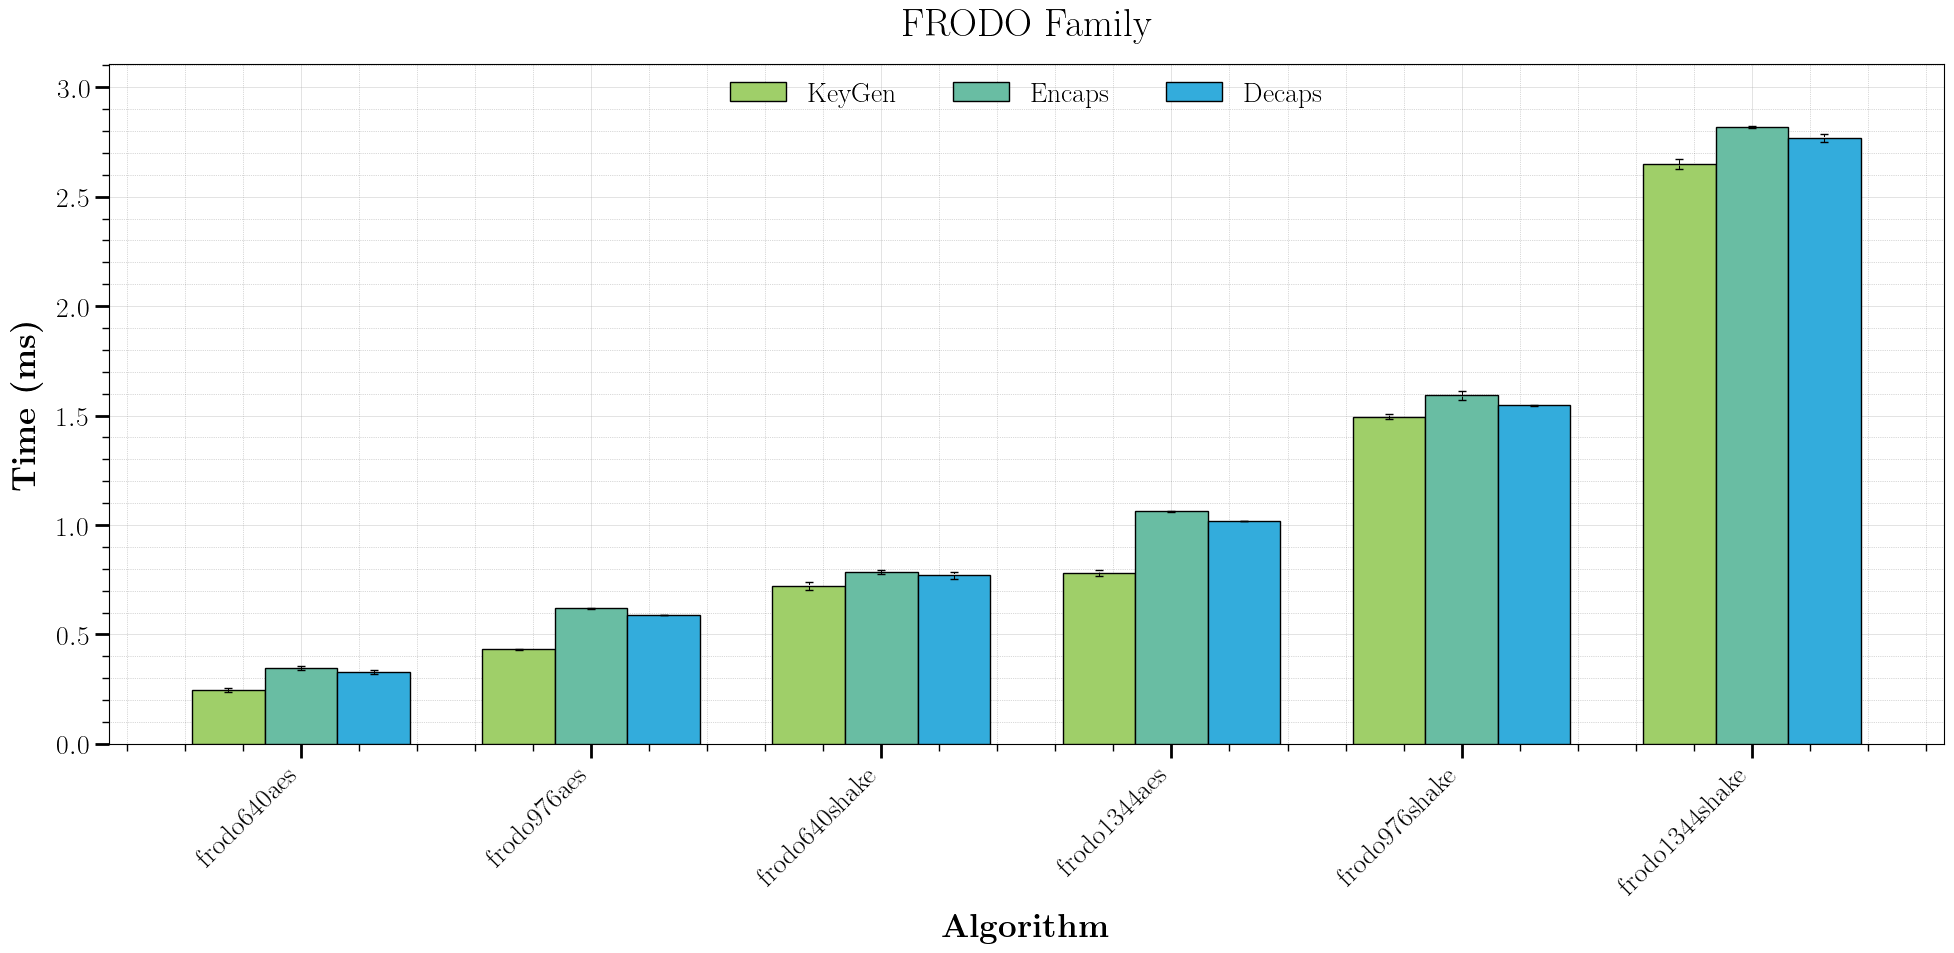

In [18]:
plot_kem_family(input_df=df_kems_stats, family='frodo', error_suffix="_std", plot_title="frodo_times.pdf", log_scale=False)

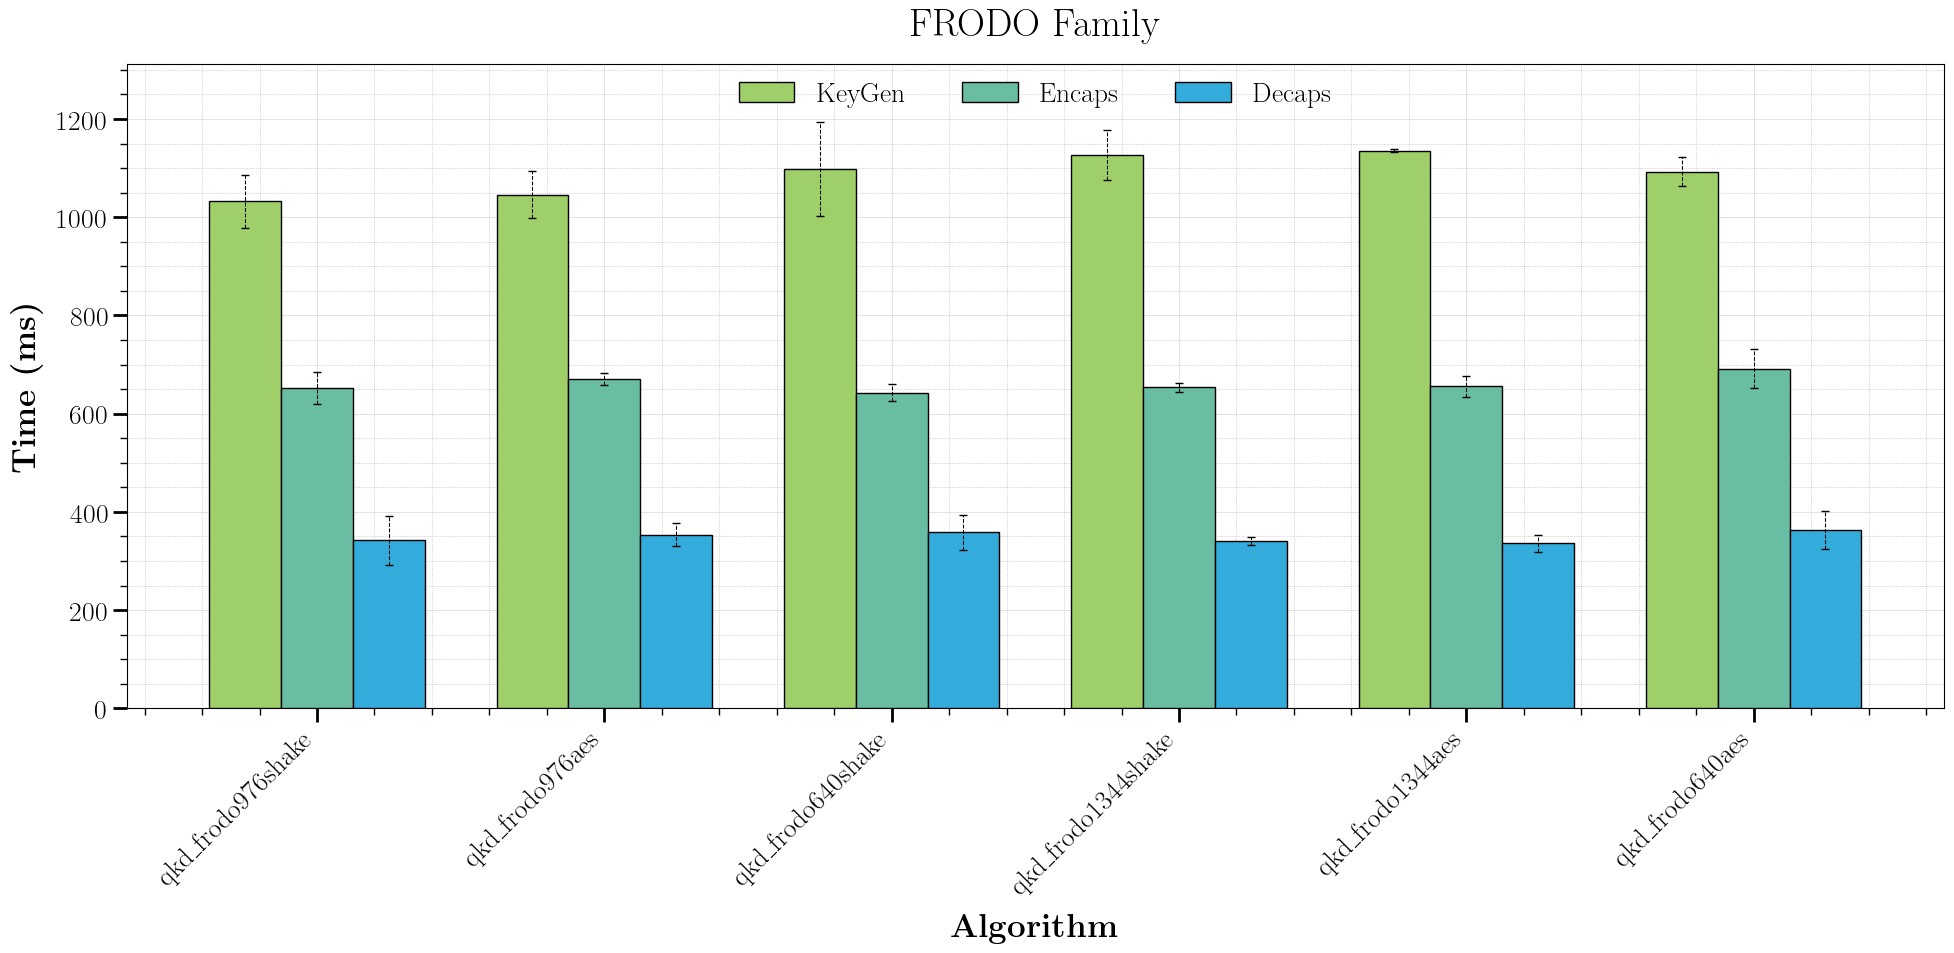

In [19]:
plot_kem_family(input_df=df_qkdkems_stats, family='frodo', error_suffix="_std", plot_title="qkdfrodo_times.pdf", log_scale=False)

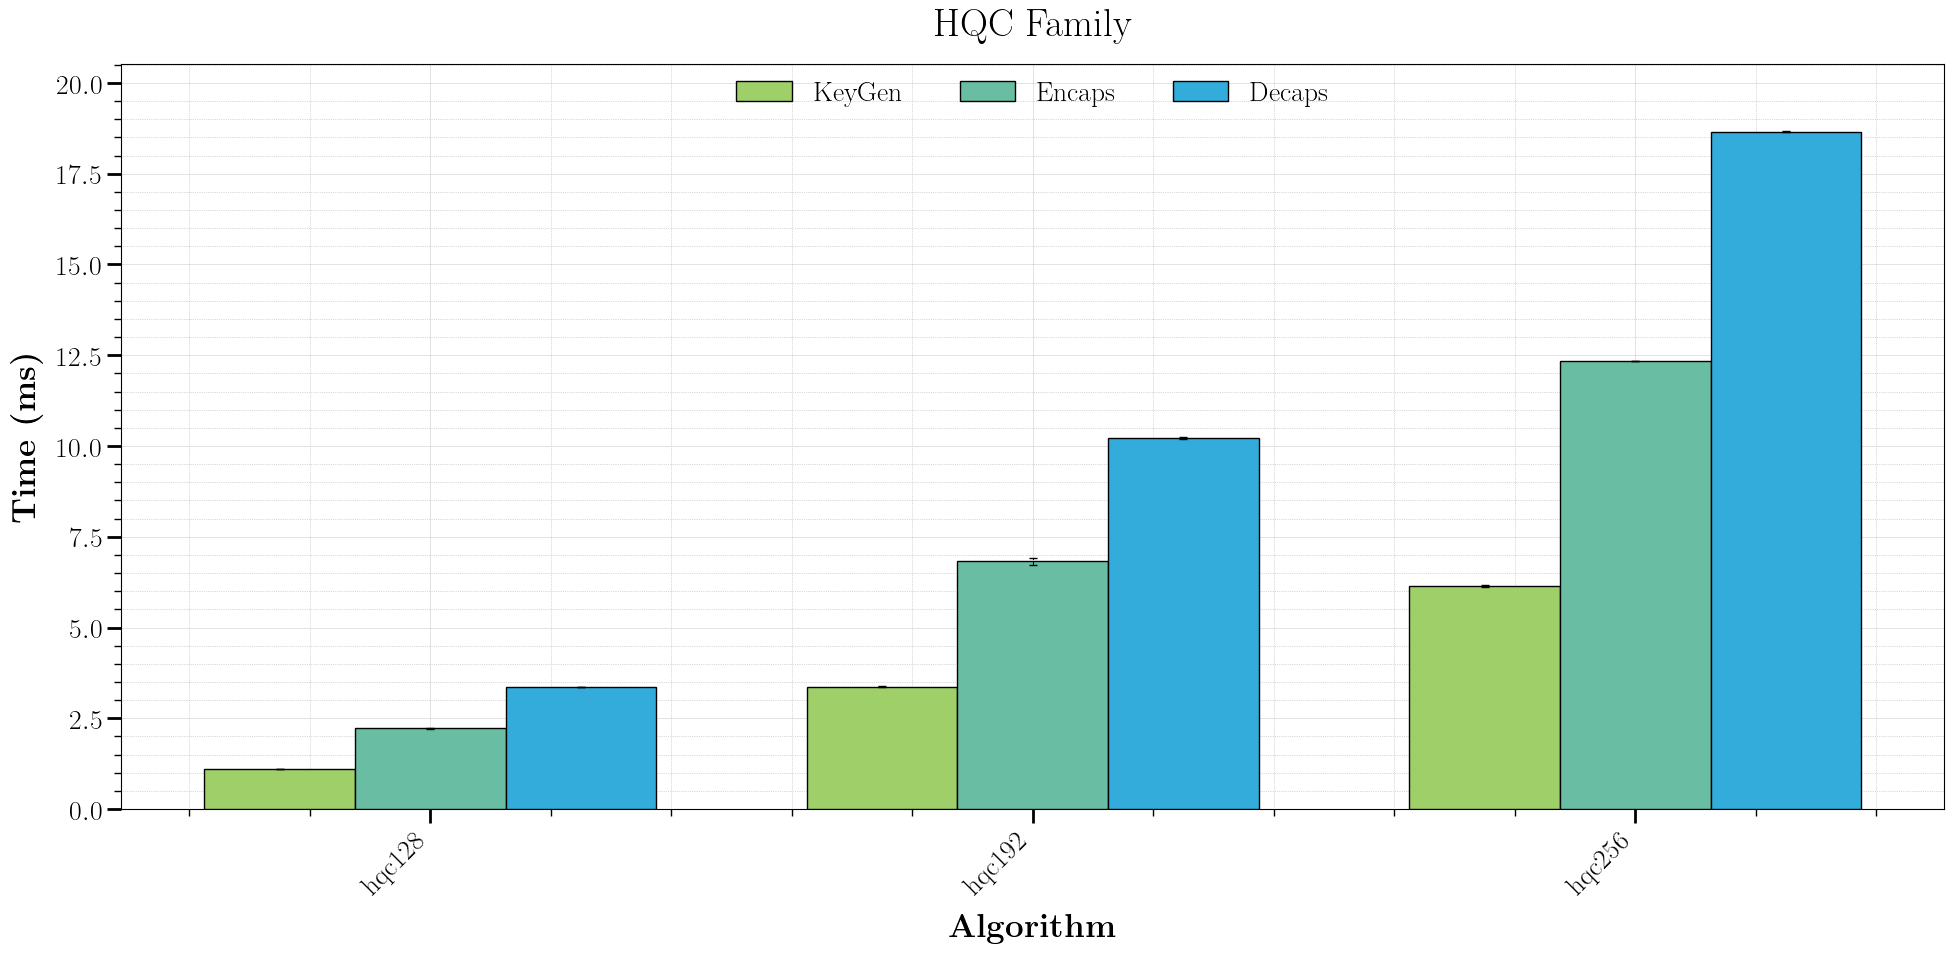

In [20]:
plot_kem_family(input_df=df_kems_stats, family='hqc', error_suffix="_std", plot_title="hqc_times.pdf", log_scale=False)

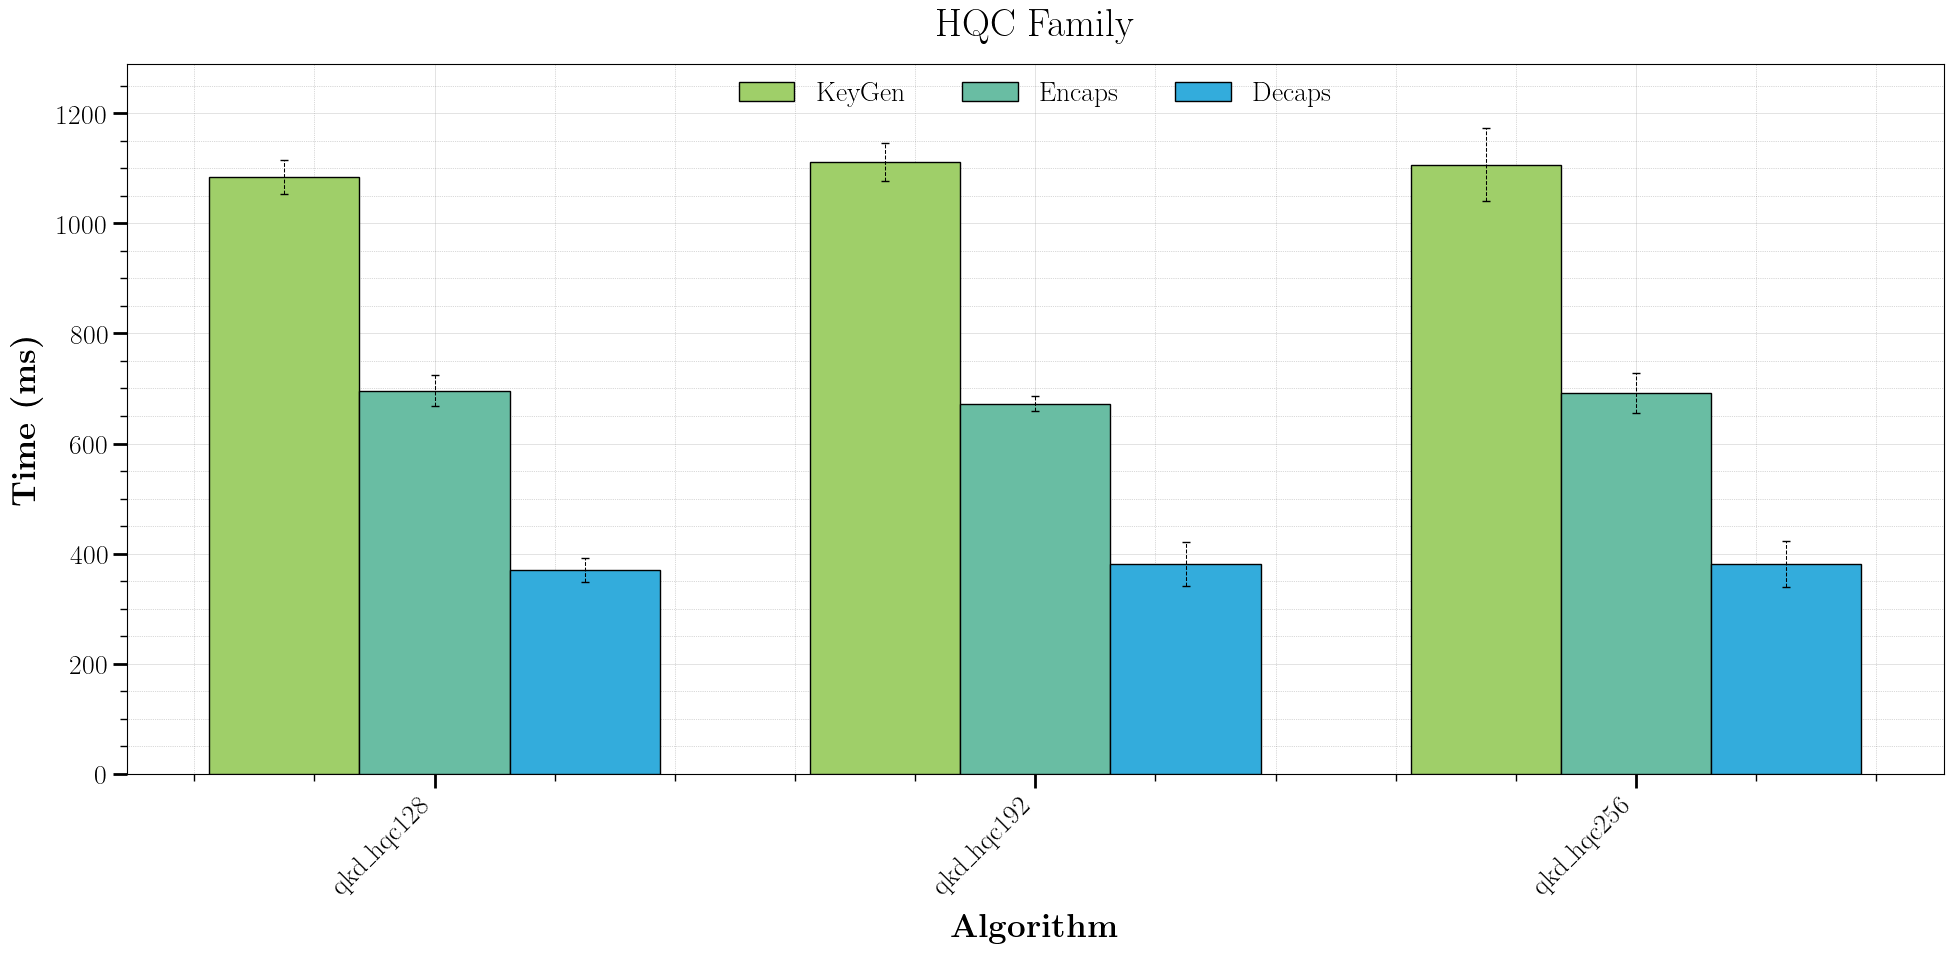

In [21]:
plot_kem_family(input_df=df_qkdkems_stats, family='hqc', error_suffix="_std", plot_title="qkdhqc_times.pdf", log_scale=False)

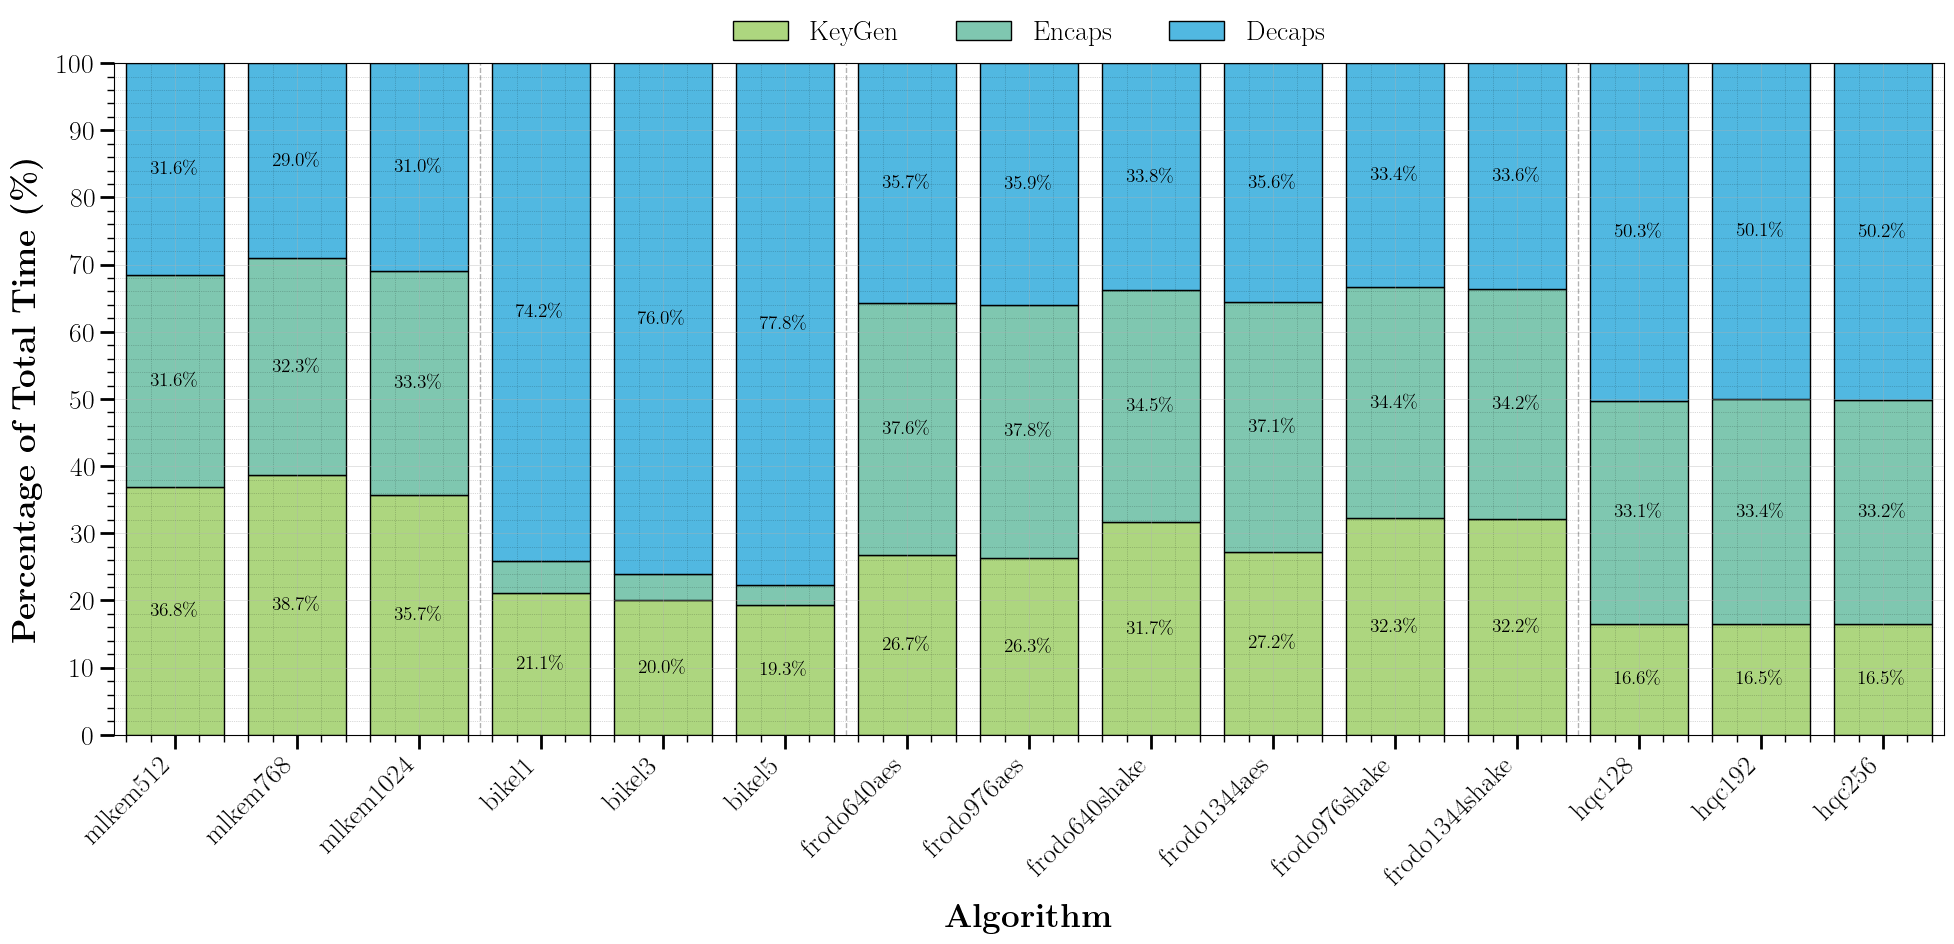

In [22]:
plot_ops_percent(input_df=df_kems_stats, family=None, plot_title="kems_ops_overhead.pdf")

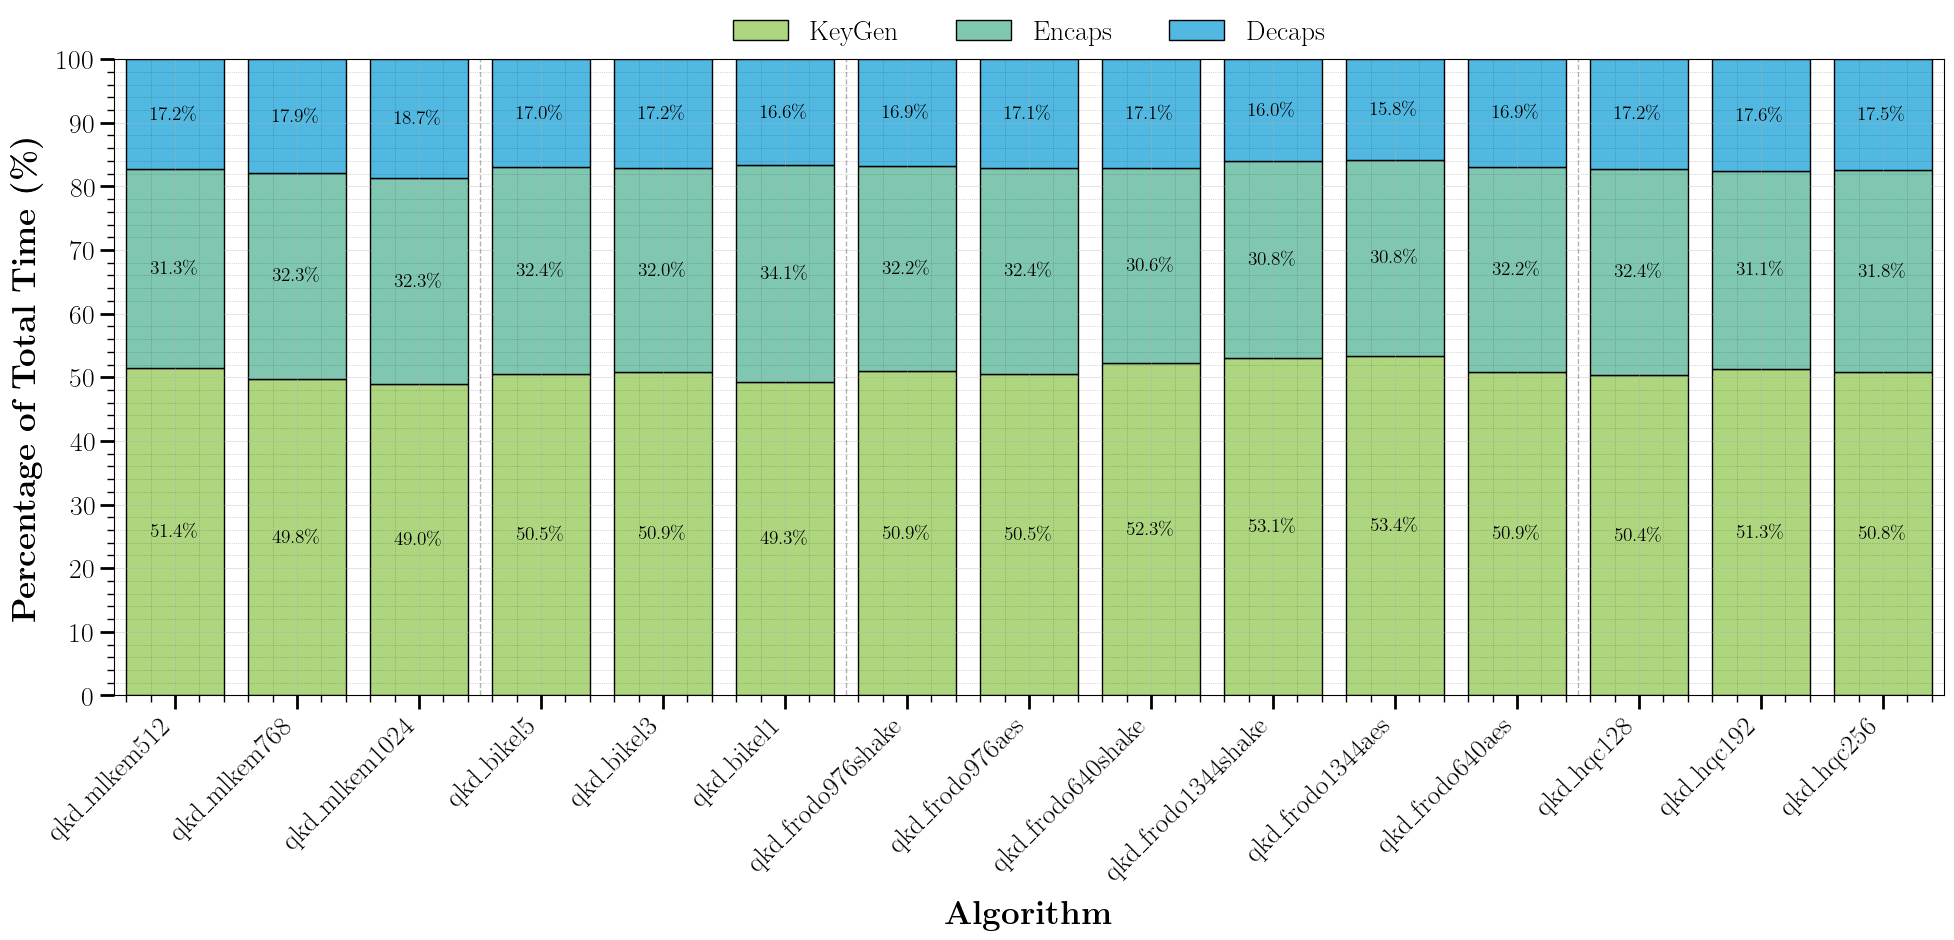

In [23]:
plot_ops_percent(input_df=df_qkdkems_stats, family=None, plot_title="qkdkems_ops_overhead.pdf")

In [24]:
# Combine the DataFrames for comparison 

from config import (KEM_FAMILIES)

algo_names = [alg for family in KEM_FAMILIES.values() for alg in family]

# Create copies to avoid modifying originals
df_std = df_kems_stats.copy()
df_qkd = df_qkdkems_stats.copy()

# Filtering 
df_std_ = df_std[df_std.index.isin(algo_names)]
df_qkd_ = df_qkd[df_qkd.index.str.replace('qkd_', '').isin(algo_names)]
    
# Rename indices to match if needed
df_qkd_.index = [idx.replace('qkd_', '') for idx in df_qkd_.index]
    
# Concatenate and sort
comparison_stats = pd.concat([df_std_, df_qkd_], 
                            keys=['OQS', 'QKD'],
                            names=['Variant', 'Algorithm'])

comparison_stats.to_csv("data/comparison_stats.csv")

comparison_stats

NumIterations  KeyGen(ms)_mean  KeyGen(ms)_std  \
Variant Algorithm                                                        
OQS     bikel1                      3            0.144           0.002   
        bikel3                      3            0.386           0.002   
        bikel5                      3            0.977           0.016   
        frodo1344aes                3            0.779           0.014   
        frodo1344shake              3            2.650           0.022   
        frodo640aes                 3            0.246           0.008   
        frodo640shake               3            0.721           0.017   
        frodo976aes                 3            0.431           0.004   
        frodo976shake               3            1.495           0.011   
        hqc128                      3            1.110           0.004   
        hqc192                      3            3.375           0.002   
        hqc256                      3            6.140           0.035   
        mlkem1024                   3            0.015           0.000   
        mlkem512                    3            0.007           0.001   
        mlkem768                    3            0.012           0.001   
QKD     bikel1                      3         1066.767          70.695   
        bikel3                      3         1060.449          75.825   
        bikel5                      3         1043.554          26.422   
        frodo1344aes                3         1135.535           3.276   
        frodo1344shake              3         1126.056          50.683   
        frodo640aes                 3         1093.100          28.993   
        frodo640shake               3         1097.522          95.778   
        frodo976aes                 3         1045.809          48.221   
        frodo976shake               3         1032.476          53.380   
        hqc128                      3         1084.674          30.411   
        hqc192                      3         1111.629          35.103   
        hqc256                      3         1106.609          66.368   
        mlkem1024                   3         1051.798          60.953   
        mlkem512                    3         1068.675          57.316   
        mlkem768                    3         1046.723          75.280   

                        KeyGen(ms)_min  KeyGen(ms)_max  Encaps(ms)_mean  \
Variant Algorithm                                                         
OQS     bikel1                   0.143           0.146            0.032   
        bikel3                   0.384           0.387            0.076   
        bikel5                   0.959           0.987            0.151   
        frodo1344aes             0.766           0.793            1.062   
        frodo1344shake           2.634           2.675            2.819   
        frodo640aes              0.241           0.255            0.346   
        frodo640shake            0.706           0.740            0.786   
        frodo976aes              0.428           0.435            0.619   
        frodo976shake            1.483           1.503            1.592   
        hqc128                   1.107           1.114            2.222   
        hqc192                   3.373           3.377            6.821   
        hqc256                   6.100           6.163           12.346   
        mlkem1024                0.015           0.015            0.014   
        mlkem512                 0.007           0.008            0.006   
        mlkem768                 0.011           0.013            0.010   
QKD     bikel1                1005.602        1144.168          738.114   
        bikel3                 973.370        1111.882          666.062   
        bikel5                1026.646        1074.002          669.413   
        frodo1344aes          1132.483        1138.996          656.240   
        frodo1344shake        1092.404        1184.348          654.148   
     

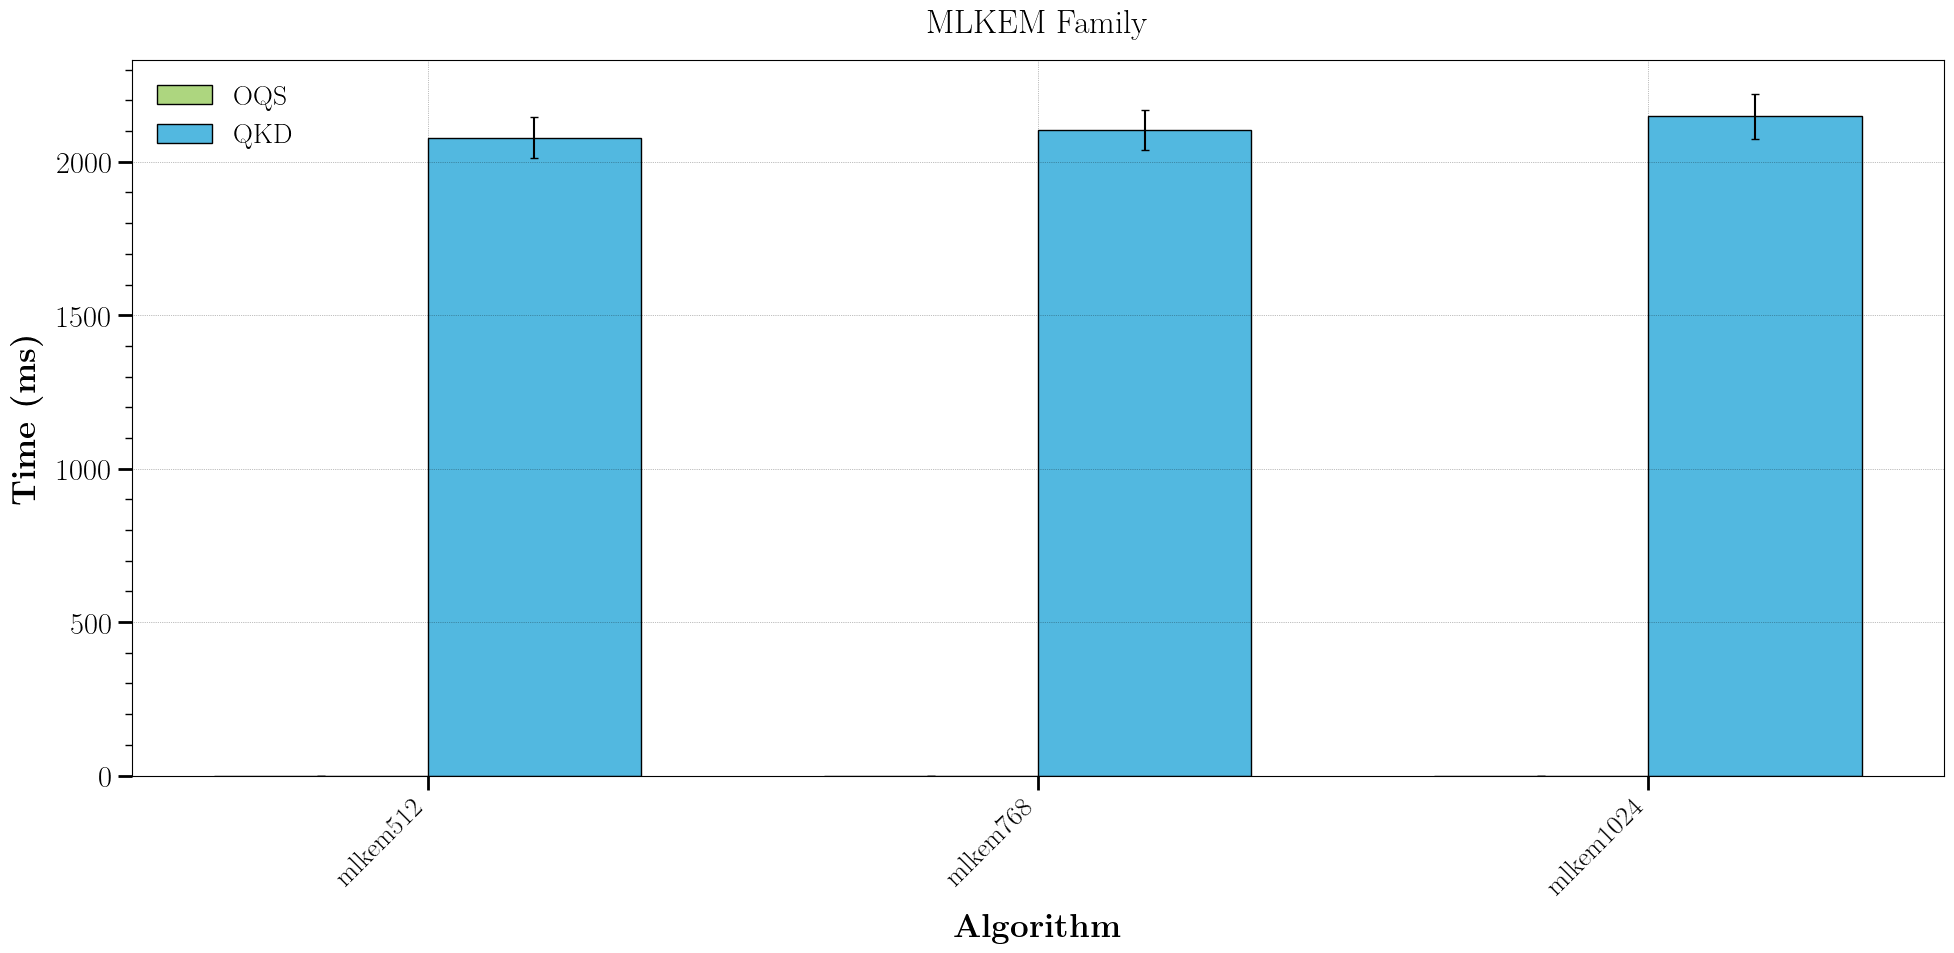

In [25]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='TotalTime(ms)', plot_title="mlkem_comparison.pdf")

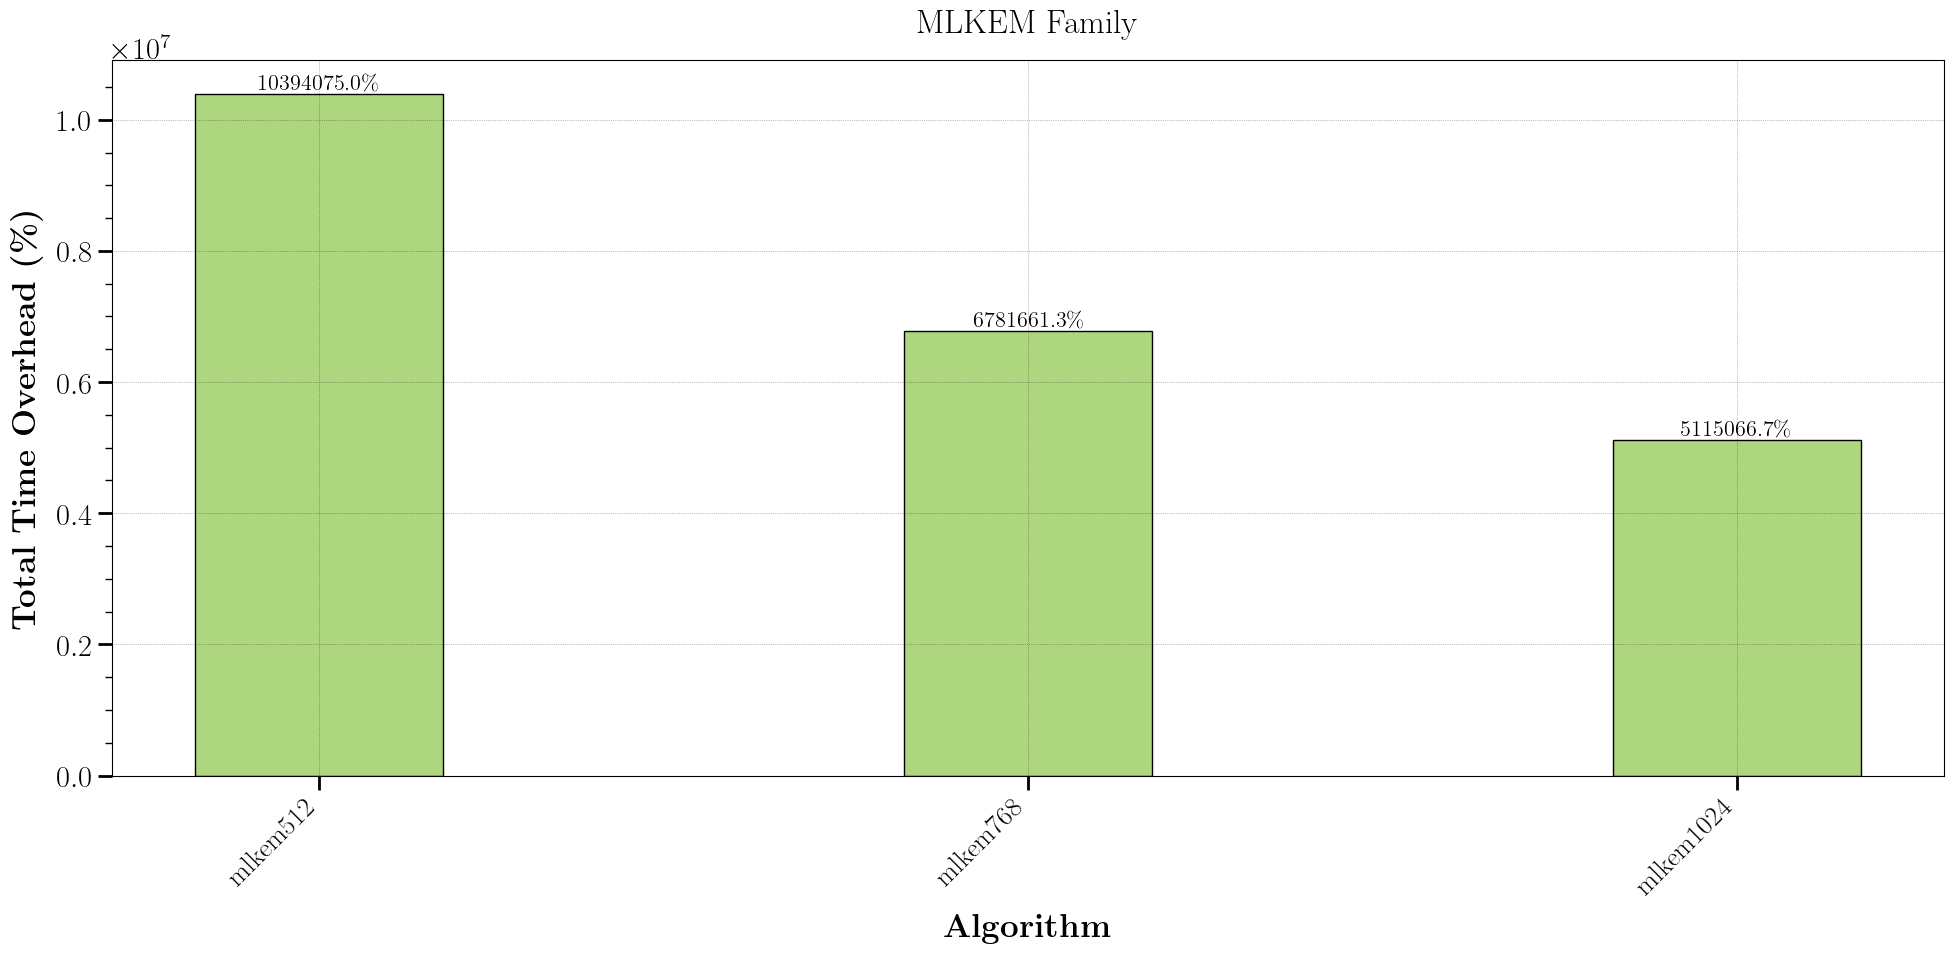

In [26]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='TotalTime(ms)', overhead=True, plot_title="mlkem_comparison_overhead.pdf")

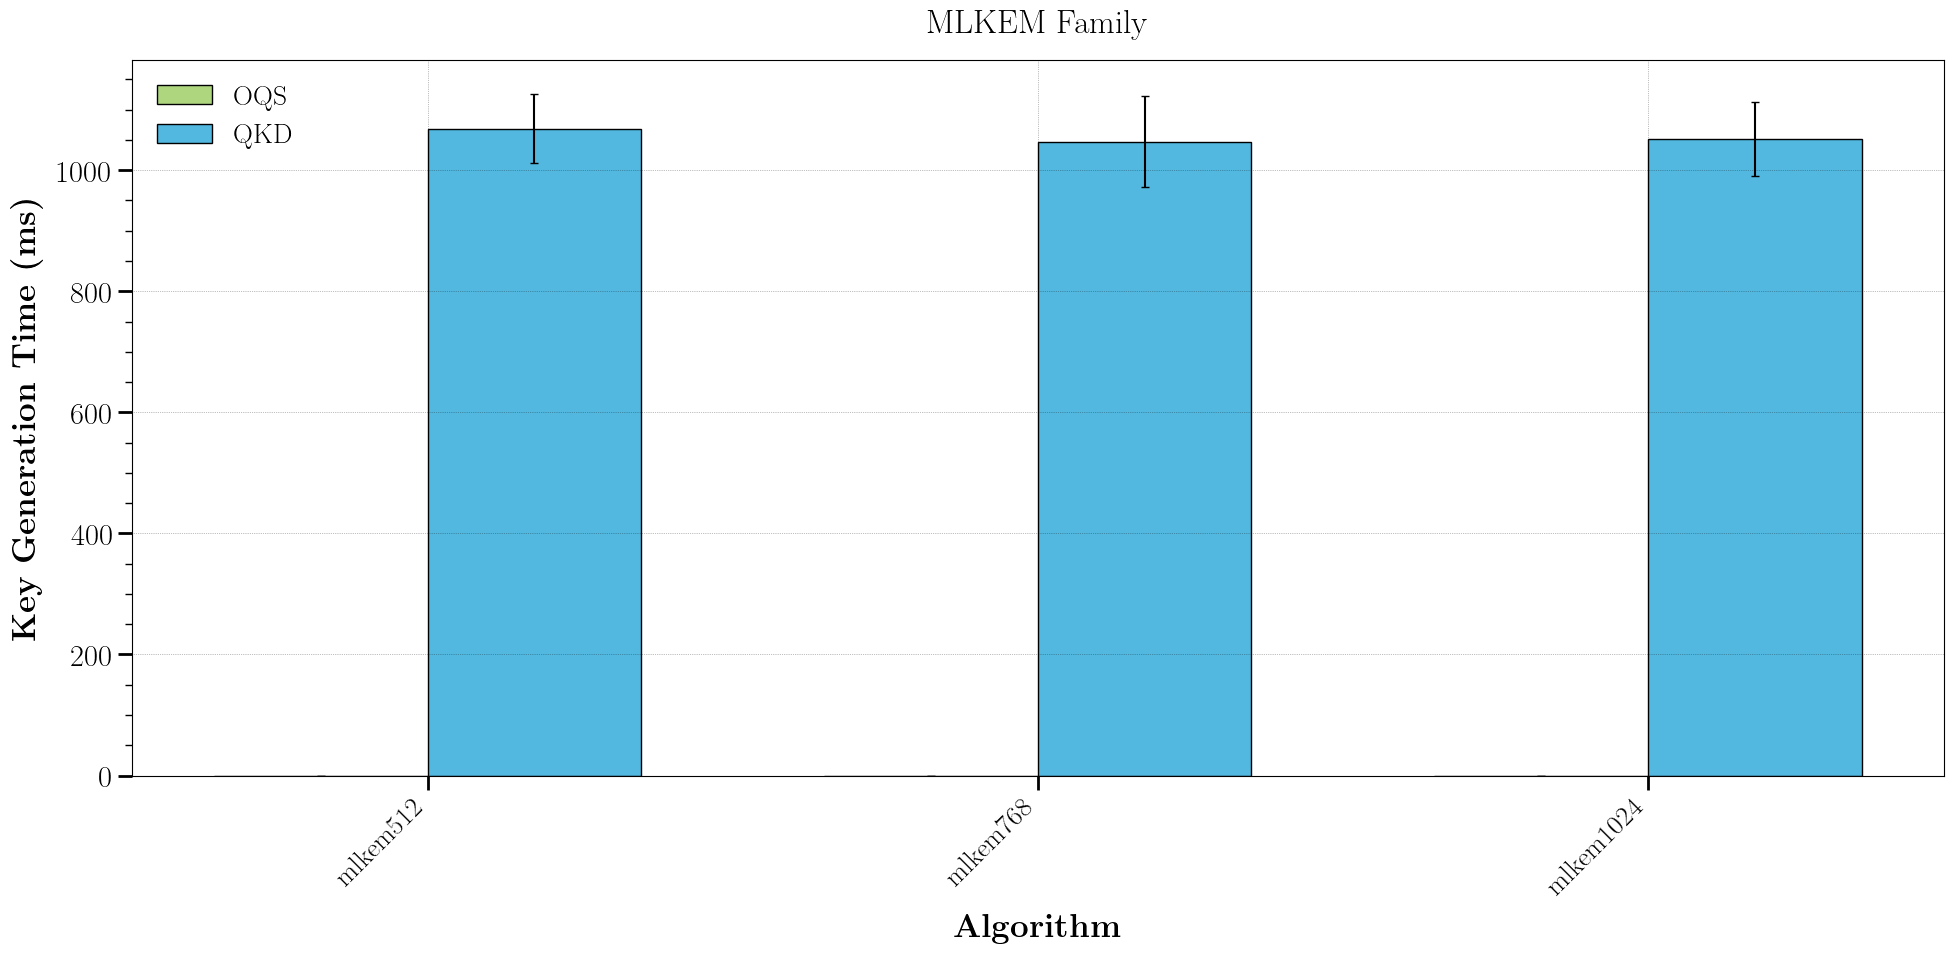

In [27]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='KeyGen(ms)', plot_title="mlkem_comparison_keygen.pdf")

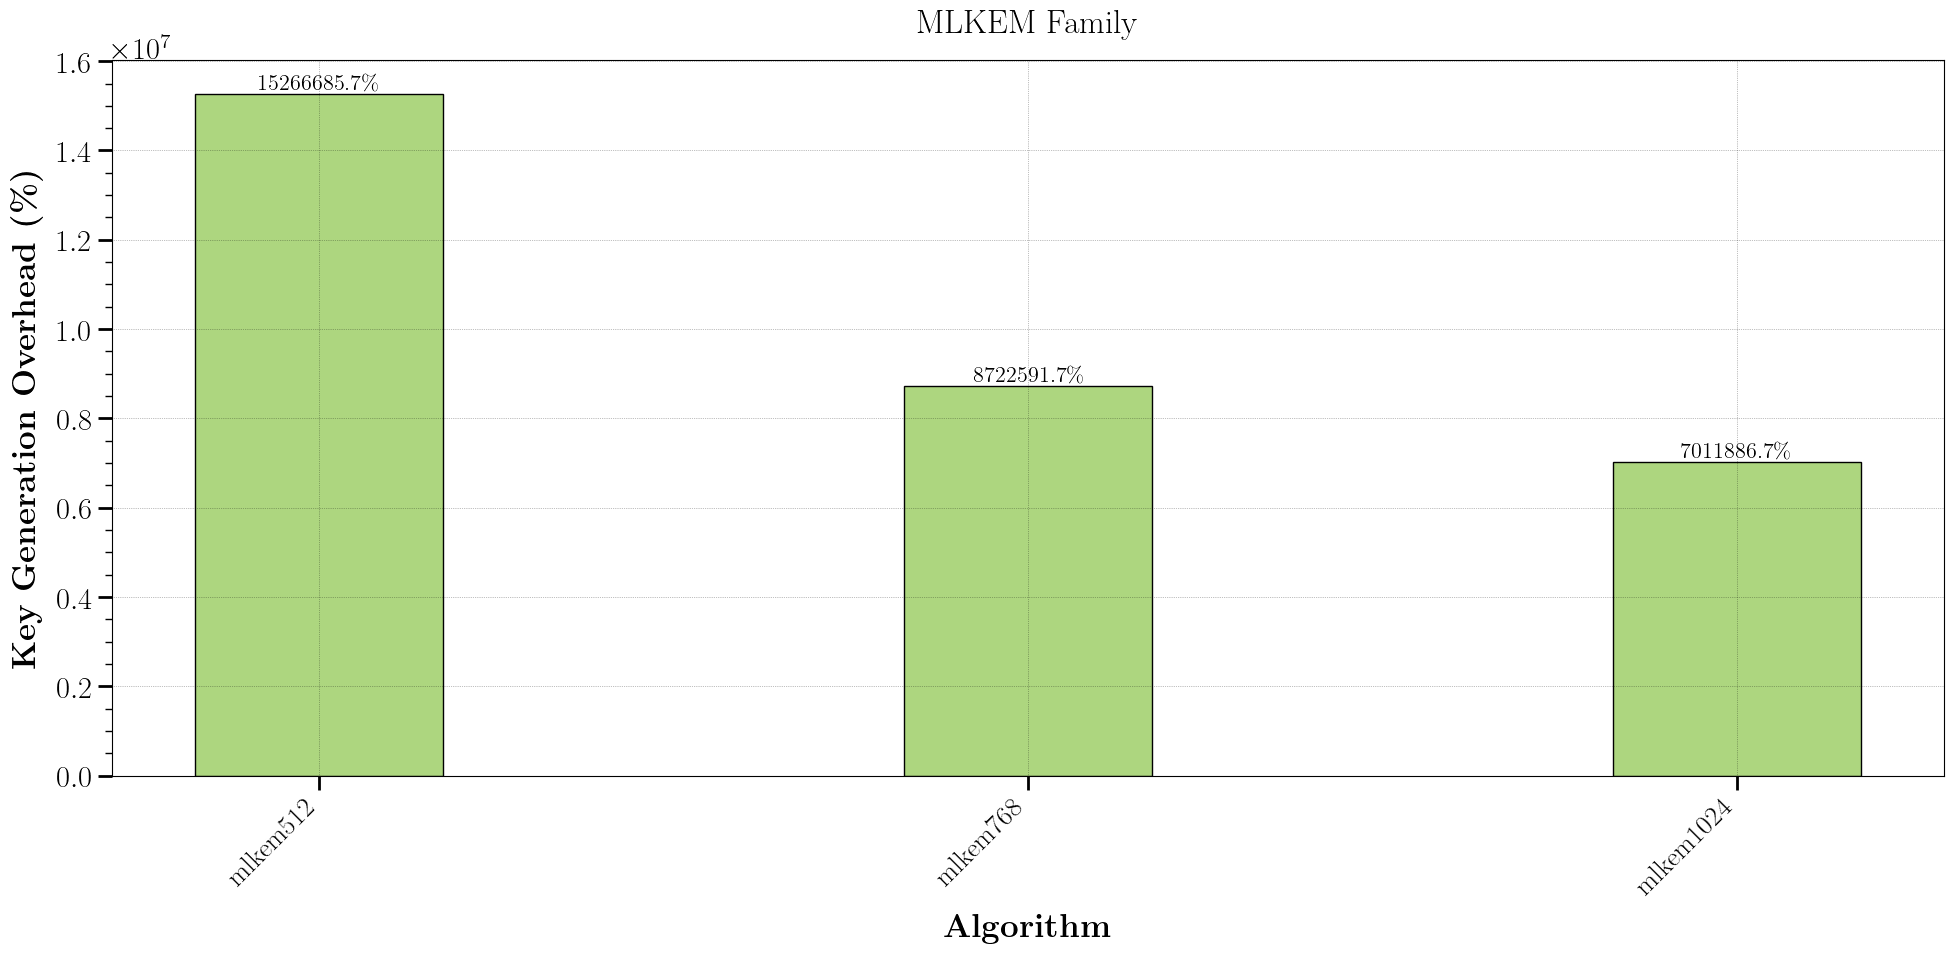

In [28]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='KeyGen(ms)', overhead=True, plot_title="mlkem_comparison_keygen_overhead.pdf")

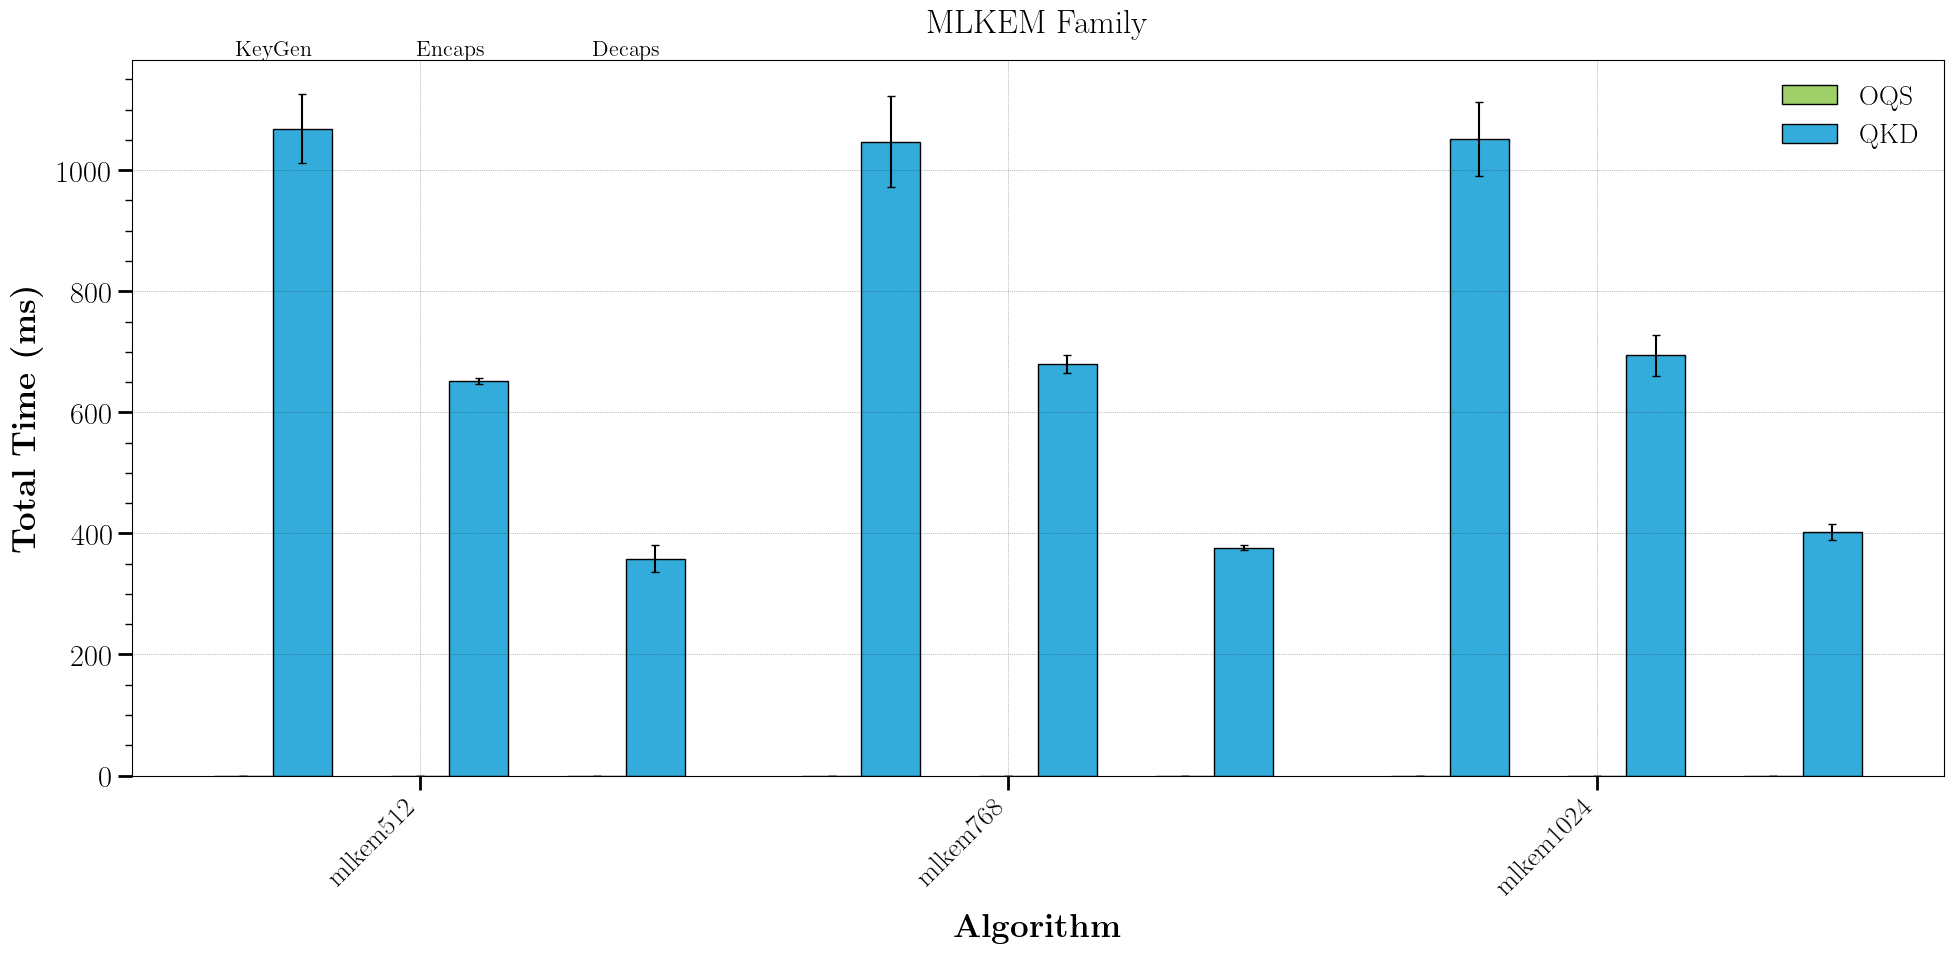

In [29]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='all', plot_title="mlkem_comparison_ops.pdf")

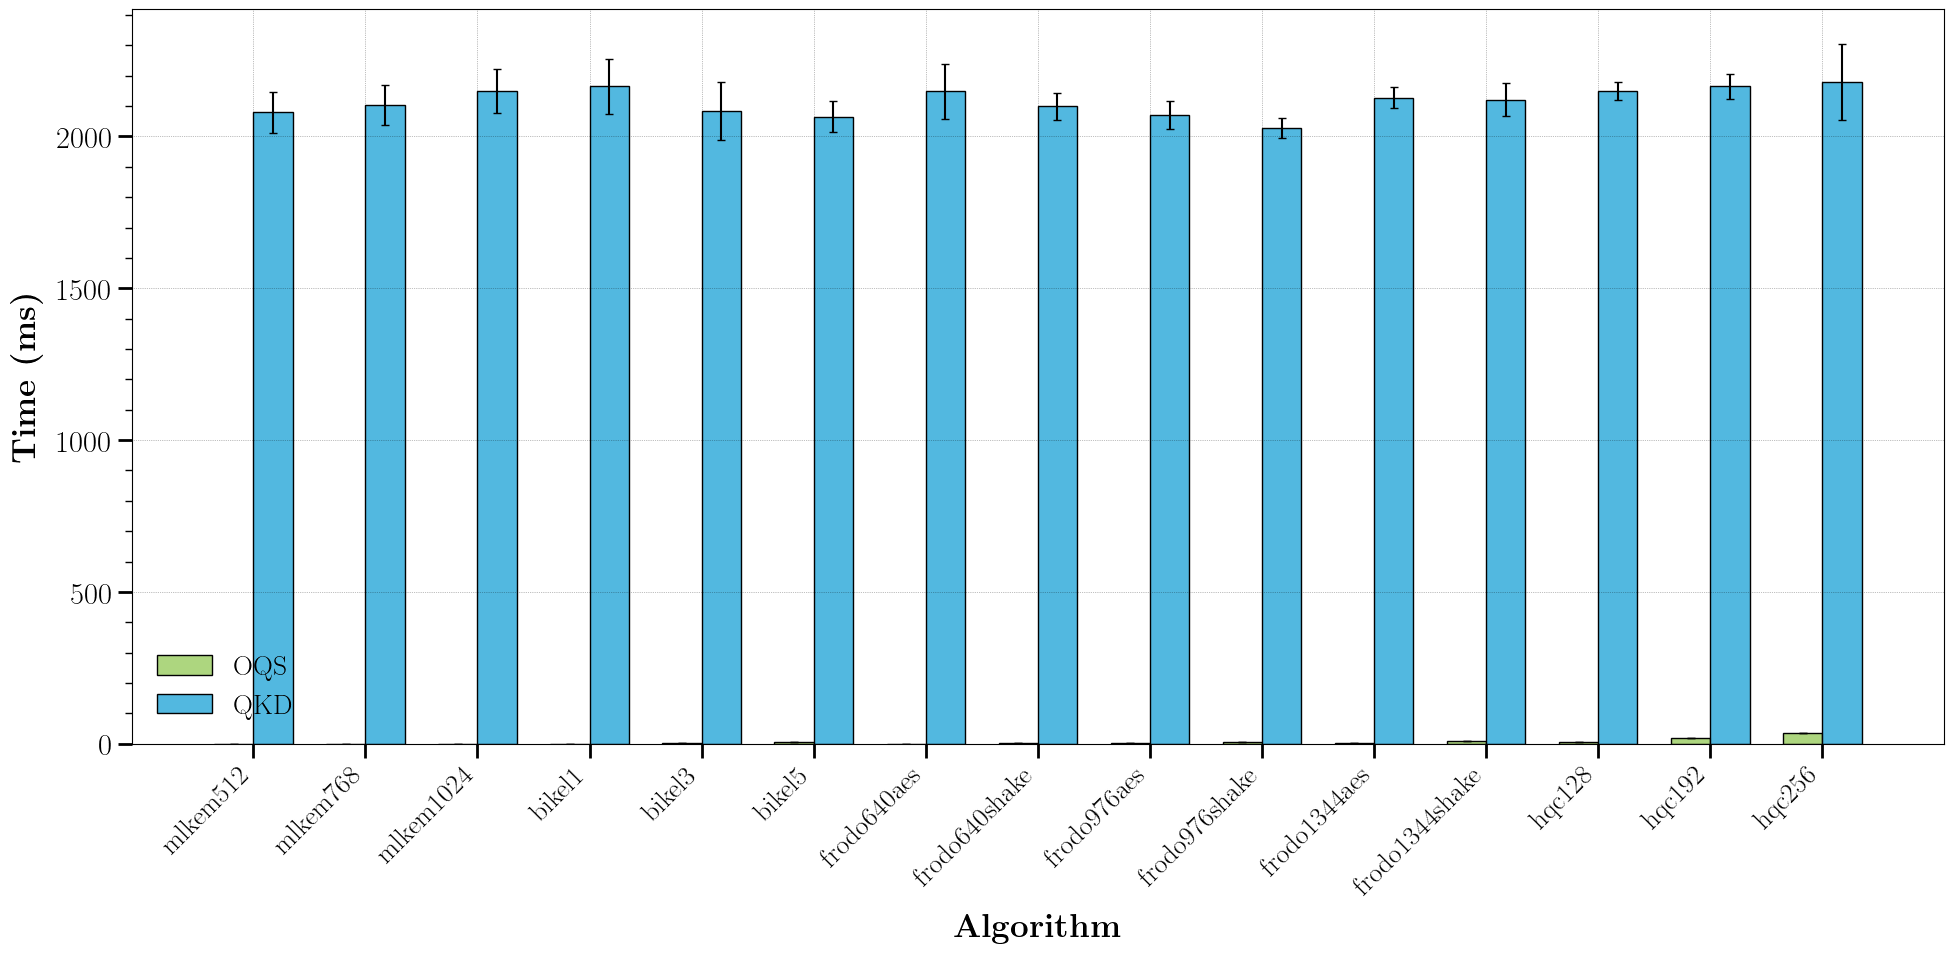

In [30]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=False, operation='TotalTime(ms)',plot_title="kems_comparison.pdf")

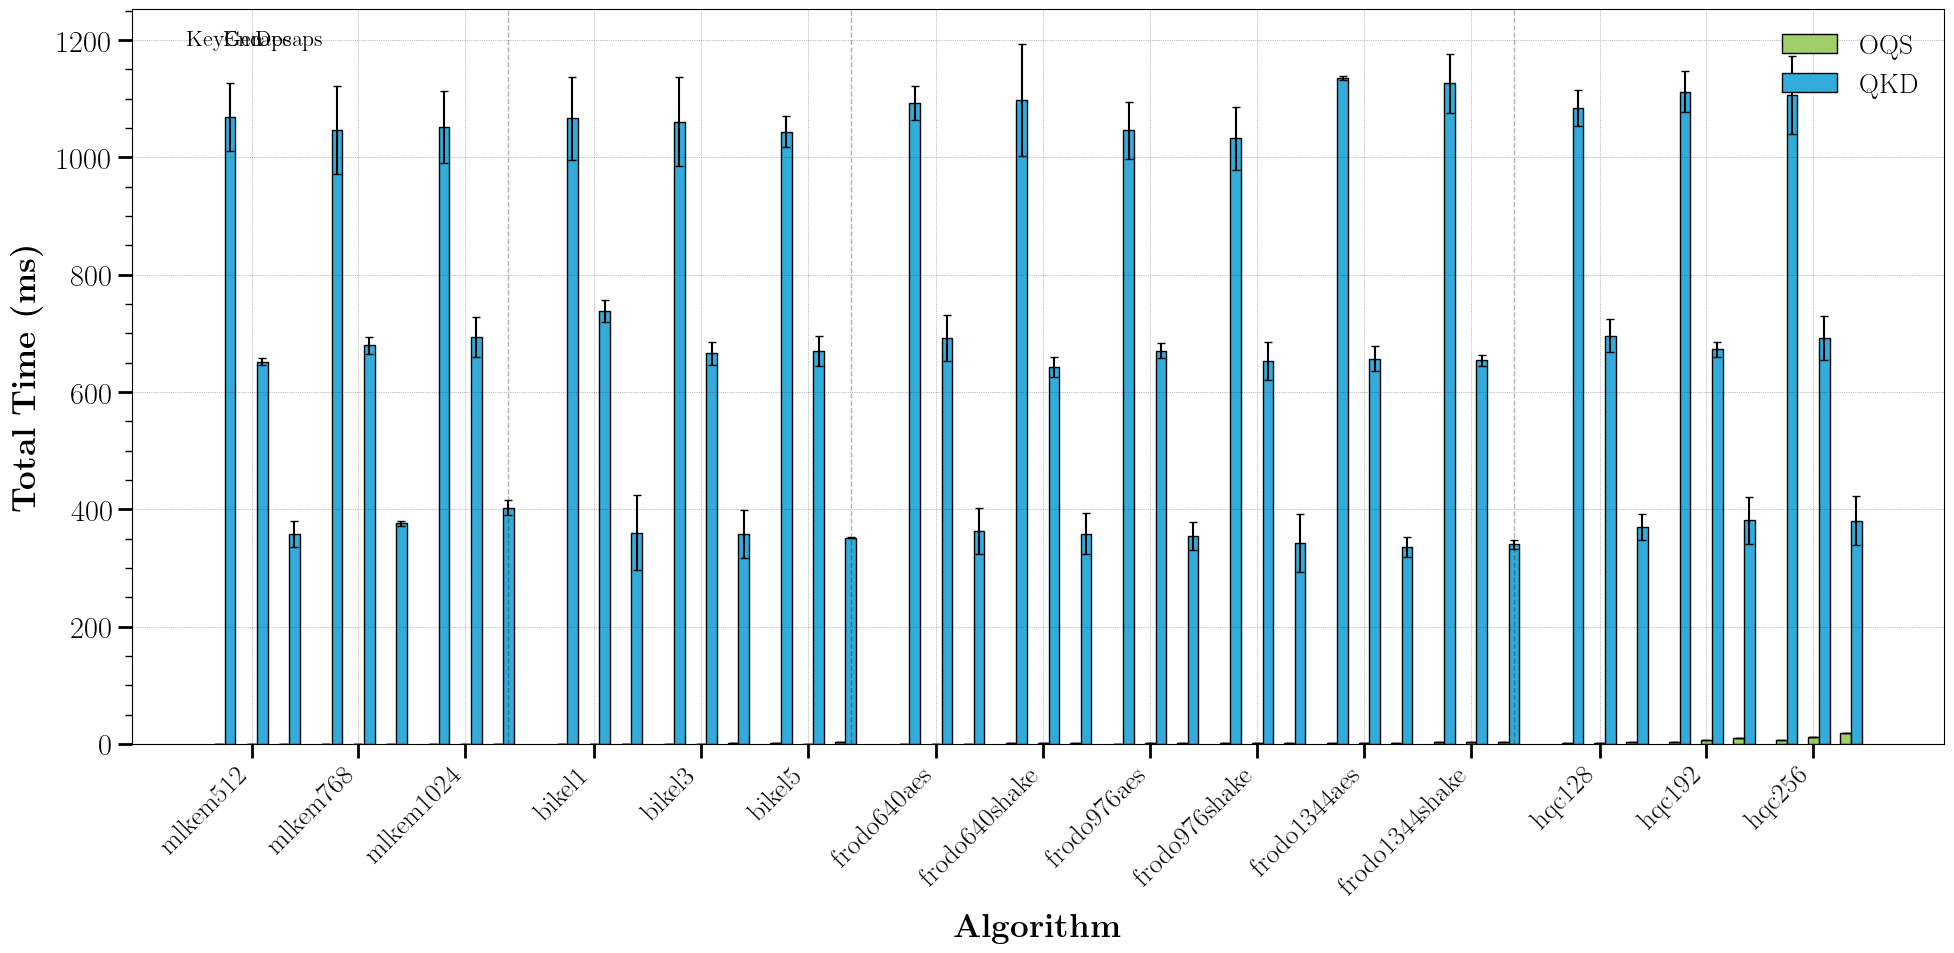

In [31]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=False, operation='all',plot_title="kems_comparison_all.pdf")

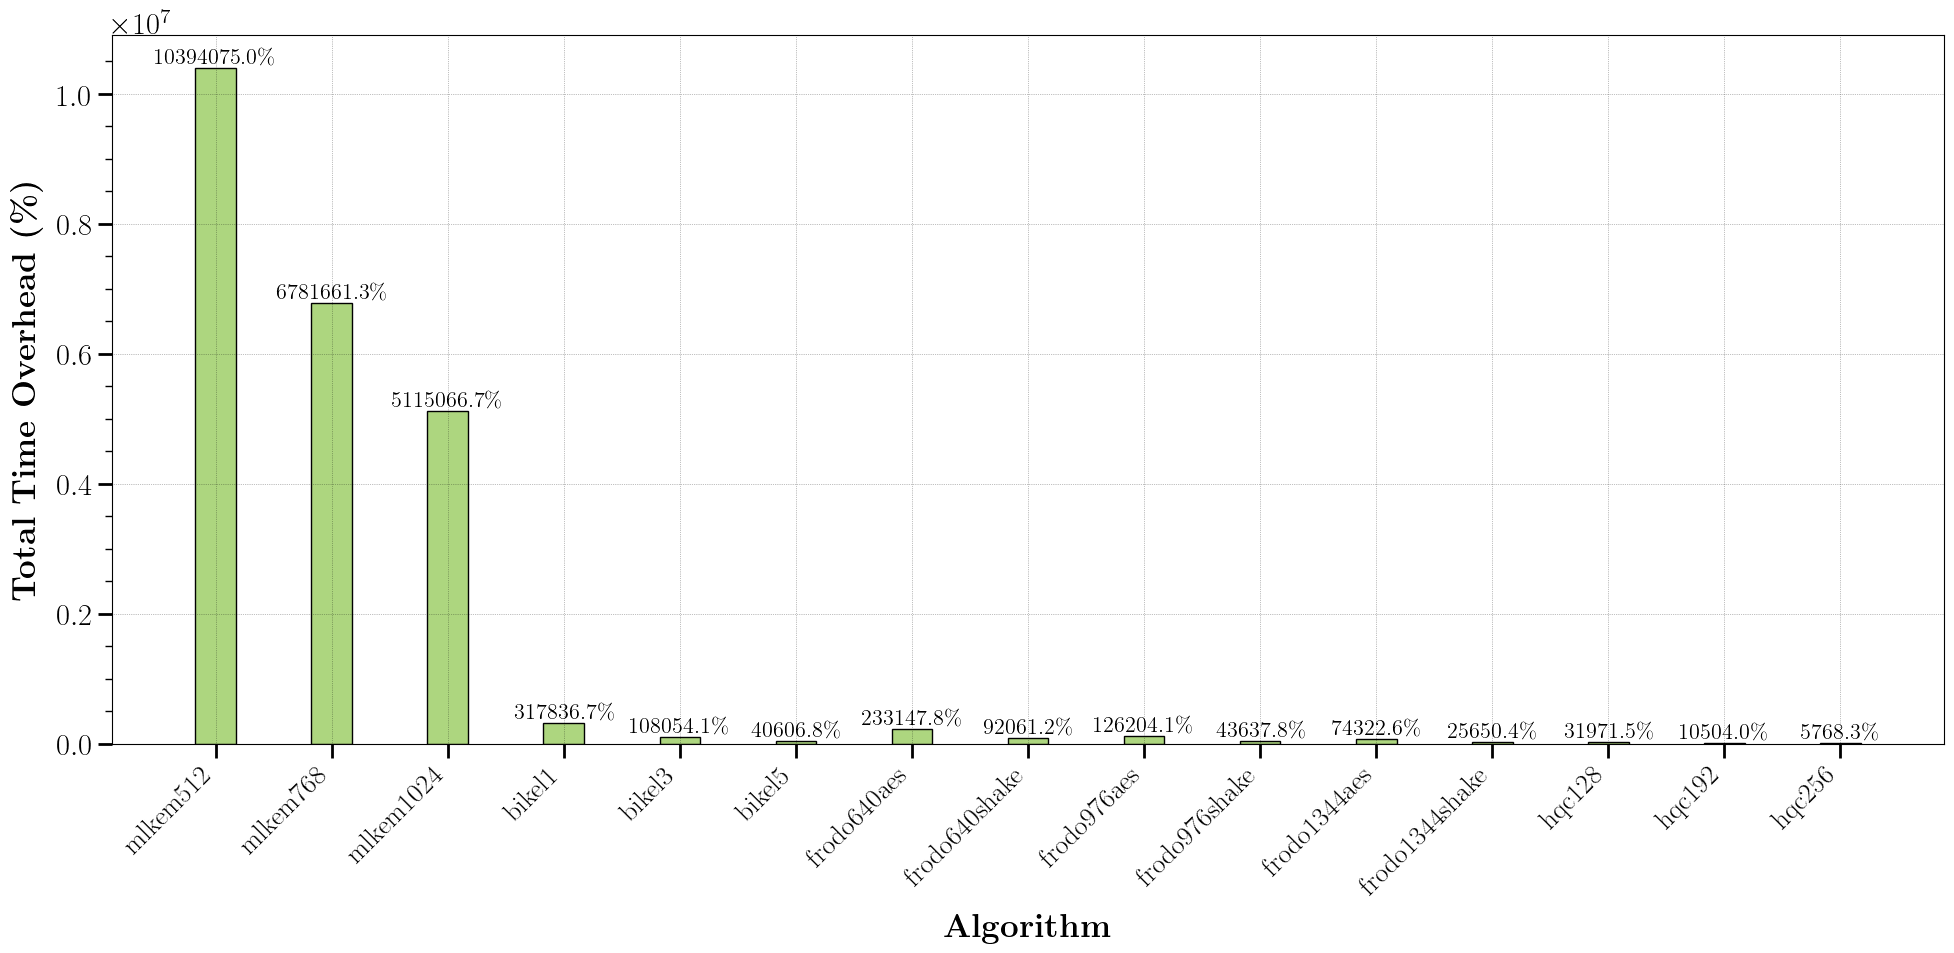

In [32]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, operation='TotalTime(ms)',plot_title="kems_comparison_overhead.pdf")

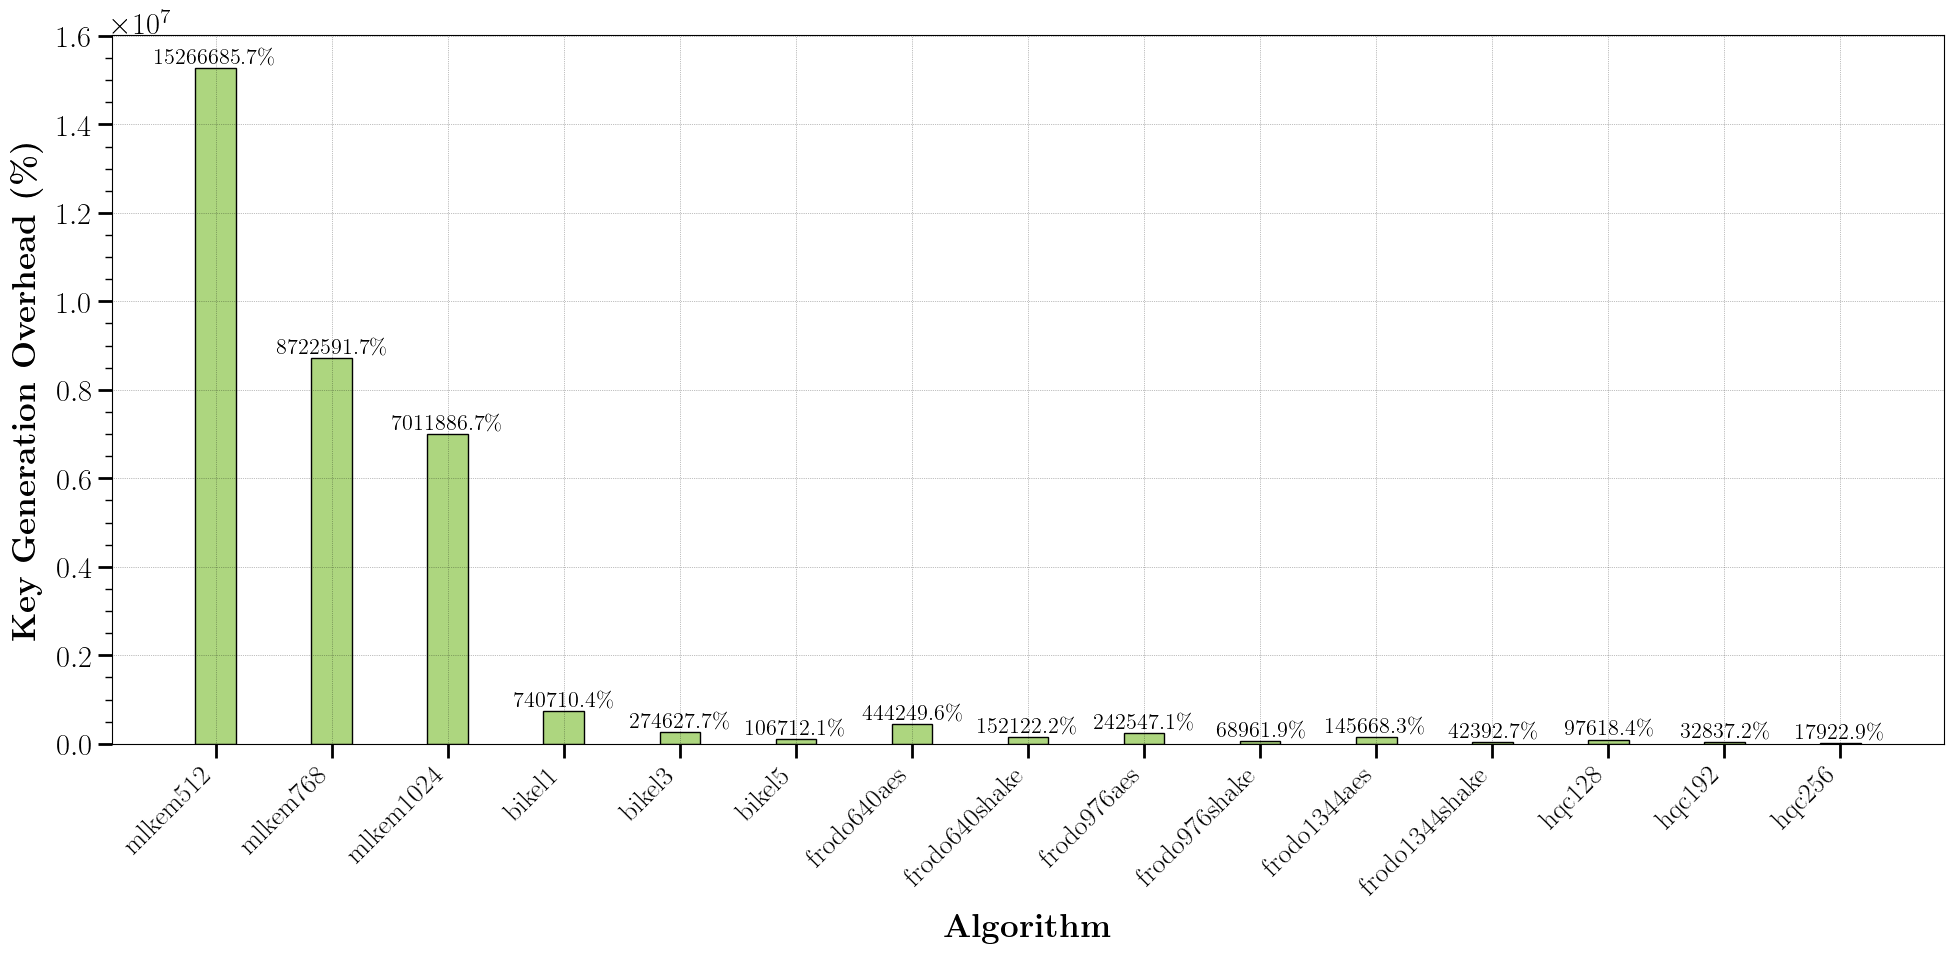

In [33]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, operation='KeyGen(ms)', plot_title="kems_comparison_kg_overhead.pdf")

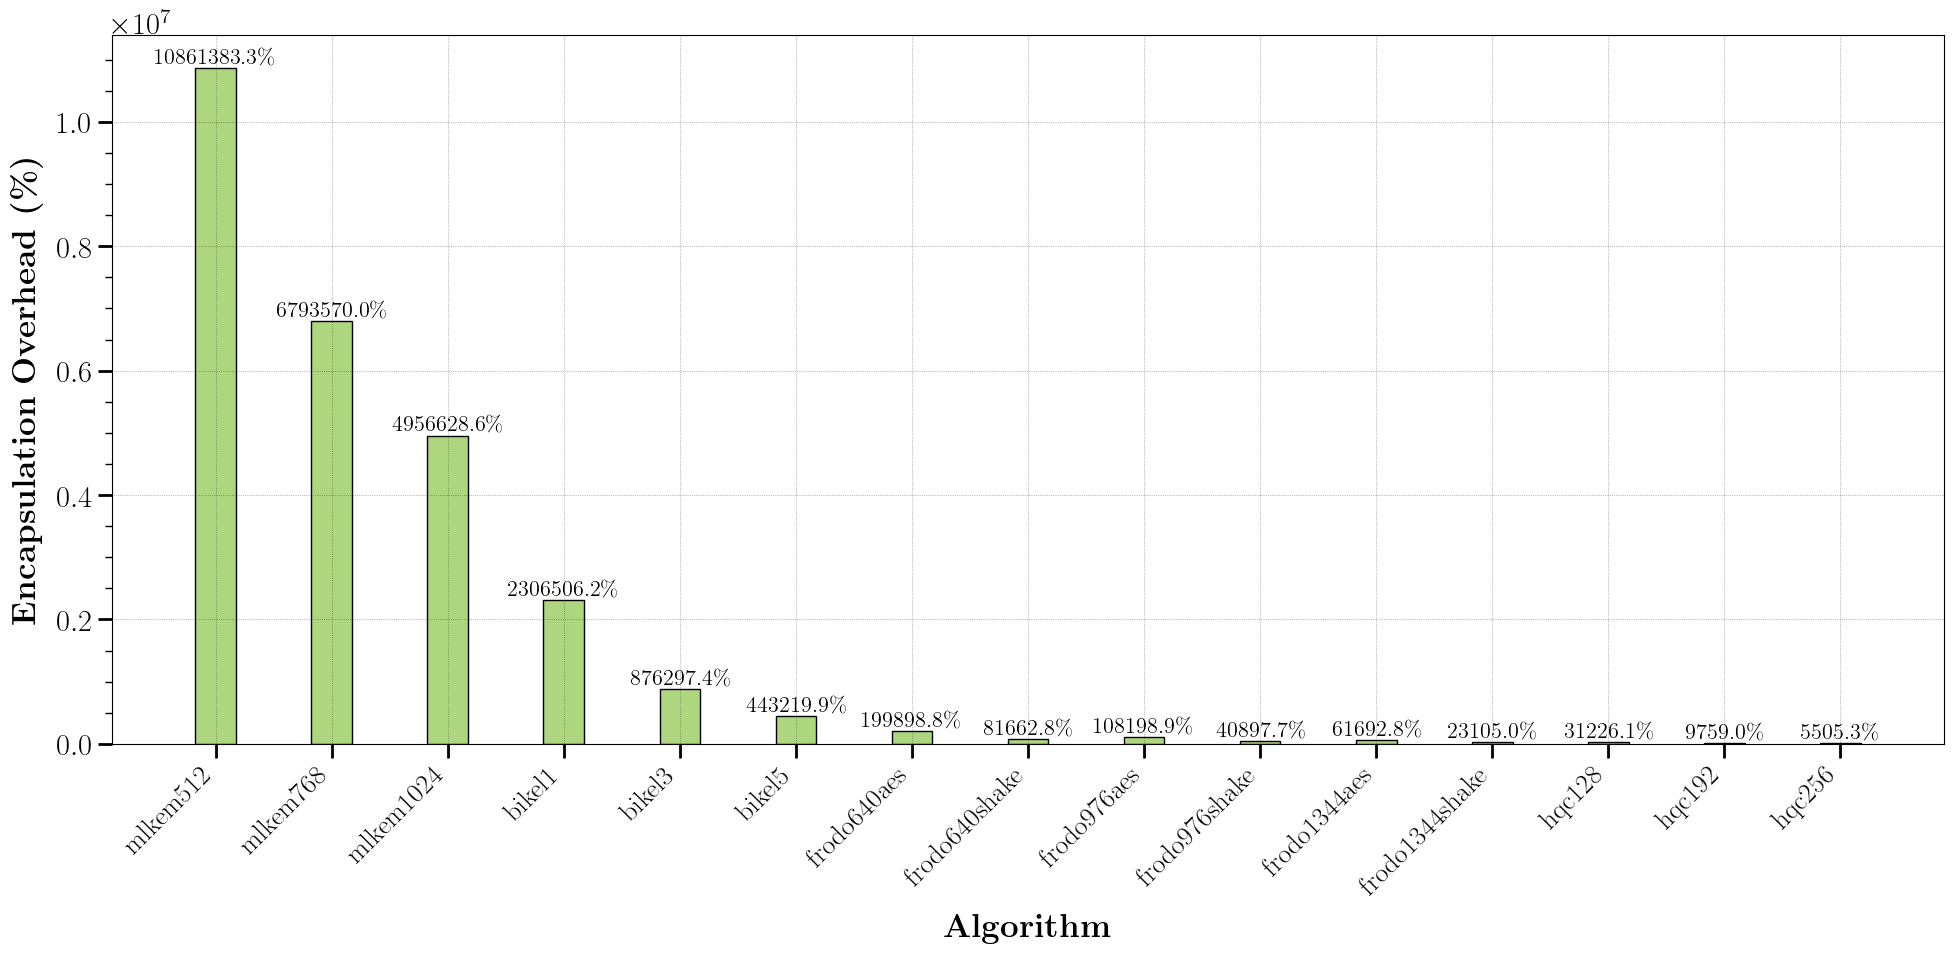

In [34]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, operation='Encaps(ms)', plot_title="kems_comparison_encap_overhead.pdf")

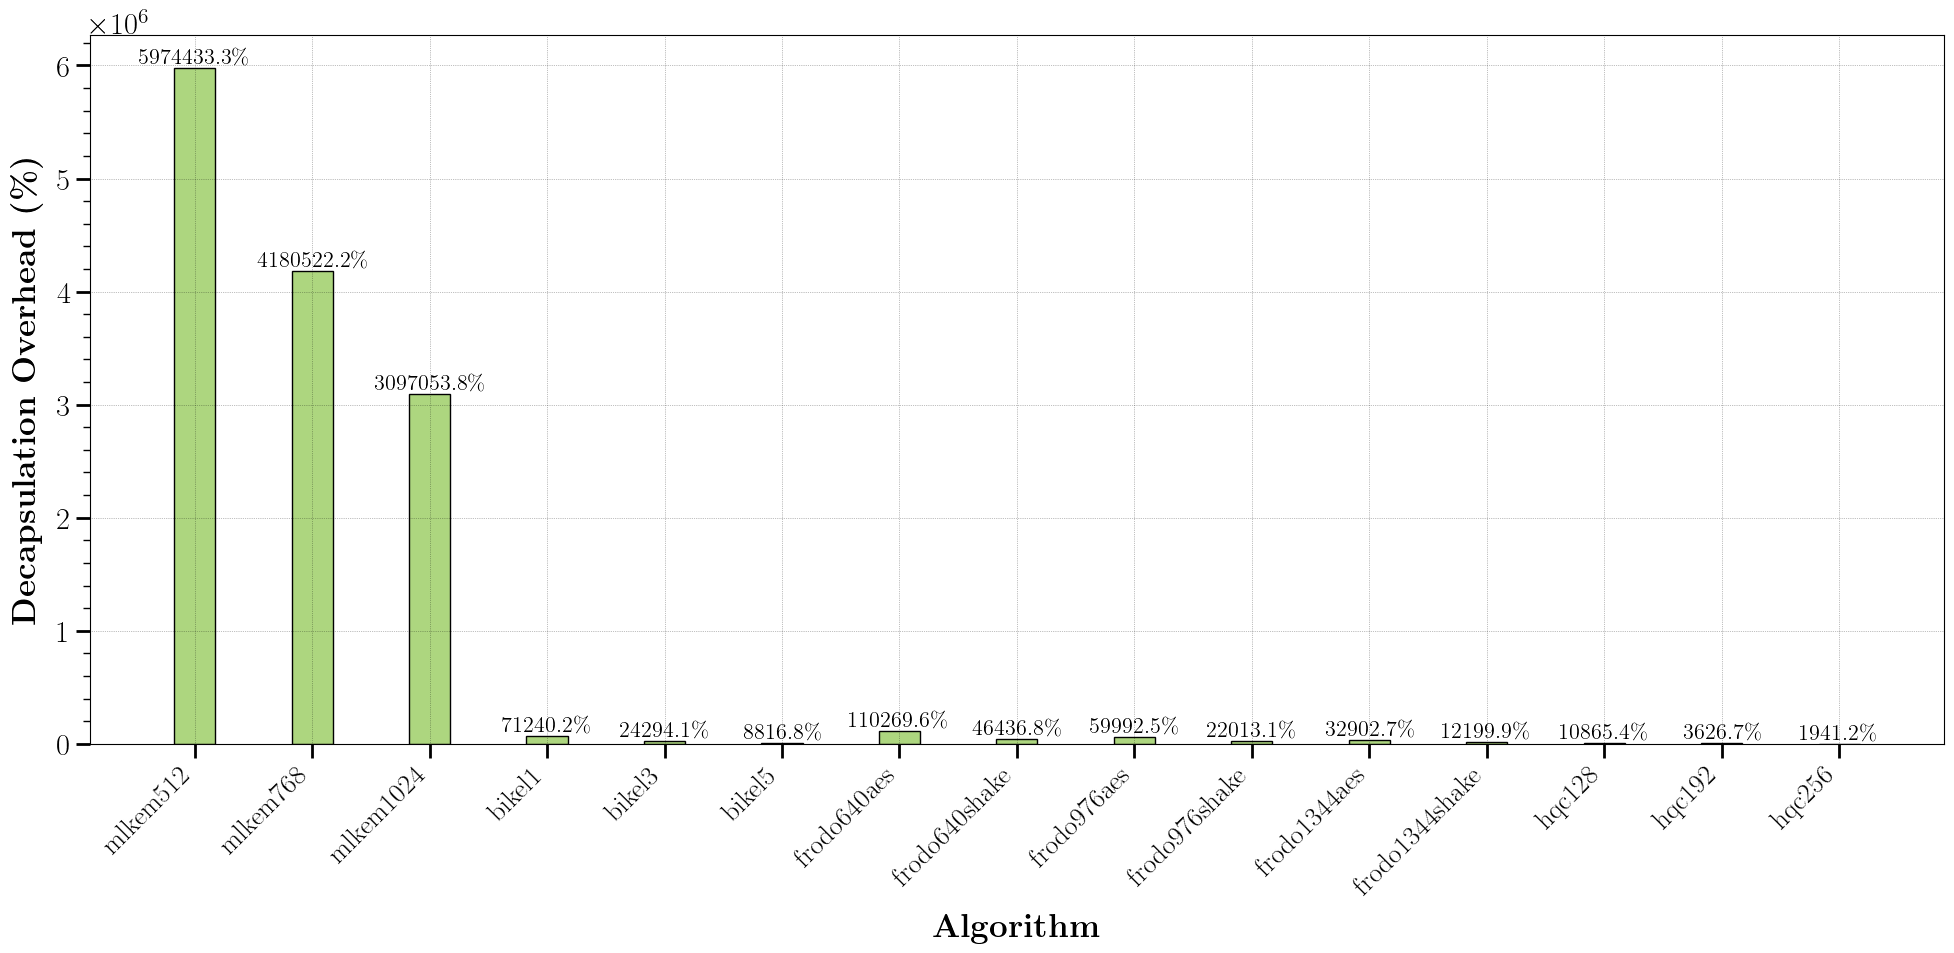

In [35]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, operation='Decaps(ms)', plot_title="kems_comparison_decap_overhead.pdf")

# BENCHMARKS - TLS

In [2]:
df_tls_kems = tls_data_summary("data/tls_bench_oqs_25_iter_20250213.csv")

df_tls_kems

Time_count  Time_mean  Time_std  Time_min  Time_max
KEM       Cert                                                           
mlkem1024 falcon1024          25     11.760     1.543      9.49     14.77
          falcon512           25     11.222     1.527      9.19     14.46
          mldsa44             25     11.078     1.340      9.59     14.08
          mldsa65             25     11.588     1.382      9.41     14.25
          mldsa87             25     11.591     1.659      9.43     14.44
...                          ...        ...       ...       ...       ...
hqc256    mldsa65             25     53.356     4.990     46.74     66.29
          mldsa87             25     55.527     2.579     50.73     60.88
          rsa_2048            25     56.589     2.851     47.43     61.81
          rsa_3072            25     56.536     2.494     52.22     62.27
          rsa_4096            25     50.226     4.260     46.87     63.37

[120 rows x 5 columns]

In [3]:
df_tls_qkdkems = tls_data_summary("data/tls_bench_qkd_25_iter_20250213.csv")

df_tls_qkdkems

Time_count  Time_mean  Time_std  Time_min  Time_max
KEM           Cert                                                           
qkd_mlkem1024 falcon1024          25    257.158     2.332    249.25    260.19
              falcon512           25    257.270     2.365    251.49    260.82
              mldsa44             25    259.015    10.435    246.05    306.68
              mldsa65             25    257.550     1.419    254.63    260.53
              mldsa87             25    282.073   120.063    255.88    858.35
...                              ...        ...       ...       ...       ...
qkd_hqc256    mldsa65             25    259.574     2.609    253.13    264.23
              mldsa87             25    259.400     3.056    251.24    264.62
              rsa_2048            25    258.900    13.007    217.95    305.43
              rsa_3072            25    268.766    20.103    253.37    313.12
              rsa_4096            25    270.576    22.827    249.24    321.54

[120 rows x 5 columns]

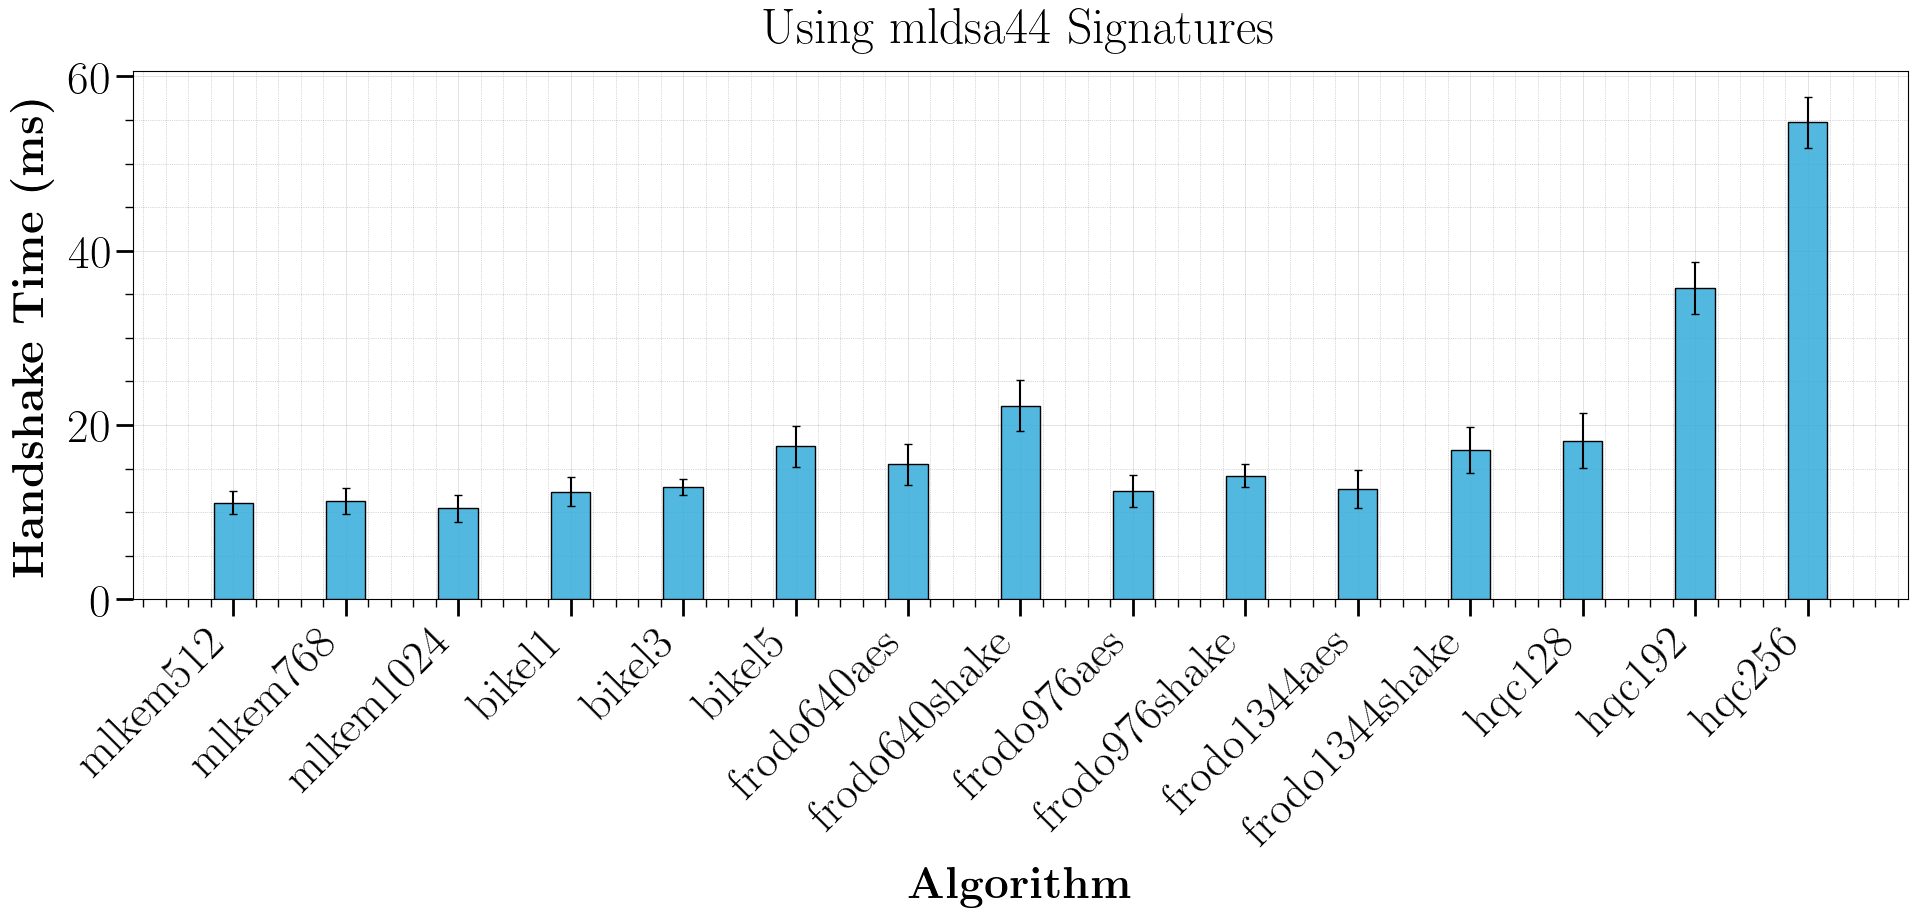

In [4]:
plot_tls_kem_families(input_df=df_tls_kems, cert_type='mldsa44', plot_title="cerberis_tls_kems_mldsa44.pdf")

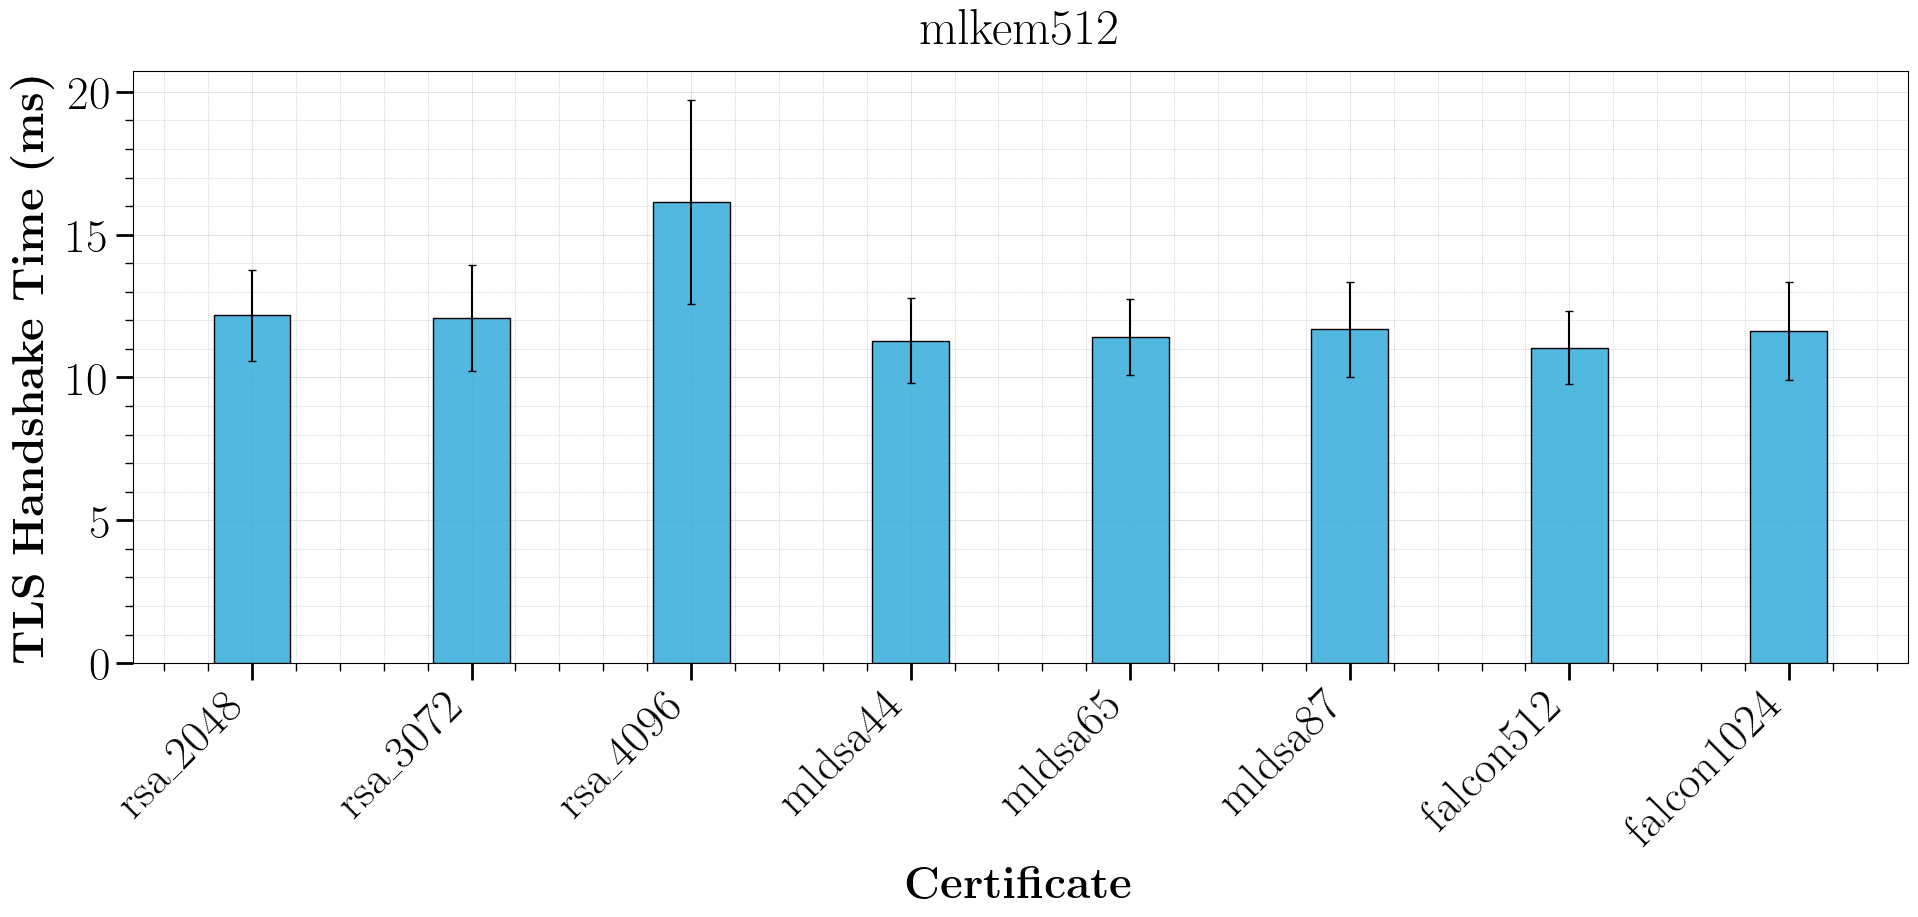

In [5]:
plot_tls_certs_families(input_df=df_tls_kems, kem_type='mlkem512', plot_title="cerberis_tls_certs_mlkem512.pdf")

In [6]:
merged_df = pd.concat([df_tls_kems, df_tls_qkdkems], keys=['OQS', 'QKD'], names=['Provider'])

merged_df.to_csv("data/tls_comparison_stats.csv")

merged_df

Time_count  Time_mean  Time_std  Time_min  \
Provider KEM        Cert                                                    
OQS      mlkem1024  falcon1024          25     11.760     1.543      9.49   
                    falcon512           25     11.222     1.527      9.19   
                    mldsa44             25     11.078     1.340      9.59   
                    mldsa65             25     11.588     1.382      9.41   
                    mldsa87             25     11.591     1.659      9.43   
...                                    ...        ...       ...       ...   
QKD      qkd_hqc256 mldsa65             25    259.574     2.609    253.13   
                    mldsa87             25    259.400     3.056    251.24   
                    rsa_2048            25    258.900    13.007    217.95   
                    rsa_3072            25    268.766    20.103    253.37   
                    rsa_4096            25    270.576    22.827    249.24   

                                Time_max  
Provider KEM        Cert                  
OQS      mlkem1024  falcon1024     14.77  
                    falcon512      14.46  
                    mldsa44        14.08  
                    mldsa65        14.25  
                    mldsa87        14.44  
...                                  ...  
QKD      qkd_hqc256 mldsa65       264.23  
                    mldsa87       264.62  
                    rsa_2048      305.43  
                    rsa_3072      313.12  
                    rsa_4096      321.54  

[240 rows x 5 columns]

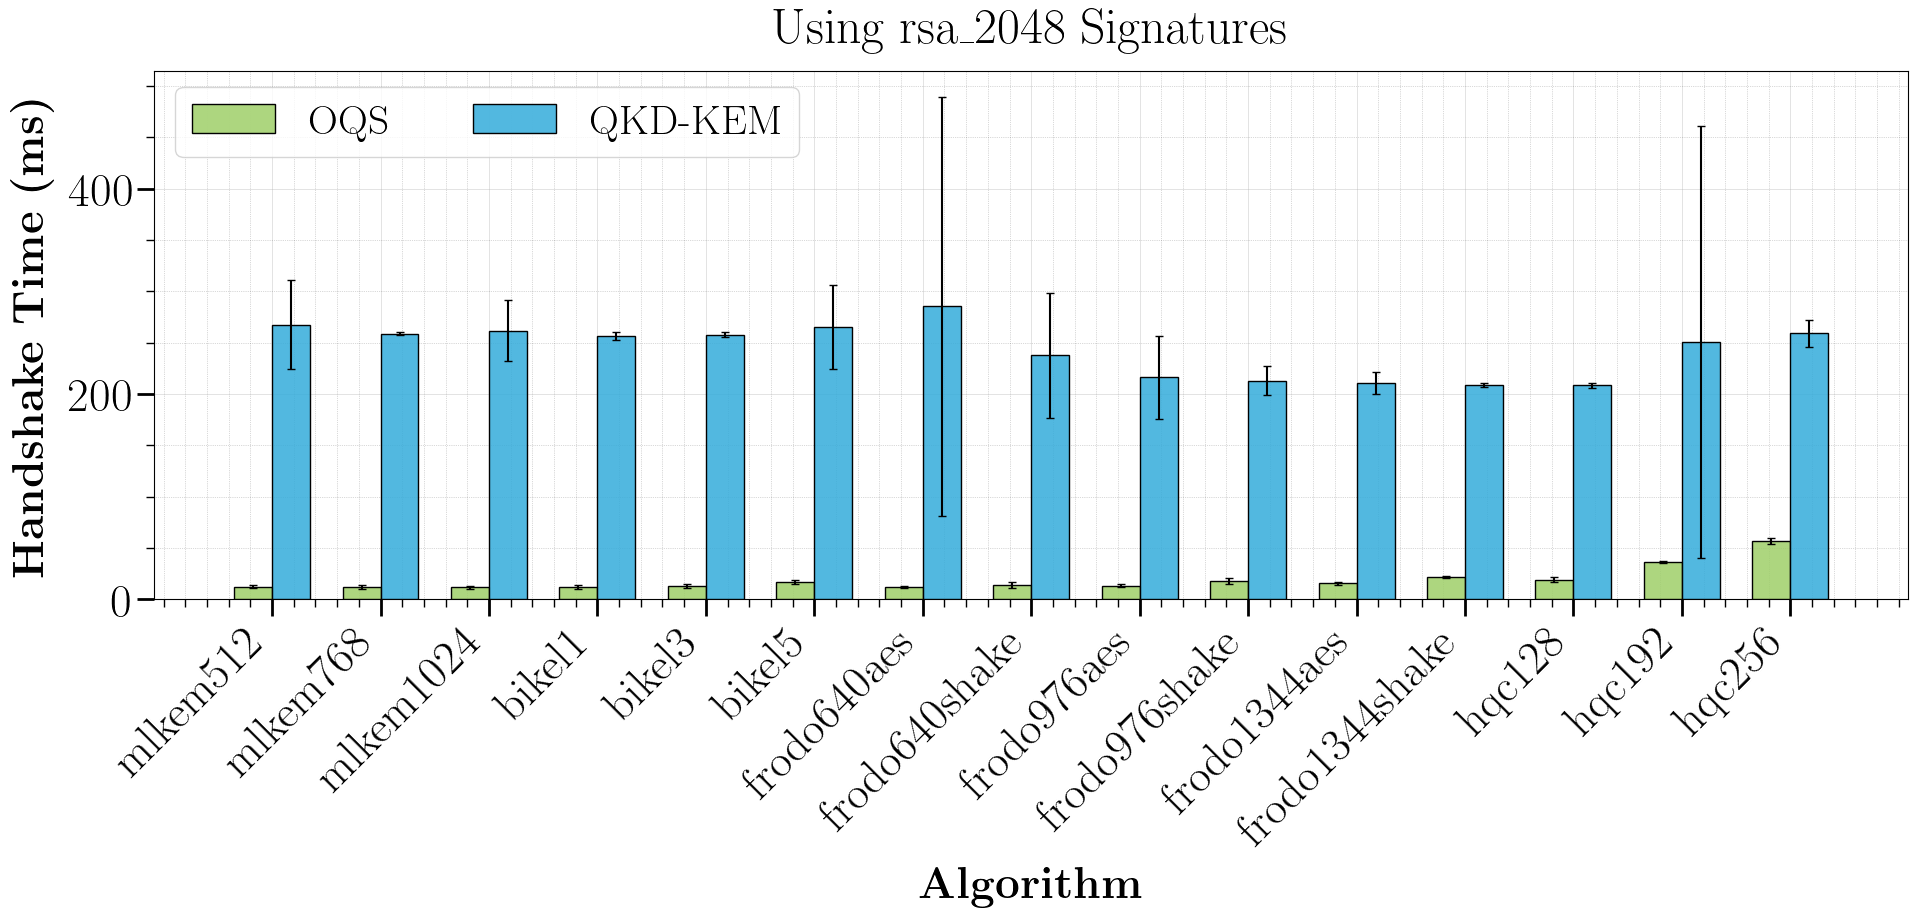

In [7]:
plot_tls_kem_families(input_df=merged_df, cert_type='rsa_2048', plot_title='cerberis_tls_kems_comparison_rsa2048.pdf')

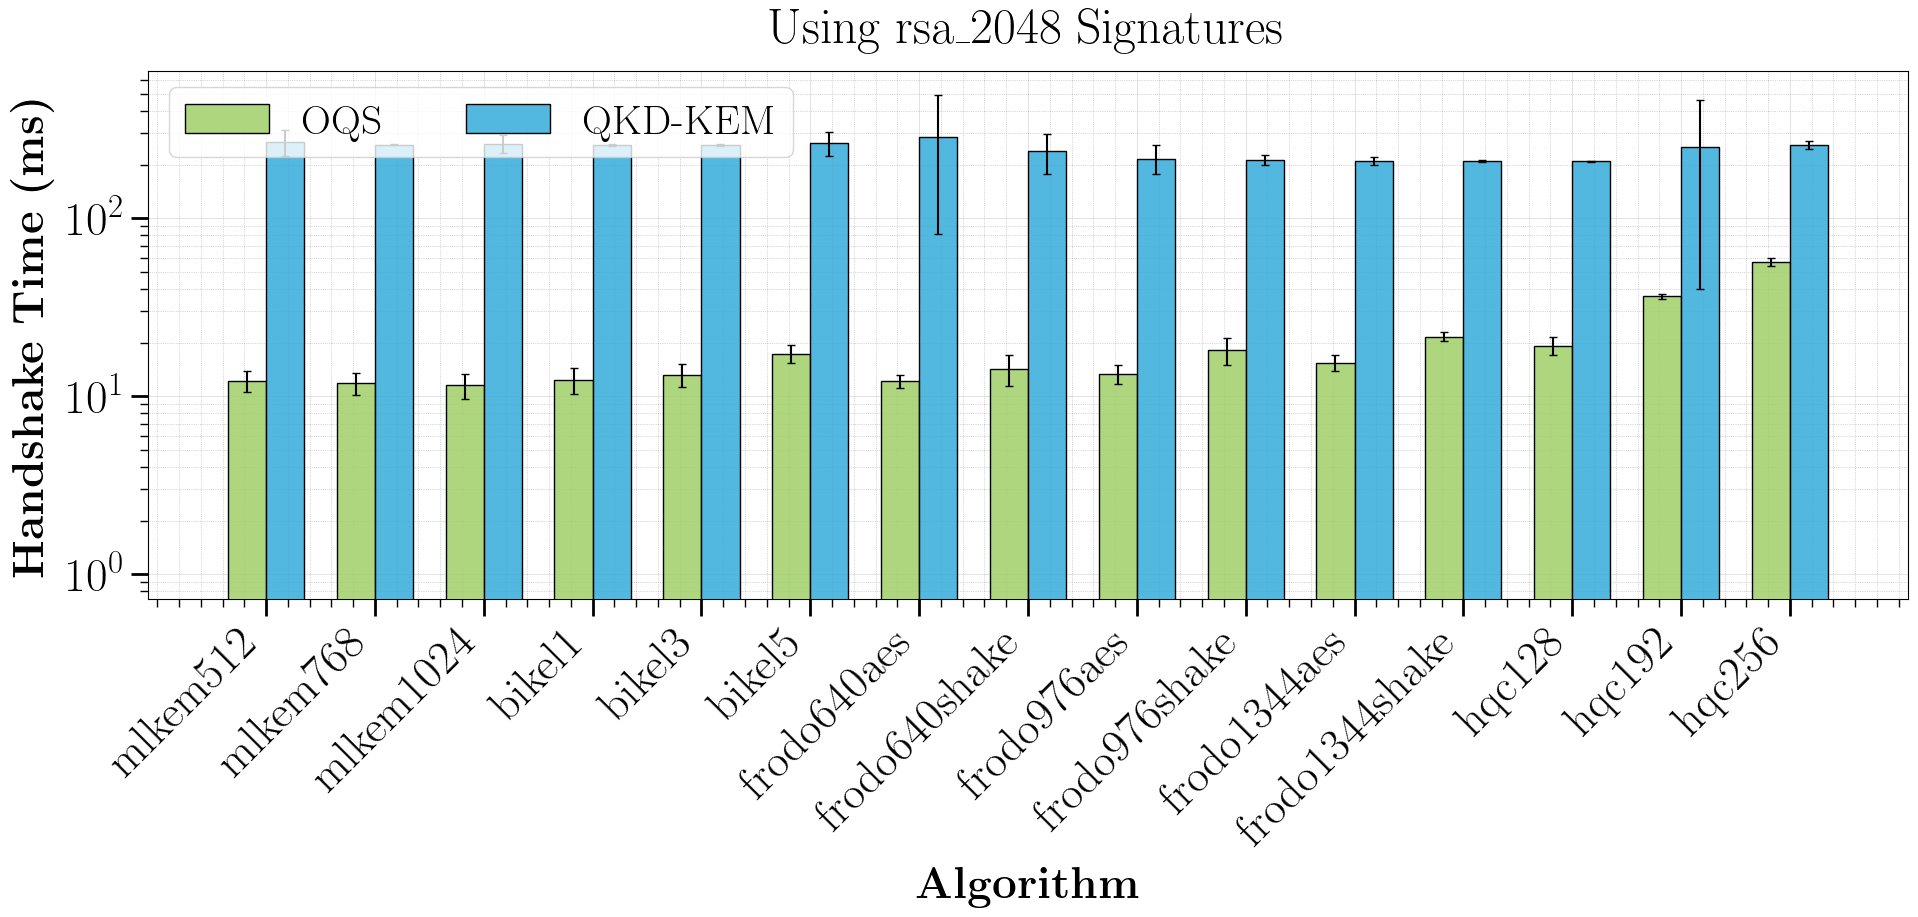

In [8]:
plot_tls_kem_families(input_df=merged_df, cert_type='rsa_2048', log_scale=True, plot_title='cerberis_tls_kems_comparison_rsa2048_log.pdf')

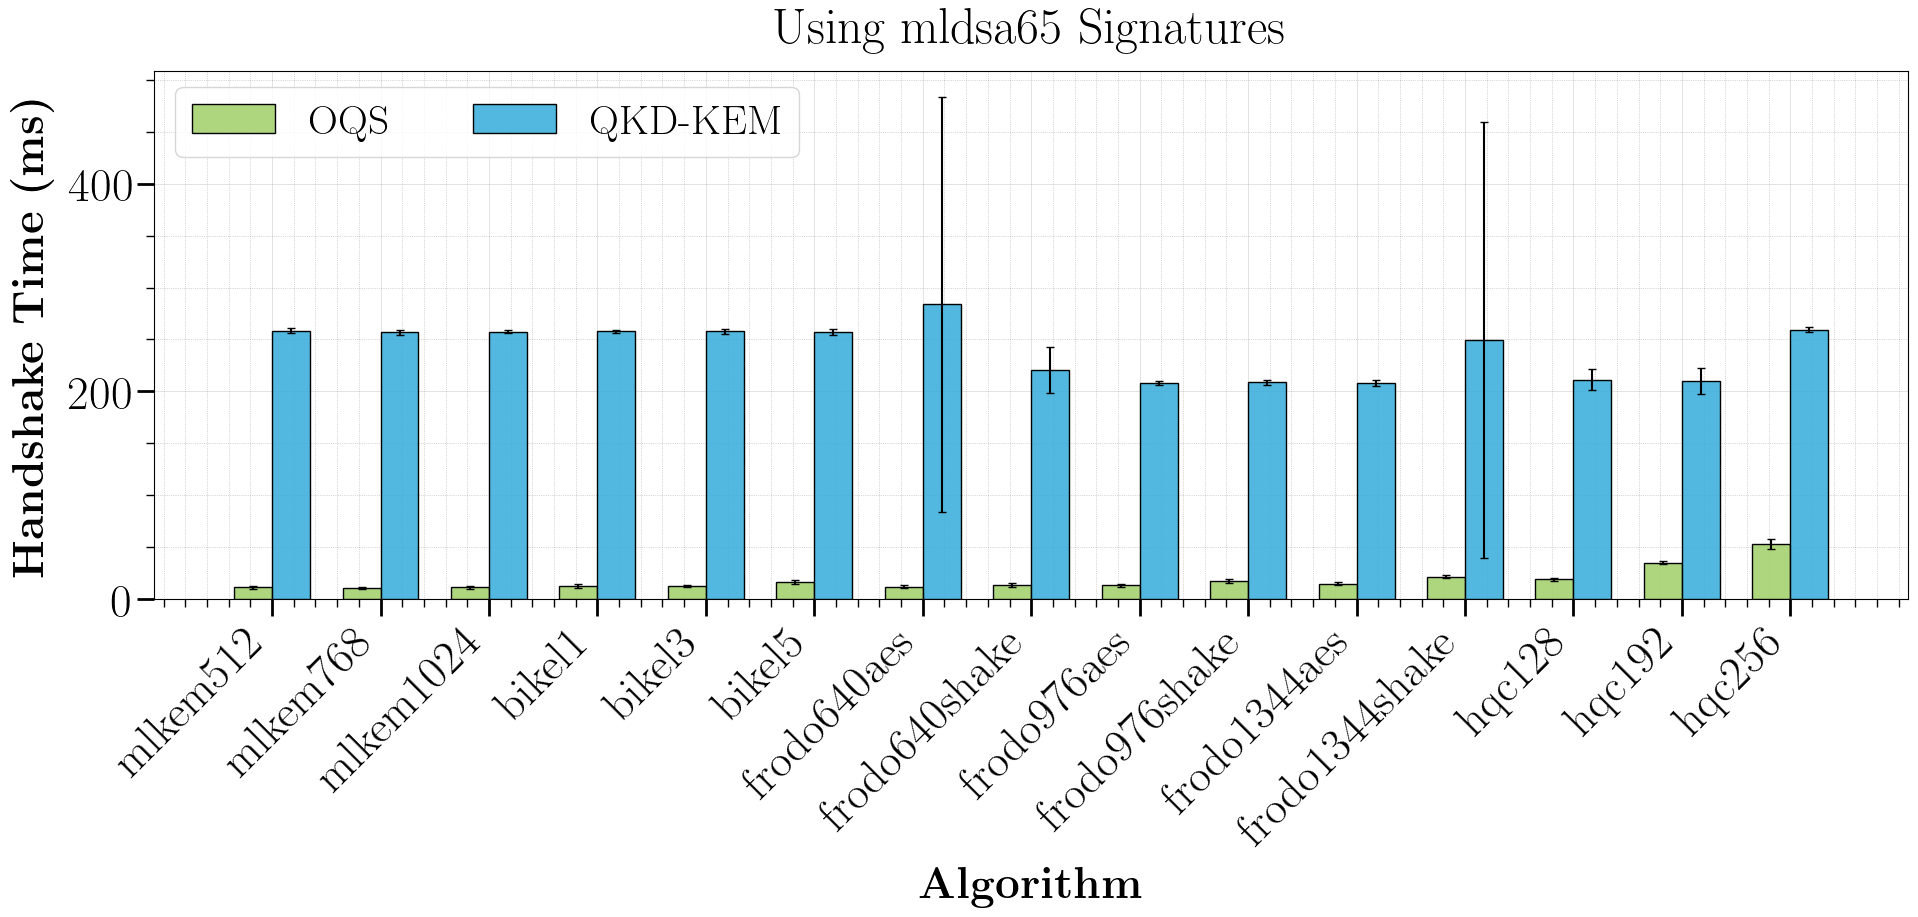

In [10]:
plot_tls_kem_families(input_df=merged_df, cert_type='mldsa65', plot_title='cerberis_tls_kems_comparison_mldsa65.pdf')

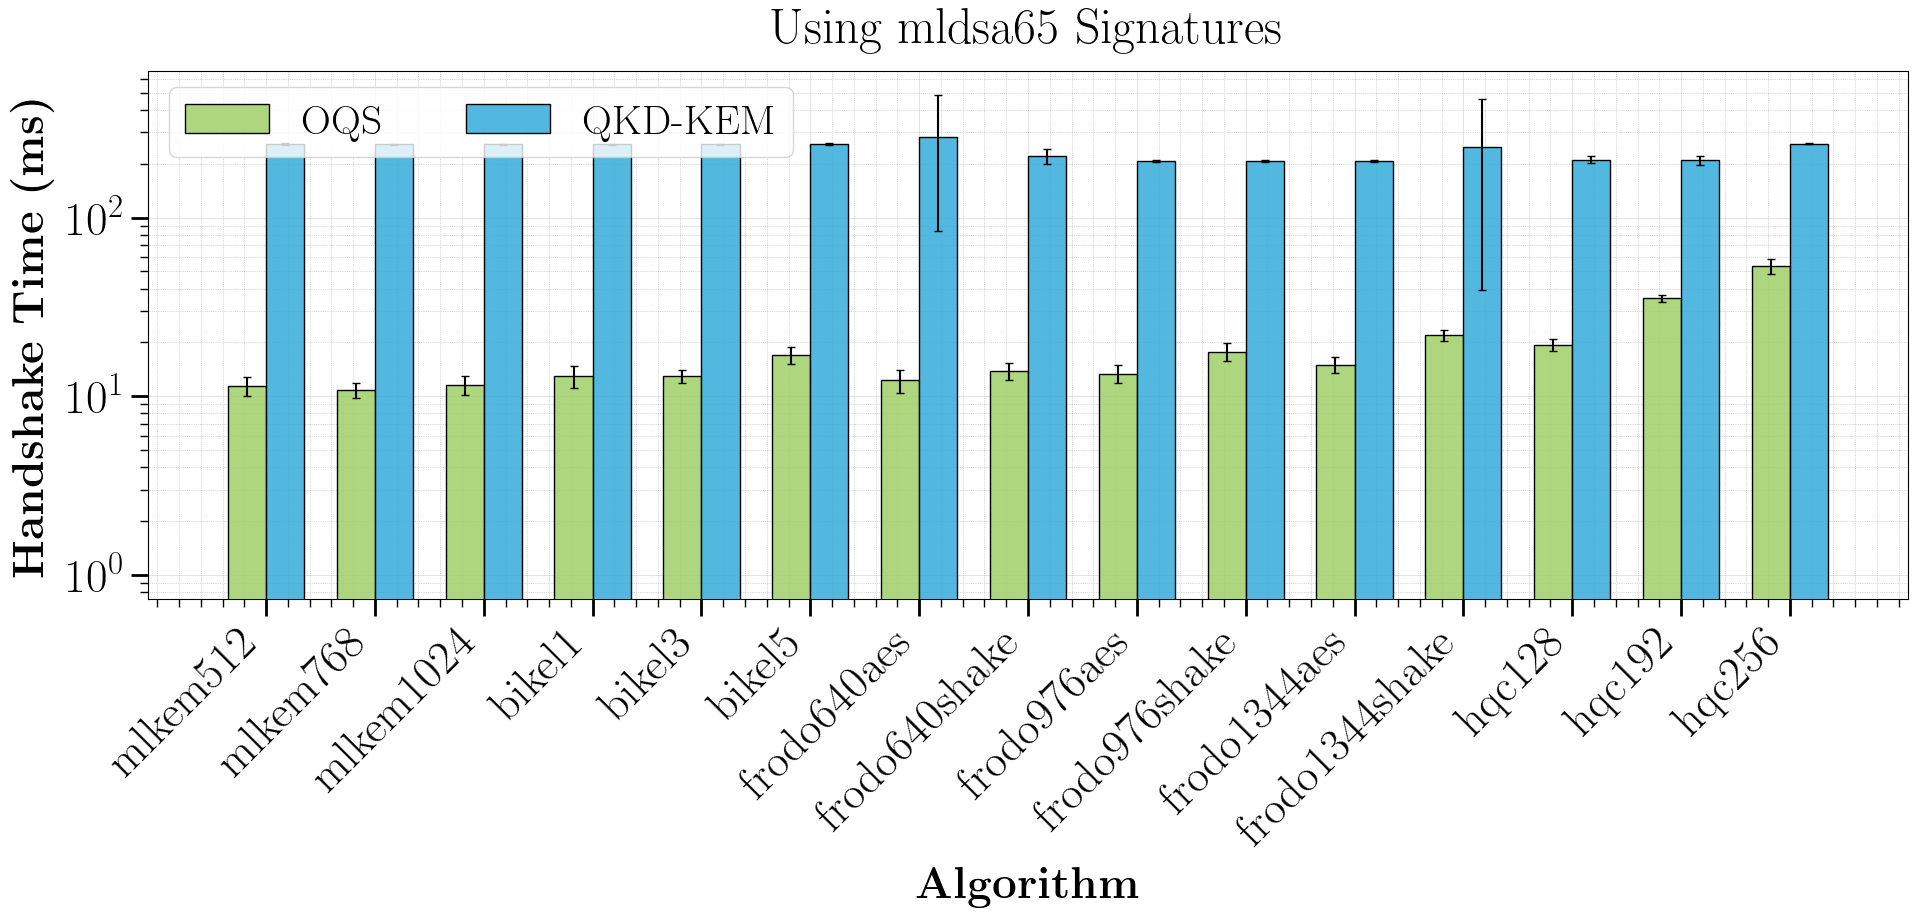

In [11]:
plot_tls_kem_families(input_df=merged_df, cert_type='mldsa65', log_scale=True, plot_title='cerberis_tls_kems_comparison_mldsa65_log.pdf')

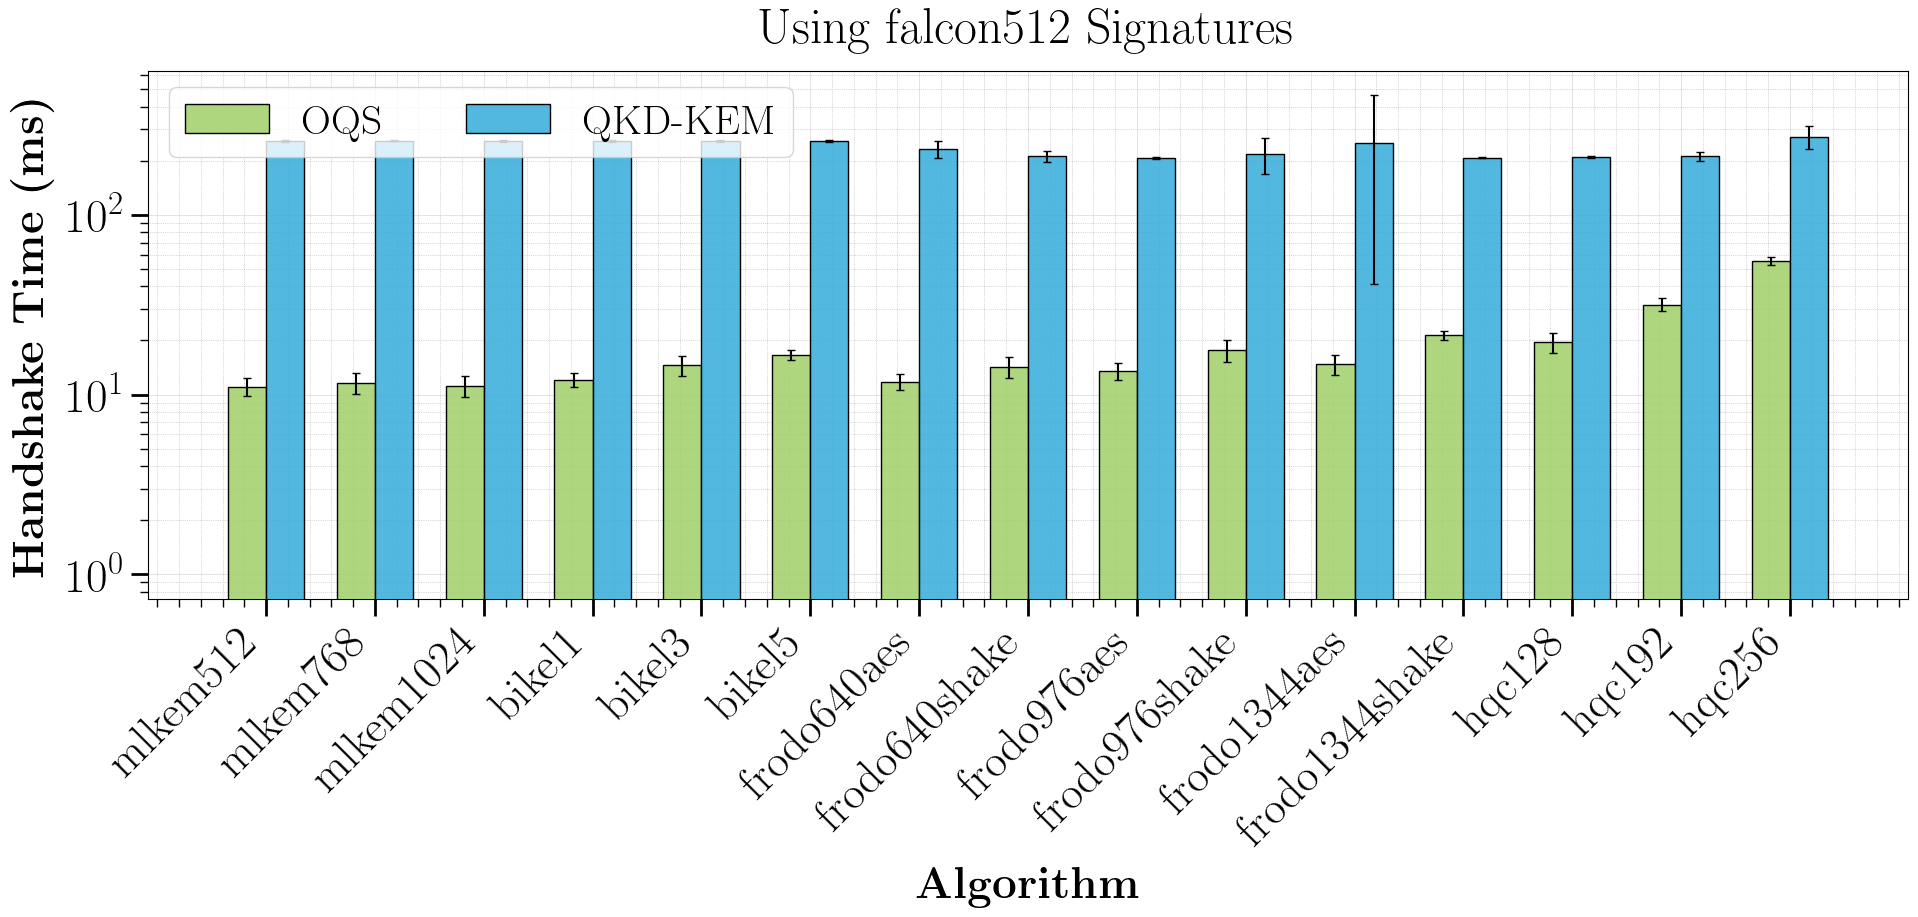

In [12]:
plot_tls_kem_families(input_df=merged_df, cert_type='falcon512', log_scale=True, plot_title='cerberis_tls_kems_comparison_falcon512_log.pdf')

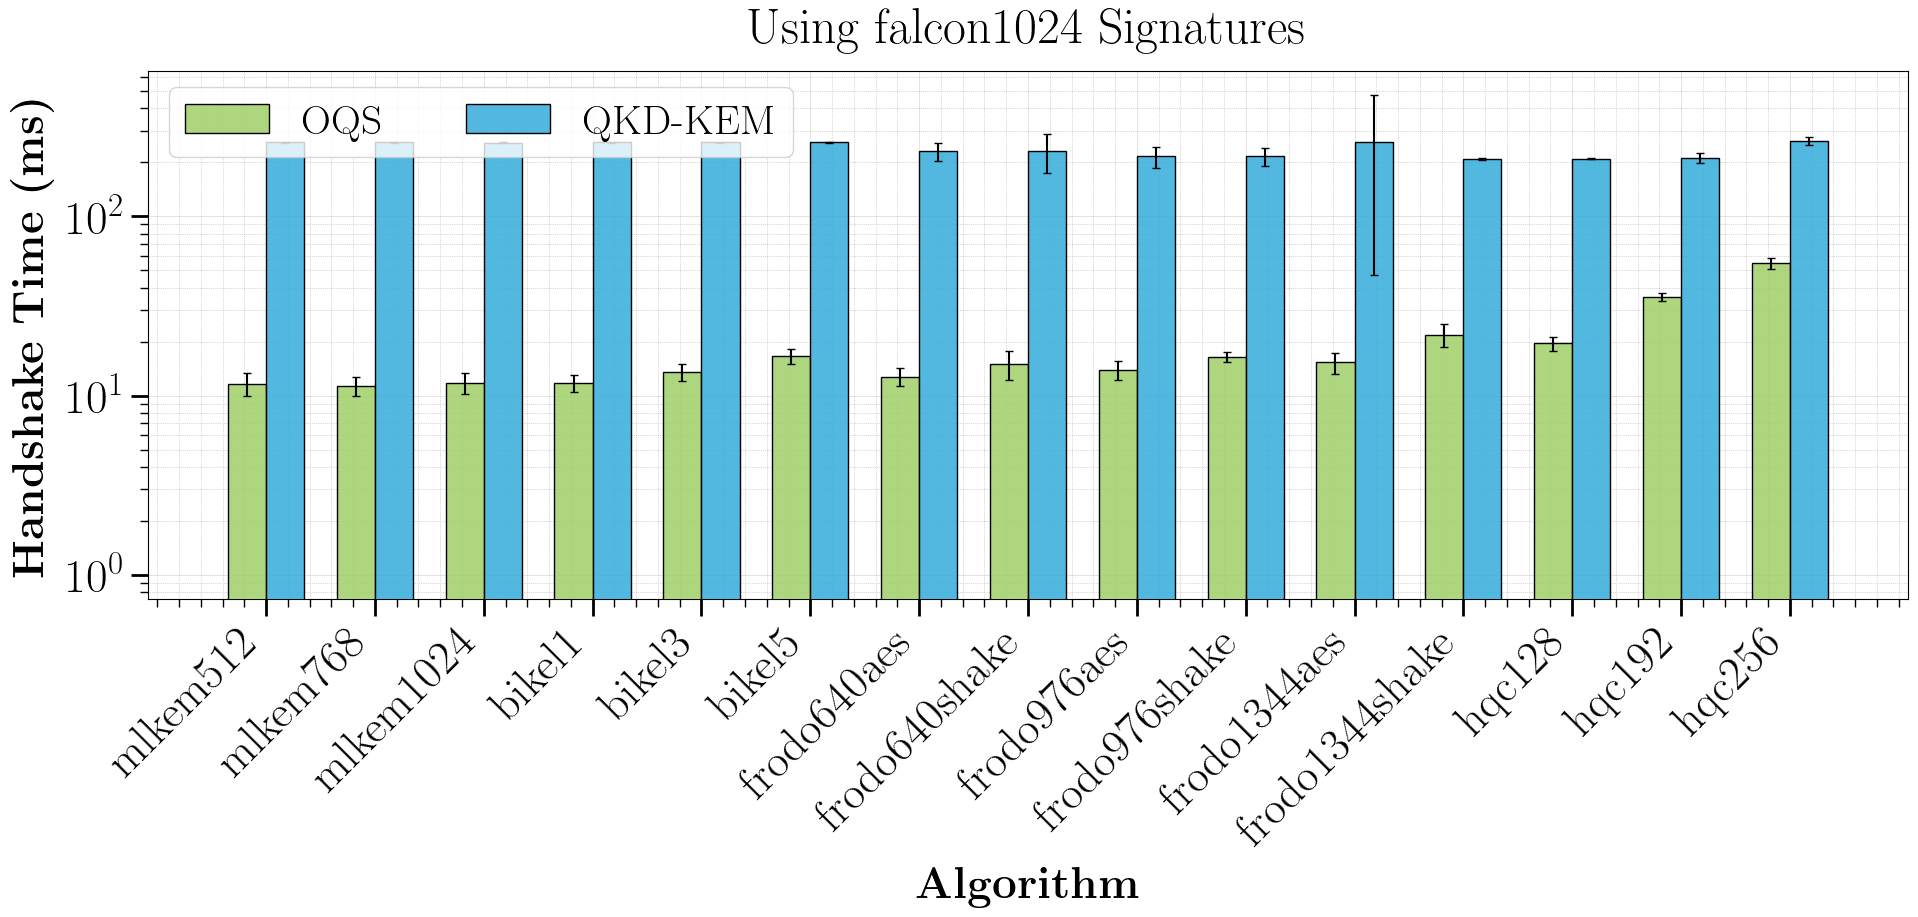

In [13]:
plot_tls_kem_families(input_df=merged_df, cert_type='falcon1024', log_scale=True, plot_title='cerberis_tls_kems_comparison_falcon1024_log.pdf')